ANN

ANN (Base model)

Epoch 1/20
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 8.2079e-04 - mae: 0.0126 - mse: 8.2079e-04 - val_loss: 2.9083e-05 - val_mae: 0.0037 - val_mse: 2.9083e-05
Epoch 2/20
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - loss: 6.0933e-05 - mae: 0.0041 - mse: 6.0933e-05 - val_loss: 1.8471e-05 - val_mae: 0.0027 - val_mse: 1.8471e-05
Epoch 3/20
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step - loss: 6.5617e-05 - mae: 0.0025 - mse: 6.5617e-05 - val_loss: 1.3222e-05 - val_mae: 0.0018 - val_mse: 1.3222e-05
Epoch 4/20
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - loss: 9.7074e-06 - mae: 0.0016 - mse: 9.7074e-06 - val_loss: 1.5586e-05 - val_mae: 0.0013 - val_mse: 1.5586e-05
Epoch 5/20
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 3s 973us/step - loss: 9.2616e-06 - mae: 0.0013 - mse: 9.2616e-06 - val_loss: 1.4837e-05 - val_mae: 0.0015 - val_mse: 1.4837e-05
Epoch 6/20
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - loss: 8.4280e-06 - mae: 0.0013 - mse: 8.4280e-06 - val_loss: 1.3353e-05 - val_mae: 0.0010 - va

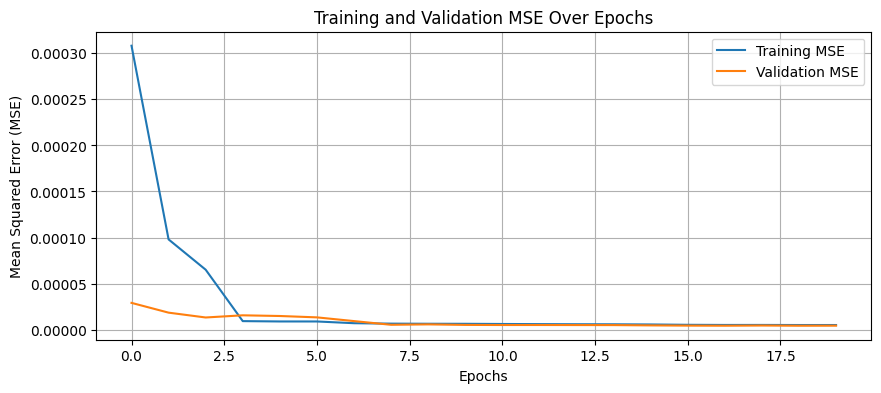

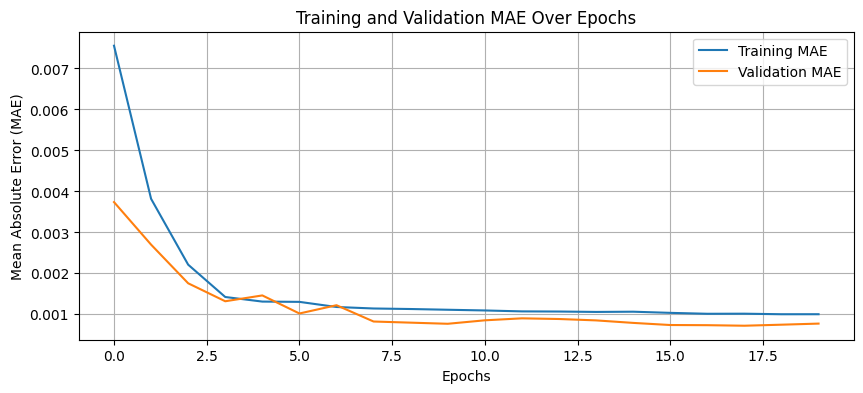

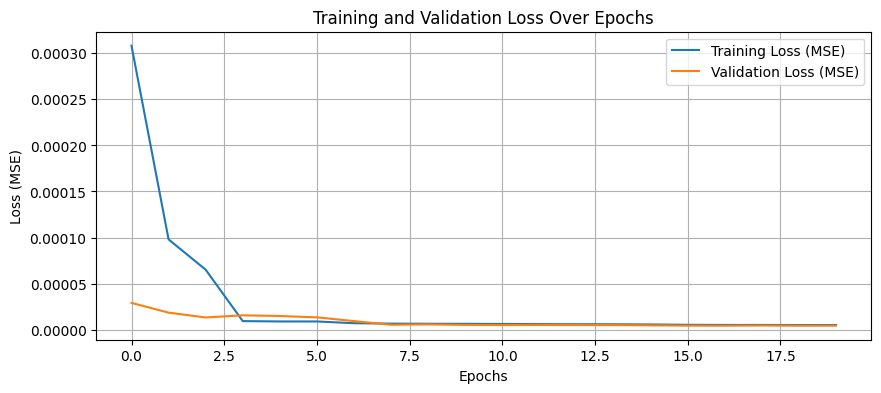

In [1]:
# **Step 1: Import Required Libraries**
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import random


# Set random seeds for reproducibility
seed_value = 42  # Change this if needed
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# **Step 2: Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step 3: Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable

# **Step 4: Ensure Data is Numeric**
df = df.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric values to NaN

# **Step 5: Drop Missing Values**
df.dropna(subset=features + [target], inplace=True)  # Ensure selected features & target have values

# **Step 6: Check if Data is Empty**
if df.empty:
    raise ValueError("Dataset is empty after preprocessing! Check the input file or preprocessing steps.")

# **Step 7: Split Data into Train & Test Sets**
X = df[features]
y = df[target]

if X.shape[0] < 2:  # Ensure there is enough data
    raise ValueError("Not enough samples after preprocessing to split into train and test sets.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 8: Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# **Step 9: Define & Normalize ANN Model**
norm_layer = layers.Normalization()
norm_layer.adapt(X_train_prep)

# **Step 10: Define the ANN Model**
model = keras.Sequential([
    norm_layer,  # Apply normalization
    layers.Dense(64, activation="relu"),  # First hidden layer
    layers.Dense(32, activation="relu"),  # Second hidden layer
    layers.Dense(16, activation="relu"),  # Third hidden layer
    layers.Dense(1)  # Output layer (for regression)
])

# **Step 11: Compile the Model**
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss="mse",  # Mean Squared Error for regression
    metrics=["mse", "mae"]  # Track MSE & MAE
)

# **Step 12: Train the Model**
history = model.fit(
    X_train_prep, y_train,
    epochs=20,
    validation_data=(X_test_prep, y_test),
    batch_size=8,
    verbose=1
)

# **Step 13: Evaluate the Model**
test_loss, test_mse, test_mae = model.evaluate(X_test_prep, y_test, verbose=1)

# **Step 14: Compute R² Score**
y_pred = model.predict(X_test_prep)
test_r2 = r2_score(y_test, y_pred)

# **Step 15: Print Evaluation Metrics**
print(f"\nTest Loss (MSE): {test_loss:.6f}")
print(f"Test MSE: {test_mse:.6f}")
print(f"Test MAE: {test_mae:.6f}")
print(f"Test R² Score: {test_r2:.6f}")

# **Step 16: Plot Training & Validation Performance**
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

# **Plot MSE**
plt.figure(figsize=(10, 4))
plt.plot(history_df['mse'], label='Training MSE')
plt.plot(history_df['val_mse'], label='Validation MSE')
plt.title('Training and Validation MSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# **Plot MAE**
plt.figure(figsize=(10, 4))
plt.plot(history_df['mae'], label='Training MAE')
plt.plot(history_df['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

# **Plot Loss**
plt.figure(figsize=(10, 4))
plt.plot(history_df['loss'], label='Training Loss (MSE)')
plt.plot(history_df['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()



ANN testing with different batch sizes 


🔥 Training Model with Batch Size: 6
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step
✅ Stored results for Batch Size: 6

🔥 Training Model with Batch Size: 8
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
✅ Stored results for Batch Size: 8

🔥 Training Model with Batch Size: 10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step
✅ Stored results for Batch Size: 10

🔥 Training Model with Batch Size: 12
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step
✅ Stored results for Batch Size: 12

🔥 Training Model with Batch Size: 16
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
✅ Stored results for Batch Size: 16

🔥 Training Model with Batch Size: 20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step
✅ Stored results for Batch Size: 20

🔥 Training Model with Batch Size: 24
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step
✅ Stored results for Batch Size: 24

🔥 Training Model with Batch Size: 32
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step
✅ Stored results for Batch Size: 32

🔥 Training Model with Batch Size: 40
142/142 ━━━━━━━━━━━━━━━━━━━━ 0

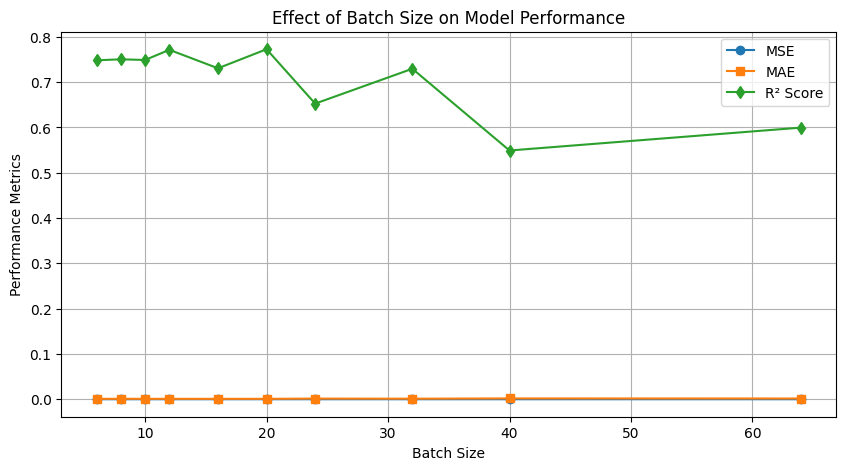

In [ ]:
# **Step 1: Import Required Libraries**
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random
import matplotlib.pyplot as plt

# **Set Random Seeds for Reproducibility**
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

#**Step : Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step : Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable'  # Target variable

# **Step 4: Ensure Data is Numeric**
df = df.apply(pd.to_numeric, errors='coerce')

# **Step 5: Drop Missing Values**
df.dropna(subset=features + [target], inplace=True)

# **Step 6: Check if Data is Empty**
if df.empty:
    raise ValueError("Dataset is empty after preprocessing! Check the input file or preprocessing steps.")

# **Step 7: Split Data into Train & Test Sets**
X = df[features]
y = df[target]

if X.shape[0] < 2:
    raise ValueError("Not enough samples after preprocessing to split into train and test sets.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 8: Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# Step 9: Define Function to Create ANN Model**
def create_model():
    # norm_layer = layers.Normalization() norm_layer.adapt(X_train_prep)   #removed on 28 august due to double normalization risk 
    
    model = keras.Sequential([
        #norm_layer,
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)  # Output layer (for regression)
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss="mse", metrics=["mse", "mae"])
    
    return model

# Step 10: Test Different Batch Sizes**
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []

for batch_size in batch_size_options:
    print(f" Training Model with Batch Size: {batch_size}")
    
    # Create a fresh model for each batch size
    model = create_model()
    
    # Train the model
    history = model.fit(
        X_train_prep, y_train,
        epochs=20,
        validation_data=(X_test_prep, y_test),
        batch_size=batch_size,
        verbose=0  # Silent training
    )

    # Evaluate model performance
    test_loss, test_mse, test_mae = model.evaluate(X_test_prep, y_test, verbose=0)

    # Compute R² Score
    y_pred = model.predict(X_test_prep)
    test_r2_final = r2_score(y_test, y_pred)

    # Store results
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2_final
    })
    
    print(f" Stored results for Batch Size: {batch_size}")

# **Step 11: Convert Results to DataFrame & Display**
results_df = pd.DataFrame(results)
print(" **ANN Batch Size Results:**")
print(results_df)

# **Step 12: Plot Results**
plt.figure(figsize=(10, 5))
plt.plot(results_df["Batch Size"], results_df["Test MSE"], label="MSE", marker='o')
plt.plot(results_df["Batch Size"], results_df["Test MAE"], label="MAE", marker='s')
plt.plot(results_df["Batch Size"], results_df["Test R² Score"], label="R² Score", marker='d')
plt.xlabel("Batch Size")
plt.ylabel("Performance Metrics")
plt.title("Effect of Batch Size on Model Performance")
plt.legend()
plt.grid(True)
plt.show()


Final one ( fixing validiation split and normalization)

 Training Model with Batch Size: 6
 Training Model with Batch Size: 8
 Training Model with Batch Size: 10
 Training Model with Batch Size: 12
 Training Model with Batch Size: 16
 Training Model with Batch Size: 20
 Training Model with Batch Size: 24
 Training Model with Batch Size: 32
 Training Model with Batch Size: 40
 Training Model with Batch Size: 64

Selected best batch size (by lowest val_loss): 6
 **ANN Final Result (with best batch size):**
{'Batch Size': 6, 'Test MSE': 5.240883638180094e-06, 'Test MAE': 0.0012959622545167804, 'Test R² Score': 0.7334964813424947}


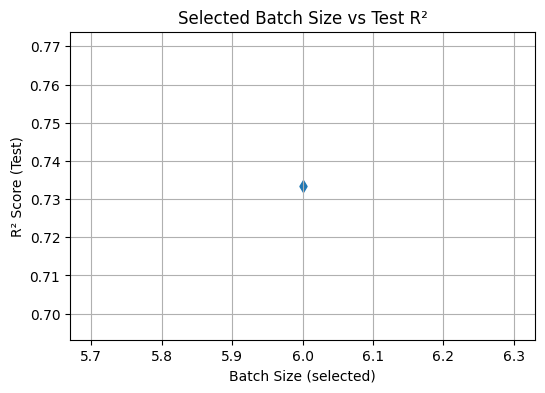

In [1]:
# **Step 1: Import Required Libraries**
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random
import matplotlib.pyplot as plt

# **Set Random Seeds for Reproducibility**
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

#**Step : Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step : Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable

# **Step 4: Ensure Data is Numeric**
df = df.apply(pd.to_numeric, errors='coerce')

# **Step 5: Drop Missing Values**
df.dropna(subset=features + [target], inplace=True)

# **Step 6: Check if Data is Empty**
if df.empty:
    raise ValueError("Dataset is empty after preprocessing! Check the input file or preprocessing steps.")

# **Step 7: Split Data into Train & Test Sets**
X = df[features]
y = df[target]

if X.shape[0] < 2:
    raise ValueError("Not enough samples after preprocessing to split into train and test sets.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 8: Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# Step 9: Define Function to Create ANN Model**
def create_model():
    # norm_layer = layers.Normalization() norm_layer.adapt(X_train_prep)   #removed on 28 august due to double normalization risk 
    model = keras.Sequential([
        #norm_layer,
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)  # Output layer (for regression)
    ])
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss="mse", metrics=["mse", "mae"])
    return model

# Step 10: Test Different Batch Sizes**
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []

best_bs = None                  # CHANGED: track best batch size by val loss
best_val = float("inf")         # CHANGED

for batch_size in batch_size_options:
    print(f" Training Model with Batch Size: {batch_size}")
    
    # Create a fresh model for each batch size
    model = create_model()
    
    # Train the model
    history = model.fit(
        X_train_prep, y_train,
        epochs=20,
        validation_split=0.2,        # CHANGED: use train-only validation (no test leakage)
        batch_size=batch_size,
        verbose=0  # Silent training
    )

    # Track best validation loss for this batch size
    this_best_val = min(history.history["val_loss"])   # CHANGED
    if this_best_val < best_val:                       # CHANGED
        best_val = this_best_val
        best_bs = batch_size

    # (Optional) You can still preview test metrics per batch if you want,
    # but it's cleaner to evaluate ONCE after choosing best_bs.
    # Skipping per-batch test eval to avoid leakage-driven selection.  # CHANGED

print(f"\nSelected best batch size (by lowest val_loss): {best_bs}")

# ==== Final training with chosen batch size, then ONE test evaluation ====
final_model = create_model()
final_model.fit(
    X_train_prep, y_train,
    epochs=20,
    validation_split=0.2,            # train-only val for early stopping/monitoring
    batch_size=best_bs,
    verbose=0
)

# Evaluate model performance on the held-out test set ONCE
test_loss, test_mse, test_mae = final_model.evaluate(X_test_prep, y_test, verbose=0)

# Compute R² Score
y_pred = final_model.predict(X_test_prep, verbose=0).ravel()   # CHANGED: ravel() to ensure 1D
test_r2_final = r2_score(y_test, y_pred)

# Store final results
results.append({
    "Batch Size": best_bs,
    "Test MSE": test_mse,
    "Test MAE": test_mae,
    "Test R² Score": test_r2_final
})

print(" **ANN Final Result (with best batch size):**")
print(results[-1])

# **Step 12: Plot Results**  (optional small plot for the single final point)
plt.figure(figsize=(6, 4))
plt.scatter([best_bs], [test_r2_final], marker='d')
plt.xlabel("Batch Size (selected)")
plt.ylabel("R² Score (Test)")
plt.title("Selected Batch Size vs Test R²")
plt.grid(True)
plt.show()


Hyperparameter Tuning (ANN)

In [6]:
import keras_tuner as kt
# ✅ Set Random Seed for Consistency
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# Define the hypermodel function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Normalization(input_shape=(X_train_prep.shape[1],)))

    # Tune the number of hidden layers (1 to 4)
    for i in range(hp.Int('n_hidden', 1, 4)):
        model.add(layers.Dense(
            units=hp.Int(f'n_neurons_{i}', min_value=16, max_value=256, step=16),
            activation='relu'
        ))

    # Output layer for regression
    model.add(layers.Dense(1))

    # Tune optimizer and learning rate
    optimizer = hp.Choice('optimizer', ['Adam', 'RMSprop', 'SGD'])
    learning_rate = hp.Float('learning_rate', min_value=0.0001, max_value=0.01, sampling='log')

    if optimizer == 'Adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'RMSprop':
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        opt = keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='mse', metrics=['mse', 'mae'])
    return model

# Run Bayesian Optimization
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_mse',
    max_trials=10,  # Try 10 different architectures
    directory='hyperparam_tuning',
    project_name='ANN_Optimization'
)

# Search for the best hyperparameters
tuner.search(X_train_prep, y_train, epochs=20, validation_data=(X_test_prep, y_test), verbose=1)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best number of hidden layers: {best_hps.get('n_hidden')}")
print(f"Best number of neurons per layer: {[best_hps.get(f'n_neurons_{i}') for i in range(best_hps.get('n_hidden'))]}")
print(f"Best optimizer: {best_hps.get('optimizer')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")


Reloading Tuner from hyperparam_tuning\ANN_Optimization\tuner0.json
Best number of hidden layers: 4
Best number of neurons per layer: [208, 16, 16, 16]
Best optimizer: Adam
Best learning rate: 0.002051386718289359


In [7]:
# ✅ Set Random Seed for Consistency
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# ✅ Train the Final Optimized ANN Model with Different Batch Sizes
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]  # Try different batch sizes
results = []  # List to store results

for batch_size in batch_size_options:
    print(f"\n🔥 Training Optimized ANN Model with Batch Size: {batch_size}")

    # ✅ **Rebuild ANN Model with Best Hyperparameters**
    final_ann_model = keras.Sequential()
    final_ann_model.add(layers.Normalization(input_shape=(X_train_prep.shape[1],)))

    # Add Optimized Hidden Layers
    for i in range(best_hps.get('n_hidden')):
        final_ann_model.add(layers.Dense(
            units=best_hps.get(f'n_neurons_{i}'),
            activation='relu'
        ))

    # Output layer
    final_ann_model.add(layers.Dense(1))

    # Compile Model with Best Optimizer & Learning Rate
    if best_hps.get('optimizer') == 'Adam':
        opt = keras.optimizers.Adam(learning_rate=best_hps.get('learning_rate'))
    elif best_hps.get('optimizer') == 'RMSprop':
        opt = keras.optimizers.RMSprop(learning_rate=best_hps.get('learning_rate'))
    else:
        opt = keras.optimizers.SGD(learning_rate=best_hps.get('learning_rate'))

    final_ann_model.compile(optimizer=opt, loss="mse", metrics=["mse", "mae"])

    # ✅ Train Model
    history_final_ann = final_ann_model.fit(
        X_train_prep, y_train,
        epochs=50,
        validation_data=(X_test_prep, y_test),
        batch_size=batch_size,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        verbose=1
    )

    # ✅ Evaluate the Model
    test_loss, test_mse, test_mae = final_ann_model.evaluate(X_test_prep, y_test, verbose=1)

    # ✅ Compute R² Score
    y_pred_final = final_ann_model.predict(X_test_prep).flatten()
    test_r2_final = r2_score(y_test, y_pred_final)

    # ✅ Store Results
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2_final
    })

    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ Convert Results to DataFrame & Display
if results:
    results_df = pd.DataFrame(results)
    print("\n🔥 **ANN Batch Size Results:**")
    print(results_df)
else:
    print("⚠️ No batch size results were recorded. Check if the results list was updated inside the loop.")



🔥 Training Optimized ANN Model with Batch Size: 6
Epoch 1/50


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3021/3021 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 2.0833e-04 - mae: 0.0042 - mse: 2.0833e-04 - val_loss: 1.7977e-05 - val_mae: 0.0017 - val_mse: 1.7977e-05
Epoch 2/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.8235e-05 - mae: 0.0018 - mse: 1.8235e-05 - val_loss: 1.9671e-05 - val_mae: 0.0016 - val_mse: 1.9671e-05
Epoch 3/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.8578e-05 - mae: 0.0018 - mse: 1.8578e-05 - val_loss: 1.9671e-05 - val_mae: 0.0016 - val_mse: 1.9671e-05
Epoch 4/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.8583e-05 - mae: 0.0018 - mse: 1.8583e-05 - val_loss: 1.9671e-05 - val_mae: 0.0016 - val_mse: 1.9671e-05
Epoch 5/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.8583e-05 - mae: 0.0018 - mse: 1.8583e-05 - val_loss: 1.9671e-05 - val_mae: 0.0016 - val_mse: 1.9671e-05
Epoch 6/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.8583e-05 - mae: 0.0018 - mse: 1.8583e-05 - val_loss: 1.9671e-05 - val_mae: 0.0016 - val_mse: 1.9671e-05
142

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2266/2266 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 5.2623e-05 - mae: 0.0031 - mse: 5.2623e-05 - val_loss: 1.9670e-05 - val_mae: 0.0016 - val_mse: 1.9670e-05
Epoch 2/50
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.0398e-05 - mae: 0.0020 - mse: 2.0398e-05 - val_loss: 1.9665e-05 - val_mae: 0.0016 - val_mse: 1.9665e-05
Epoch 3/50
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8612e-05 - mae: 0.0019 - mse: 1.8612e-05 - val_loss: 1.9673e-05 - val_mae: 0.0016 - val_mse: 1.9673e-05
Epoch 4/50
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8382e-05 - mae: 0.0018 - mse: 1.8382e-05 - val_loss: 1.9680e-05 - val_mae: 0.0015 - val_mse: 1.9680e-05
Epoch 5/50
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8334e-05 - mae: 0.0018 - mse: 1.8334e-05 - val_loss: 1.9680e-05 - val_mae: 0.0015 - val_mse: 1.9680e-05
Epoch 6/50
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.8336e-05 - mae: 0.0018 - mse: 1.8336e-05 - val_loss: 1.9680e-05 - val_mae: 0.0015 - val_mse: 1.9680e-05
Epo

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1813/1813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.4846e-04 - mae: 0.0050 - mse: 1.4846e-04 - val_loss: 1.9673e-05 - val_mae: 0.0016 - val_mse: 1.9673e-05
Epoch 2/50
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.1742e-05 - mae: 0.0020 - mse: 2.1742e-05 - val_loss: 1.8626e-05 - val_mae: 0.0015 - val_mse: 1.8626e-05
Epoch 3/50
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7869e-05 - mae: 0.0020 - mse: 1.7869e-05 - val_loss: 1.8481e-05 - val_mae: 0.0016 - val_mse: 1.8481e-05
Epoch 4/50
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7570e-05 - mae: 0.0019 - mse: 1.7570e-05 - val_loss: 1.9689e-05 - val_mae: 0.0018 - val_mse: 1.9689e-05
Epoch 5/50
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8006e-05 - mae: 0.0019 - mse: 1.8006e-05 - val_loss: 1.8495e-05 - val_mae: 0.0016 - val_mse: 1.8495e-05
Epoch 6/50
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7333e-05 - mae: 0.0019 - mse: 1.7333e-05 - val_loss: 1.8431e-05 - val_mae: 0.0015 - val_mse: 1.8431e-05
Epo

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1511/1511 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 8.8922e-05 - mae: 0.0038 - mse: 8.8922e-05 - val_loss: 9.9732e-06 - val_mae: 0.0016 - val_mse: 9.9732e-06
Epoch 2/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.3447e-05 - mae: 0.0016 - mse: 1.3447e-05 - val_loss: 1.9411e-05 - val_mae: 0.0017 - val_mse: 1.9411e-05
Epoch 3/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8086e-05 - mae: 0.0018 - mse: 1.8086e-05 - val_loss: 2.0036e-05 - val_mae: 0.0011 - val_mse: 2.0036e-05
Epoch 4/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8162e-05 - mae: 0.0018 - mse: 1.8162e-05 - val_loss: 2.0546e-05 - val_mae: 0.0011 - val_mse: 2.0546e-05
Epoch 5/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8202e-05 - mae: 0.0018 - mse: 1.8202e-05 - val_loss: 2.0626e-05 - val_mae: 0.0011 - val_mse: 2.0626e-05
Epoch 6/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8210e-05 - mae: 0.0018 - mse: 1.8210e-05 - val_loss: 2.0637e-05 - val_mae: 0.0011 - val_mse: 2.0637e-05
142

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 5.0092e-04 - mae: 0.0063 - mse: 5.0092e-04 - val_loss: 1.4215e-05 - val_mae: 0.0024 - val_mse: 1.4215e-05
Epoch 2/50
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.1461e-05 - mae: 0.0022 - mse: 3.1461e-05 - val_loss: 1.8045e-05 - val_mae: 0.0025 - val_mse: 1.8045e-05
Epoch 3/50
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.4505e-05 - mae: 0.0021 - mse: 4.4505e-05 - val_loss: 1.8950e-05 - val_mae: 0.0019 - val_mse: 1.8950e-05
Epoch 4/50
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4505e-05 - mae: 0.0019 - mse: 1.4505e-05 - val_loss: 2.1306e-05 - val_mae: 0.0012 - val_mse: 2.1306e-05
Epoch 5/50
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3907e-05 - mae: 0.0020 - mse: 2.3907e-05 - val_loss: 2.1974e-05 - val_mae: 0.0017 - val_mse: 2.1974e-05
Epoch 6/50
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7511e-05 - mae: 0.0019 - mse: 1.7511e-05 - val_loss: 2.1677e-05 - val_mae: 0.0018 - val_mse: 2.1677e-05
142

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.1906e-04 - mae: 0.0058 - mse: 2.1906e-04 - val_loss: 1.6924e-05 - val_mae: 0.0026 - val_mse: 1.6924e-05
Epoch 2/50
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0960e-05 - mae: 0.0017 - mse: 1.0960e-05 - val_loss: 1.8700e-05 - val_mae: 0.0016 - val_mse: 1.8700e-05
Epoch 3/50
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0811e-05 - mae: 0.0015 - mse: 1.0811e-05 - val_loss: 9.9902e-06 - val_mae: 0.0011 - val_mse: 9.9902e-06
Epoch 4/50
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2519e-05 - mae: 0.0016 - mse: 1.2519e-05 - val_loss: 1.0413e-05 - val_mae: 0.0016 - val_mse: 1.0413e-05
Epoch 5/50
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3754e-05 - mae: 0.0015 - mse: 1.3754e-05 - val_loss: 6.9317e-06 - val_mae: 8.9451e-04 - val_mse: 6.9317e-06
Epoch 6/50
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.1744e-06 - mae: 0.0011 - mse: 7.1744e-06 - val_loss: 6.8581e-06 - val_mae: 0.0011 - val_mse: 6.8581e-06
Epoch 7/50


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 7.8893e-05 - mae: 0.0032 - mse: 7.8893e-05 - val_loss: 1.0956e-05 - val_mae: 0.0010 - val_mse: 1.0956e-05
Epoch 2/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.5138e-06 - mae: 0.0013 - mse: 8.5138e-06 - val_loss: 5.3460e-06 - val_mae: 9.2154e-04 - val_mse: 5.3460e-06
Epoch 3/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.7080e-06 - mae: 0.0012 - mse: 6.7080e-06 - val_loss: 7.2961e-06 - val_mae: 0.0015 - val_mse: 7.2961e-06
Epoch 4/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.6793e-06 - mae: 0.0012 - mse: 6.6793e-06 - val_loss: 7.7662e-06 - val_mae: 0.0014 - val_mse: 7.7662e-06
Epoch 5/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.7364e-06 - mae: 0.0012 - mse: 6.7364e-06 - val_loss: 8.1744e-06 - val_mae: 0.0013 - val_mse: 8.1744e-06
Epoch 6/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.5663e-06 - mae: 0.0012 - mse: 6.5663e-06 - val_loss: 7.3097e-06 - val_mae: 0.0014 - val_mse: 7.3097e-06
Epoch 7/50


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0162e-04 - mae: 0.0045 - mse: 1.0162e-04 - val_loss: 1.7739e-05 - val_mae: 0.0019 - val_mse: 1.7739e-05
Epoch 2/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6589e-05 - mae: 0.0019 - mse: 1.6589e-05 - val_loss: 6.3846e-06 - val_mae: 0.0012 - val_mse: 6.3846e-06
Epoch 3/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.1164e-06 - mae: 0.0014 - mse: 7.1164e-06 - val_loss: 5.3440e-06 - val_mae: 0.0012 - val_mse: 5.3440e-06
Epoch 4/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.4564e-06 - mae: 0.0012 - mse: 6.4564e-06 - val_loss: 6.0197e-06 - val_mae: 0.0010 - val_mse: 6.0197e-06
Epoch 5/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.4846e-06 - mae: 0.0012 - mse: 6.4846e-06 - val_loss: 6.6335e-06 - val_mae: 0.0011 - val_mse: 6.6335e-06
Epoch 6/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.6029e-06 - mae: 0.0012 - mse: 6.6029e-06 - val_loss: 5.5045e-06 - val_mae: 9.9853e-04 - val_mse: 5.5045e-06
Epoch 7/50


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0015 - mae: 0.0126 - mse: 0.0015 - val_loss: 1.6048e-05 - val_mae: 0.0016 - val_mse: 1.6048e-05
Epoch 2/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4107e-05 - mae: 0.0017 - mse: 1.4107e-05 - val_loss: 1.5123e-05 - val_mae: 0.0015 - val_mse: 1.5123e-05
Epoch 3/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3678e-05 - mae: 0.0016 - mse: 1.3678e-05 - val_loss: 1.5536e-05 - val_mae: 0.0015 - val_mse: 1.5536e-05
Epoch 4/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3535e-05 - mae: 0.0016 - mse: 1.3535e-05 - val_loss: 1.4844e-05 - val_mae: 0.0014 - val_mse: 1.4844e-05
Epoch 5/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3228e-05 - mae: 0.0016 - mse: 1.3228e-05 - val_loss: 1.4837e-05 - val_mae: 0.0013 - val_mse: 1.4837e-05
Epoch 6/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4040e-05 - mae: 0.0017 - mse: 1.4040e-05 - val_loss: 1.5363e-05 - val_mae: 0.0014 - val_mse: 1.5363e-05
Epoch 7/50
454/454 ━━━━

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3133e-04 - mae: 0.0056 - mse: 1.3133e-04 - val_loss: 1.1415e-05 - val_mae: 0.0018 - val_mse: 1.1415e-05
Epoch 2/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9106e-06 - mae: 0.0016 - mse: 9.9106e-06 - val_loss: 6.1262e-06 - val_mae: 0.0013 - val_mse: 6.1262e-06
Epoch 3/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.2032e-06 - mae: 0.0014 - mse: 7.2032e-06 - val_loss: 5.3885e-06 - val_mae: 0.0011 - val_mse: 5.3885e-06
Epoch 4/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.4500e-06 - mae: 0.0014 - mse: 7.4500e-06 - val_loss: 5.8099e-06 - val_mae: 0.0010 - val_mse: 5.8099e-06
Epoch 5/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1929e-06 - mae: 0.0014 - mse: 7.1929e-06 - val_loss: 5.9248e-06 - val_mae: 0.0012 - val_mse: 5.9248e-06
Epoch 6/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2860e-05 - mae: 0.0019 - mse: 1.2860e-05 - val_loss: 1.2209e-05 - val_mae: 0.0023 - val_mse: 1.2209e-05
Epoch 7/50
284/

Ad hoc -- Manually refined ANN 

Two optimized ANN variants were considered. The first was obtained through Bayesian hyperparameter optimization (Keras Tuner with Bayesian Optimization), which selected a four-layer network (208–16–16–16) with Adam optimizer and a learning rate of 0.00205. In addition, we tested a manually specified ANN (256–176–1 with RMSprop, lr=0.00226), which had been observed in preliminary experiments to yield superior validation performance. Batch-size sensitivity (6–64) was further assessed on this latter configuration to ensure robustness of the training regime


🔥 Training ANN Model with Batch Size: 6
Epoch 1/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0051 - mae: 0.0164 - mse: 0.0051 - val_loss: 9.2747e-06 - val_mae: 0.0024 - val_mse: 9.2747e-06
Epoch 2/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 3s 994us/step - loss: 1.4217e-05 - mae: 0.0017 - mse: 1.4217e-05 - val_loss: 7.4202e-06 - val_mae: 0.0021 - val_mse: 7.4202e-06
Epoch 3/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 7.7445e-06 - mae: 0.0016 - mse: 7.7445e-06 - val_loss: 6.9492e-06 - val_mae: 0.0019 - val_mse: 6.9492e-06
Epoch 4/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 7.2861e-06 - mae: 0.0015 - mse: 7.2861e-06 - val_loss: 6.9084e-06 - val_mae: 0.0019 - val_mse: 6.9084e-06
Epoch 5/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 7.1833e-06 - mae: 0.0015 - mse: 7.1833e-06 - val_loss: 7.3534e-06 - val_mae: 0.0021 - val_mse: 7.3534e-06
Epoch 6/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 6.9992e-06 - mae: 0.0015 - mse: 6.9992e-06 - val_loss: 5.9935e-

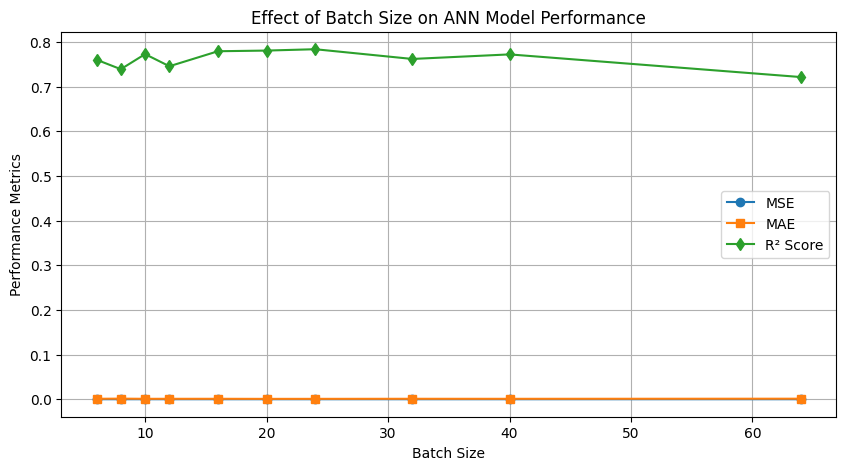

In [8]:
# ✅ Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random
import os
import matplotlib.pyplot as plt

# ✅ Step 2: Set Random Seed for Reproducibility
seed_value = 42  
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"  # Ensures TensorFlow deterministic operations

#**Step : Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step : Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable'  # Target variable

# ✅ Step 5: Convert Non-Numeric Values to NaN & Drop Missing Data
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(subset=features + [target], inplace=True)

# ✅ Step 6: Split Data into Training and Testing Sets
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value, shuffle=True)

# ✅ Step 7: Standardize Features
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# ✅ Step 8: Convert Data to NumPy Arrays for TensorFlow Compatibility
X_train_prep = np.array(X_train_prep, dtype=np.float32)
X_test_prep = np.array(X_test_prep, dtype=np.float32)

# ✅ Step 9: Create and Adapt Normalization Layer
norm_layer_final = layers.Normalization()
norm_layer_final.adapt(X_train_prep)

# ✅ Step 10: Define Function to Create ANN Model
def create_ann_model():
    model = keras.Sequential([
        norm_layer_final,  # Normalization layer
        layers.Dense(256, activation="relu"),  # First hidden layer
        layers.Dense(176, activation="relu"),  # Second hidden layer
        layers.Dense(1)  # Output layer (regression)
    ])

    model.compile(
        optimizer=RMSprop(learning_rate=0.00226),  # Best optimizer & LR from tuning
        loss="mse",
        metrics=["mse", "mae"]
    )
    
    return model

# ✅ Step 11: Test Different Batch Sizes
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []

for batch_size in batch_size_options:
    print(f"\n🔥 Training ANN Model with Batch Size: {batch_size}")

    # Create a fresh model for each batch size
    final_model = create_ann_model()

    # Early stopping callback
    early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history_final = final_model.fit(
        X_train_prep, y_train,
        epochs=50,
        validation_data=(X_test_prep, y_test),
        batch_size=batch_size,
        callbacks=[early_stopping_cb],
        verbose=1
    )

    # ✅ Step 12: Evaluate Model on Test Data
    test_loss, test_mse, test_mae = final_model.evaluate(X_test_prep, y_test, verbose=1)

    # ✅ Step 13: Compute R² Score
    y_pred_final = final_model.predict(X_test_prep).flatten()
    test_r2_final = r2_score(y_test, y_pred_final)

    # ✅ Step 14: Store Results
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2_final
    })
    
    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ Step 15: Convert Results to DataFrame & Display
results_df = pd.DataFrame(results)
print("\n🔥 **ANN Batch Size Results:**")
print(results_df)

# ✅ Step 16: Plot Results
plt.figure(figsize=(10, 5))
plt.plot(results_df["Batch Size"], results_df["Test MSE"], label="MSE", marker='o')
plt.plot(results_df["Batch Size"], results_df["Test MAE"], label="MAE", marker='s')
plt.plot(results_df["Batch Size"], results_df["Test R² Score"], label="R² Score", marker='d')
plt.xlabel("Batch Size")
plt.ylabel("Performance Metrics")
plt.title("Effect of Batch Size on ANN Model Performance")
plt.legend()
plt.grid(True)
plt.show()



CNN ( Base model)

Epoch 1/100


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.8411e-04 - mae: 0.0091 - mse: 3.8411e-04 - val_loss: 3.8632e-05 - val_mae: 0.0044 - val_mse: 3.8632e-05
Epoch 2/100
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3205e-04 - mae: 0.0034 - mse: 1.3205e-04 - val_loss: 2.0472e-05 - val_mae: 0.0028 - val_mse: 2.0472e-05
Epoch 3/100
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.4697e-05 - mae: 0.0029 - mse: 5.4697e-05 - val_loss: 8.8092e-06 - val_mae: 0.0017 - val_mse: 8.8092e-06
Epoch 4/100
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6712e-05 - mae: 0.0022 - mse: 2.6712e-05 - val_loss: 1.5551e-05 - val_mae: 0.0026 - val_mse: 1.5551e-05
Epoch 5/100
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1932e-05 - mae: 0.0017 - mse: 1.1932e-05 - val_loss: 6.0320e-06 - val_mae: 0.0014 - val_mse: 6.0320e-06
Epoch 6/100
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.8272e-06 - mae: 0.0012 - mse: 6.8272e-06 - val_loss: 4.9231e-06 - val_mae: 9.1740e-04 - val_mse: 4.9231e-06
Epoch 

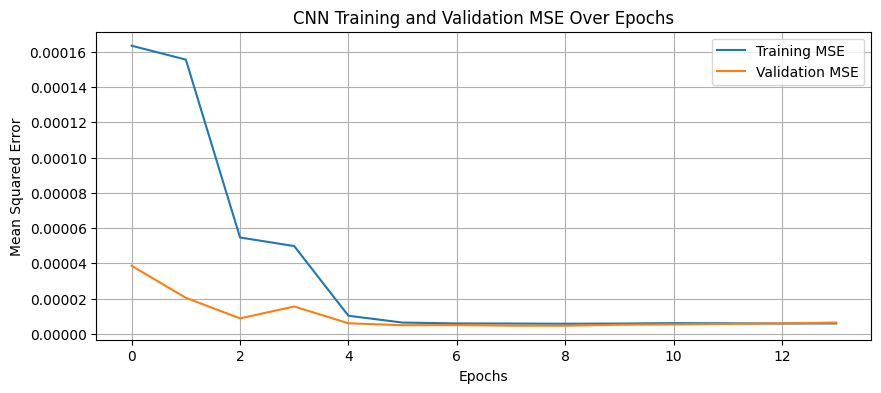

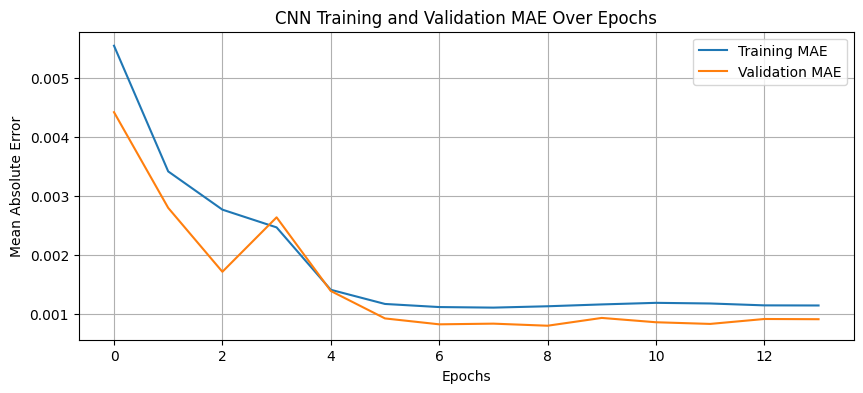

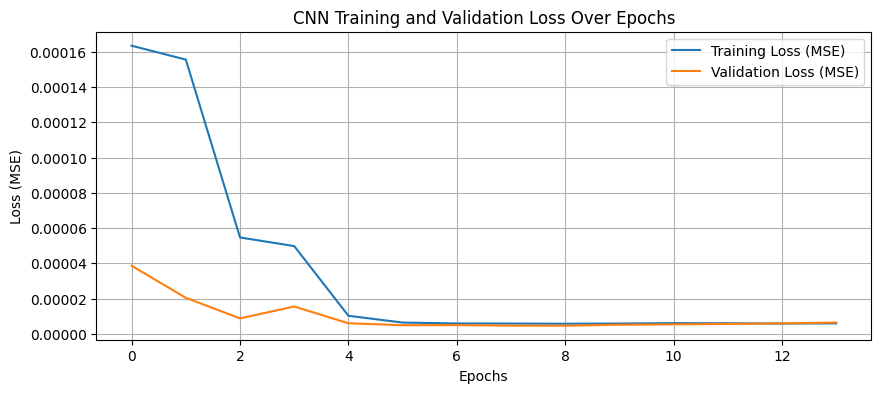

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random


# Set random seeds for reproducibility
seed_value = 42  # Change this if needed
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

#**Step : Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step : Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable'  

# **Step 3: Ensure Data is Numeric**
df = df.apply(pd.to_numeric, errors='coerce')

# **Step 4: Drop Missing Values**
df.dropna(subset=features + [target], inplace=True)

# **Step 5: Check if Data is Empty**
if df.empty:
    raise ValueError("Dataset is empty after preprocessing! Check the input file or preprocessing steps.")

# **Step 6: Split Data into Train & Test Sets**
X = df[features]
y = df[target]

if X.shape[0] < 2:  # Ensure there is enough data
    raise ValueError("Not enough samples after preprocessing to split into train and test sets.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 7: Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# **Step 8: Reshape Data for CNN (CNN Requires 3D Input)**
X_train_cnn = X_train_prep.reshape((X_train_prep.shape[0], X_train_prep.shape[1], 1))
X_test_cnn = X_test_prep.reshape((X_test_prep.shape[0], X_test_prep.shape[1], 1))

# **Step 9: Define CNN Model**
model_cnn = keras.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(X_train_prep.shape[1], 1)),
    layers.Conv1D(filters=32, kernel_size=3, activation="relu"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)  # Output layer for regression
])

# **Step 10: Compile the Model**
model_cnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mse", "mae"]
)

# **Step 11: Train CNN Model**
history_cnn = model_cnn.fit(
    X_train_cnn, y_train,
    epochs=100,
    validation_data=(X_test_cnn, y_test),
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# **Step 12: Evaluate CNN Model**
test_loss_cnn, test_mse_cnn, test_mae_cnn = model_cnn.evaluate(X_test_cnn, y_test, verbose=1)

# **Step 13: Compute R² Score**
y_pred_cnn = model_cnn.predict(X_test_cnn).flatten()
test_r2_cnn = r2_score(y_test, y_pred_cnn)

# **Step 14: Print CNN Model Evaluation**
print(f"\nCNN Model - Test Loss (MSE): {test_loss_cnn:.6f}")
print(f"CNN Model - Test MSE: {test_mse_cnn:.6f}")
print(f"CNN Model - Test MAE: {test_mae_cnn:.6f}")
print(f"CNN Model - Test R² Score: {test_r2_cnn:.6f}")

# **Step 15: Plot Training History**
import matplotlib.pyplot as plt

history_df_cnn = pd.DataFrame(history_cnn.history)

# **Plot MSE**
plt.figure(figsize=(10, 4))
plt.plot(history_df_cnn['mse'], label='Training MSE')
plt.plot(history_df_cnn['val_mse'], label='Validation MSE')
plt.title('CNN Training and Validation MSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# **Plot MAE**
plt.figure(figsize=(10, 4))
plt.plot(history_df_cnn['mae'], label='Training MAE')
plt.plot(history_df_cnn['val_mae'], label='Validation MAE')
plt.title('CNN Training and Validation MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

# **Plot Loss**
plt.figure(figsize=(10, 4))
plt.plot(history_df_cnn['loss'], label='Training Loss (MSE)')
plt.plot(history_df_cnn['val_loss'], label='Validation Loss (MSE)')
plt.title('CNN Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


CNN with batch size testing 

In [11]:
# **Step 1: Import Required Libraries**
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random
import matplotlib.pyplot as plt

# **Set Random Seeds for Reproducibility**
seed_value = 42  
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

#**Step : Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step : Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable'  

# **Step 4: Ensure Data is Numeric**
df = df.apply(pd.to_numeric, errors='coerce')

# **Step 5: Drop Missing Values**
df.dropna(subset=features + [target], inplace=True)

# **Step 6: Check if Data is Empty**
if df.empty:
    raise ValueError("Dataset is empty after preprocessing! Check the input file or preprocessing steps.")

# **Step 7: Split Data into Train & Test Sets**
X = df[features]
y = df[target]

if X.shape[0] < 2:  
    raise ValueError("Not enough samples after preprocessing to split into train and test sets.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 8: Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# **Step 9: Reshape Data for CNN (CNN Requires 3D Input)**
X_train_cnn = X_train_prep.reshape((X_train_prep.shape[0], X_train_prep.shape[1], 1))
X_test_cnn = X_test_prep.reshape((X_test_prep.shape[0], X_test_prep.shape[1], 1))

# **Step 10: Define Function to Create CNN Model**
def create_cnn_model():
    model = keras.Sequential([
        layers.Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(X_train_prep.shape[1], 1)),
        layers.Conv1D(filters=32, kernel_size=3, activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)  # Output layer for regression
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="mse",
        metrics=["mse", "mae"]
    )
    
    return model

# **Step 11: Test Different Batch Sizes**
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []

for batch_size in batch_size_options:
    print(f"\n🔥 Training CNN Model with Batch Size: {batch_size}")

    model_cnn = create_cnn_model()  # Fresh model for each batch size

    history_cnn = model_cnn.fit(
        X_train_cnn, y_train,
        epochs=100,
        validation_data=(X_test_cnn, y_test),
        batch_size=batch_size,
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        verbose=1
    )

    # **Step 12: Evaluate CNN Model**
    test_loss_cnn, test_mse_cnn, test_mae_cnn = model_cnn.evaluate(X_test_cnn, y_test, verbose=1)

    # **Step 13: Compute R² Score**
    y_pred_cnn = model_cnn.predict(X_test_cnn).flatten()
    test_r2_cnn = r2_score(y_test, y_pred_cnn)

    # **Step 14: Store Results**
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse_cnn,
        "Test MAE": test_mae_cnn,
        "Test R² Score": test_r2_cnn
    })
    
    print(f"✅ Stored results for Batch Size: {batch_size}")

# **Step 15: Convert Results to DataFrame & Display**
results_df = pd.DataFrame(results)
print("\n🔥 **CNN Batch Size Results:**")
print(results_df)



🔥 Training CNN Model with Batch Size: 6
Epoch 1/100


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3021/3021 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 2.6254e-04 - mae: 0.0065 - mse: 2.6254e-04 - val_loss: 1.6102e-05 - val_mae: 0.0017 - val_mse: 1.6102e-05
Epoch 2/100
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 3.4168e-05 - mae: 0.0020 - mse: 3.4168e-05 - val_loss: 1.8529e-05 - val_mae: 0.0015 - val_mse: 1.8529e-05
Epoch 3/100
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.3903e-05 - mae: 0.0016 - mse: 1.3903e-05 - val_loss: 1.9681e-05 - val_mae: 0.0018 - val_mse: 1.9681e-05
Epoch 4/100
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.8396e-05 - mae: 0.0018 - mse: 1.8396e-05 - val_loss: 1.9661e-05 - val_mae: 0.0016 - val_mse: 1.9661e-05
Epoch 5/100
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.8230e-05 - mae: 0.0018 - mse: 1.8230e-05 - val_loss: 1.9662e-05 - val_mae: 0.0016 - val_mse: 1.9662e-05
Epoch 6/100
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.8132e-05 - mae: 0.0017 - mse: 1.8132e-05 - val_loss: 1.9683e-05 - val_mae: 0.0015 - val_mse: 1.9683e-0

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2266/2266 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.4394e-04 - mae: 0.0080 - mse: 5.4394e-04 - val_loss: 1.9457e-05 - val_mae: 0.0030 - val_mse: 1.9457e-05
Epoch 2/100
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.4282e-05 - mae: 0.0027 - mse: 4.4282e-05 - val_loss: 1.2500e-05 - val_mae: 0.0017 - val_mse: 1.2500e-05
Epoch 3/100
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.1298e-05 - mae: 0.0019 - mse: 2.1298e-05 - val_loss: 1.0746e-05 - val_mae: 0.0017 - val_mse: 1.0746e-05
Epoch 4/100
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.5614e-05 - mae: 0.0018 - mse: 1.5614e-05 - val_loss: 1.2755e-05 - val_mae: 0.0017 - val_mse: 1.2755e-05
Epoch 5/100
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.3429e-05 - mae: 0.0016 - mse: 1.3429e-05 - val_loss: 6.5484e-06 - val_mae: 8.7377e-04 - val_mse: 6.5484e-06
Epoch 6/100
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.6587e-06 - mae: 0.0012 - mse: 8.6587e-06 - val_loss: 1.0582e-05 - val_mae: 0.0014 - val_mse: 1.058

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1813/1813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.3811e-04 - mae: 0.0059 - mse: 2.3811e-04 - val_loss: 1.3408e-05 - val_mae: 0.0020 - val_mse: 1.3408e-05
Epoch 2/100
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6.1491e-05 - mae: 0.0024 - mse: 6.1491e-05 - val_loss: 1.2771e-05 - val_mae: 0.0023 - val_mse: 1.2771e-05
Epoch 3/100
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.2070e-05 - mae: 0.0020 - mse: 1.2070e-05 - val_loss: 9.1663e-06 - val_mae: 0.0015 - val_mse: 9.1663e-06
Epoch 4/100
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8632e-05 - mae: 0.0019 - mse: 1.8632e-05 - val_loss: 8.9478e-06 - val_mae: 0.0016 - val_mse: 8.9478e-06
Epoch 5/100
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.3866e-05 - mae: 0.0018 - mse: 1.3866e-05 - val_loss: 1.1522e-05 - val_mae: 0.0012 - val_mse: 1.1522e-05
Epoch 6/100
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 8.2156e-06 - mae: 0.0012 - mse: 8.2156e-06 - val_loss: 5.2921e-06 - val_mae: 0.0011 - val_mse: 5.2921e-0

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1511/1511 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5930e-04 - mae: 0.0060 - mse: 1.5930e-04 - val_loss: 1.1408e-05 - val_mae: 0.0018 - val_mse: 1.1408e-05
Epoch 2/100
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.3346e-05 - mae: 0.0018 - mse: 1.3346e-05 - val_loss: 1.1666e-05 - val_mae: 0.0018 - val_mse: 1.1666e-05
Epoch 3/100
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5166e-05 - mae: 0.0018 - mse: 1.5166e-05 - val_loss: 9.0932e-06 - val_mae: 0.0014 - val_mse: 9.0932e-06
Epoch 4/100
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7049e-05 - mae: 0.0015 - mse: 1.7049e-05 - val_loss: 8.7409e-06 - val_mae: 0.0012 - val_mse: 8.7409e-06
Epoch 5/100
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.5299e-05 - mae: 0.0015 - mse: 3.5299e-05 - val_loss: 1.8696e-05 - val_mae: 0.0013 - val_mse: 1.8696e-05
Epoch 6/100
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.1740e-05 - mae: 0.0016 - mse: 3.1740e-05 - val_loss: 1.1820e-05 - val_mae: 0.0014 - val_mse: 1.1820e-0

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1133/1133 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7942e-04 - mae: 0.0070 - mse: 1.7942e-04 - val_loss: 2.5053e-05 - val_mae: 0.0031 - val_mse: 2.5053e-05
Epoch 2/100
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.3730e-05 - mae: 0.0031 - mse: 8.3730e-05 - val_loss: 2.2013e-05 - val_mae: 0.0027 - val_mse: 2.2013e-05
Epoch 3/100
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.7465e-05 - mae: 0.0025 - mse: 6.7465e-05 - val_loss: 1.7000e-05 - val_mae: 0.0017 - val_mse: 1.7000e-05
Epoch 4/100
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.7359e-05 - mae: 0.0020 - mse: 3.7359e-05 - val_loss: 7.0236e-06 - val_mae: 0.0013 - val_mse: 7.0236e-06
Epoch 5/100
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.3068e-05 - mae: 0.0016 - mse: 1.3068e-05 - val_loss: 7.5363e-06 - val_mae: 0.0013 - val_mse: 7.5363e-06
Epoch 6/100
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0778e-05 - mae: 0.0014 - mse: 1.0778e-05 - val_loss: 5.6050e-06 - val_mae: 0.0012 - val_mse: 5.6050e-0

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


907/907 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.8978e-04 - mae: 0.0074 - mse: 2.8978e-04 - val_loss: 3.4336e-05 - val_mae: 0.0038 - val_mse: 3.4336e-05
Epoch 2/100
907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.0407e-05 - mae: 0.0034 - mse: 9.0407e-05 - val_loss: 2.1542e-05 - val_mae: 0.0025 - val_mse: 2.1542e-05
Epoch 3/100
907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.9836e-05 - mae: 0.0027 - mse: 4.9836e-05 - val_loss: 2.1336e-05 - val_mae: 0.0025 - val_mse: 2.1336e-05
Epoch 4/100
907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.2304e-05 - mae: 0.0027 - mse: 8.2304e-05 - val_loss: 2.4387e-05 - val_mae: 0.0028 - val_mse: 2.4387e-05
Epoch 5/100
907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.9866e-05 - mae: 0.0030 - mse: 4.9866e-05 - val_loss: 1.2608e-05 - val_mae: 0.0020 - val_mse: 1.2608e-05
Epoch 6/100
907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.9657e-05 - mae: 0.0018 - mse: 3.9657e-05 - val_loss: 7.7418e-06 - val_mae: 0.0015 - val_mse: 7.7418e-06
Epoch 7/10

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


756/756 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.4779e-04 - mae: 0.0080 - mse: 2.4779e-04 - val_loss: 3.5971e-05 - val_mae: 0.0037 - val_mse: 3.5971e-05
Epoch 2/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.3800e-05 - mae: 0.0033 - mse: 4.3800e-05 - val_loss: 2.5627e-05 - val_mae: 0.0032 - val_mse: 2.5627e-05
Epoch 3/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.3989e-05 - mae: 0.0036 - mse: 8.3989e-05 - val_loss: 2.7568e-05 - val_mae: 0.0030 - val_mse: 2.7568e-05
Epoch 4/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.9312e-05 - mae: 0.0024 - mse: 3.9312e-05 - val_loss: 9.5705e-06 - val_mae: 0.0016 - val_mse: 9.5705e-06
Epoch 5/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.3009e-05 - mae: 0.0020 - mse: 4.3009e-05 - val_loss: 1.9627e-05 - val_mae: 0.0017 - val_mse: 1.9627e-05
Epoch 6/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7170e-05 - mae: 0.0017 - mse: 1.7170e-05 - val_loss: 1.5240e-05 - val_mae: 0.0015 - val_mse: 1.5240e-05
Epoch 7/10

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.2525e-04 - mae: 0.0120 - mse: 5.2525e-04 - val_loss: 8.4716e-05 - val_mae: 0.0063 - val_mse: 8.4716e-05
Epoch 2/100
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6283e-04 - mae: 0.0050 - mse: 1.6283e-04 - val_loss: 4.6003e-05 - val_mae: 0.0043 - val_mse: 4.6003e-05
Epoch 3/100
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.2989e-05 - mae: 0.0034 - mse: 6.2989e-05 - val_loss: 2.2363e-05 - val_mae: 0.0031 - val_mse: 2.2363e-05
Epoch 4/100
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0170e-05 - mae: 0.0024 - mse: 2.0170e-05 - val_loss: 8.9448e-06 - val_mae: 0.0018 - val_mse: 8.9448e-06
Epoch 5/100
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.4760e-06 - mae: 0.0016 - mse: 9.4760e-06 - val_loss: 8.2137e-06 - val_mae: 0.0016 - val_mse: 8.2137e-06
Epoch 6/100
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.6101e-06 - mae: 0.0016 - mse: 9.6101e-06 - val_loss: 6.7907e-06 - val_mae: 0.0014 - val_mse: 6.7907e-06
Epoch 7/10

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.4924e-04 - mae: 0.0066 - mse: 1.4924e-04 - val_loss: 4.6859e-05 - val_mae: 0.0048 - val_mse: 4.6859e-05
Epoch 2/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.8108e-05 - mae: 0.0031 - mse: 5.8108e-05 - val_loss: 2.4454e-05 - val_mae: 0.0031 - val_mse: 2.4454e-05
Epoch 3/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7428e-05 - mae: 0.0026 - mse: 2.7428e-05 - val_loss: 1.7095e-05 - val_mae: 0.0027 - val_mse: 1.7095e-05
Epoch 4/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8031e-05 - mae: 0.0021 - mse: 1.8031e-05 - val_loss: 1.0229e-05 - val_mae: 0.0022 - val_mse: 1.0229e-05
Epoch 5/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.9159e-06 - mae: 0.0015 - mse: 9.9159e-06 - val_loss: 5.8144e-06 - val_mae: 0.0014 - val_mse: 5.8144e-06
Epoch 6/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.3827e-06 - mae: 0.0012 - mse: 6.3827e-06 - val_loss: 5.6972e-06 - val_mae: 0.0014 - val_mse: 5.6972e-06
Epoch 7/10

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


284/284 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.9458e-04 - mae: 0.0107 - mse: 4.9458e-04 - val_loss: 9.9932e-05 - val_mae: 0.0076 - val_mse: 9.9932e-05
Epoch 2/100
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3880e-04 - mae: 0.0049 - mse: 1.3880e-04 - val_loss: 5.0611e-05 - val_mae: 0.0048 - val_mse: 5.0611e-05
Epoch 3/100
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4952e-05 - mae: 0.0034 - mse: 3.4952e-05 - val_loss: 4.1240e-05 - val_mae: 0.0040 - val_mse: 4.1240e-05
Epoch 4/100
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.0416e-05 - mae: 0.0031 - mse: 6.0416e-05 - val_loss: 1.4218e-05 - val_mae: 0.0024 - val_mse: 1.4218e-05
Epoch 5/100
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0900e-05 - mae: 0.0018 - mse: 1.0900e-05 - val_loss: 7.4128e-06 - val_mae: 0.0014 - val_mse: 7.4128e-06
Epoch 6/100
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.5857e-06 - mae: 0.0014 - mse: 7.5857e-06 - val_loss: 6.4209e-06 - val_mae: 0.0013 - val_mse: 6.4209e-06
Epoch 7/10

In [ ]:
CNN Final one 

In [3]:
# **Step 1: Import Required Libraries**
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random
import matplotlib.pyplot as plt

# **Set Random Seeds for Reproducibility**
seed_value = 42  
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

#**Step : Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx'
df = pd.read_excel(file_path)

# **Step : Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'

# **Step 4: Ensure Data is Numeric**
df = df.apply(pd.to_numeric, errors='coerce')

# **Step 5: Drop Missing Values**
df.dropna(subset=features + [target], inplace=True)

# **Step 6: Check if Data is Empty**
if df.empty:
    raise ValueError("Dataset is empty after preprocessing! Check the input file or preprocessing steps.")

# **Step 7: Split Data into Train & Test Sets**
X = df[features]; y = df[target]
if X.shape[0] < 2:
    raise ValueError("Not enough samples after preprocessing to split into train and test sets.")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 8: Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep  = scaler.transform(X_test)

# **Step 9: Reshape Data for CNN (Samples, Timesteps, Channels)**
X_train_cnn = X_train_prep.reshape((X_train_prep.shape[0], X_train_prep.shape[1], 1))
X_test_cnn  = X_test_prep.reshape((X_test_prep.shape[0],  X_test_prep.shape[1],  1))

# **Step 10: Define Function to Create CNN Model**
def create_cnn_model():
    model = keras.Sequential([
        layers.Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(X_train_prep.shape[1], 1)),
        layers.Conv1D(filters=32, kernel_size=3, activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mse", "mae"])
    return model

# **Step 11: Batch-size sweep (train-only validation; no leakage)**
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []
best_bs, best_val = None, float("inf")

for batch_size in batch_size_options:
    print(f"\nTraining CNN Model with Batch Size: {batch_size}")
    model_cnn = create_cnn_model()
    history_cnn = model_cnn.fit(
        X_train_cnn, y_train,
        epochs=100,
        validation_split=0.2,   # ← changed: no test-as-validation
        batch_size=batch_size,
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        verbose=0
    )
    this_best_val = min(history_cnn.history["val_loss"])
    results.append({"Batch Size": batch_size, "Best Val MSE": this_best_val})
    if this_best_val < best_val:
        best_val, best_bs = this_best_val, batch_size

print("\nSelected best batch size (by lowest val_loss):", best_bs)

# **Final training with chosen batch; single test evaluation**
final_cnn = create_cnn_model()
final_cnn.fit(
    X_train_cnn, y_train,
    epochs=100,
    validation_split=0.2,
    batch_size=best_bs,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=0
)

# **Evaluate once on test**
test_loss_cnn, test_mse_cnn, test_mae_cnn = final_cnn.evaluate(X_test_cnn, y_test, verbose=0)
y_pred_cnn = final_cnn.predict(X_test_cnn, verbose=0).ravel()
test_r2_cnn = r2_score(y_test, y_pred_cnn)

print("\n**CNN Final Result (Lab, with best batch size):**")
print({"Batch Size": best_bs, "Test MSE": test_mse_cnn, "Test MAE": test_mae_cnn, "Test R² Score": test_r2_cnn})

# **Optional: show the sweep table**
results_df = pd.DataFrame(results).sort_values("Batch Size")
print("\nCNN Batch Size Sweep (train-only validation):")
print(results_df)



Training CNN Model with Batch Size: 6


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN Model with Batch Size: 8


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN Model with Batch Size: 10


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN Model with Batch Size: 12


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN Model with Batch Size: 16


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN Model with Batch Size: 20


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN Model with Batch Size: 24


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN Model with Batch Size: 32


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN Model with Batch Size: 40


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN Model with Batch Size: 64


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Selected best batch size (by lowest val_loss): 64


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



**CNN Final Result (Lab, with best batch size):**
{'Batch Size': 64, 'Test MSE': 5.011779194319388e-06, 'Test MAE': 0.000870006624609232, 'Test R² Score': 0.7451465555476164}

CNN Batch Size Sweep (train-only validation):
   Batch Size  Best Val MSE
0           6      0.000005
1           8      0.000006
2          10      0.000006
3          12      0.000006
4          16      0.000005
5          20      0.000005
6          24      0.000006
7          32      0.000005
8          40      0.000005
9          64      0.000005


CNN Hyperparameter Tuning (Bayesian Optimization)

In [12]:
# ✅ **Set Random Seed for Reproducibility**
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import keras_tuner as kt
import random
import os

seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

#**Step : Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step : Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable'  

# ✅ **Drop Missing Values**
df = df.dropna(subset=features + [target])

# ✅ **Convert to NumPy Arrays**
X = df[features].values
y = df[target].values

# ✅ **Split Dataset**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value, shuffle=True)

# ✅ **Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# ✅ **Reshape for CNN (samples, timesteps, features)**
X_train_prep = X_train_prep.reshape((X_train_prep.shape[0], X_train_prep.shape[1], 1))
X_test_prep = X_test_prep.reshape((X_test_prep.shape[0], X_test_prep.shape[1], 1))

# ✅ **Hyperparameter Tuning Function**
def build_cnn_model(hp):
    model = keras.Sequential()

    # Tune number of Conv1D layers (1 to 3)
    for i in range(hp.Int('n_conv_layers', 1, 3)):
        model.add(layers.Conv1D(
            filters=hp.Int(f'filters_{i}', min_value=16, max_value=128, step=16),
            kernel_size=hp.Int(f'kernel_size_{i}', min_value=2, max_value=5, step=1),
            activation="relu"
        ))
    
    model.add(layers.Flatten())  # Flatten before fully connected layers

    # Fully connected layers
    for i in range(hp.Int('n_dense_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'dense_units_{i}', min_value=16, max_value=128, step=16),
            activation="relu"
        ))

    # Output layer
    model.add(layers.Dense(1))

    # Tune learning rate
    learning_rate = hp.Float('learning_rate', min_value=0.0001, max_value=0.01, sampling='log')

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="mse",
        metrics=["mse", "mae"]
    )
    return model

# ✅ **Hyperparameter Search with Bayesian Optimization**
tuner = kt.BayesianOptimization(
    build_cnn_model,
    objective='val_mse',
    max_trials=10,
    directory='cnn_tuning',
    project_name='Optimized_CNN'
)

# ✅ **Run the Hyperparameter Search**
tuner.search(X_train_prep, y_train, epochs=20, validation_data=(X_test_prep, y_test), verbose=1)

# ✅ **Get Best Hyperparameters**
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Conv1D layers: {best_hps.get('n_conv_layers')}")
print(f"Best Filters per layer: {[best_hps.get(f'filters_{i}') for i in range(best_hps.get('n_conv_layers'))]}")
print(f"Best Kernel Sizes: {[best_hps.get(f'kernel_size_{i}') for i in range(best_hps.get('n_conv_layers'))]}")
print(f"Best Dense layers: {best_hps.get('n_dense_layers')}")
print(f"Best Dense Units per layer: {[best_hps.get(f'dense_units_{i}') for i in range(best_hps.get('n_dense_layers'))]}")
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")

# ✅ **Store Best Hyperparameters for Part 2**
best_hyperparameters = {
    'n_conv_layers': best_hps.get('n_conv_layers'),
    'filters': [best_hps.get(f'filters_{i}') for i in range(best_hps.get('n_conv_layers'))],
    'kernel_sizes': [best_hps.get(f'kernel_size_{i}') for i in range(best_hps.get('n_conv_layers'))],
    'n_dense_layers': best_hps.get('n_dense_layers'),
    'dense_units': [best_hps.get(f'dense_units_{i}') for i in range(best_hps.get('n_dense_layers'))],
    'learning_rate': best_hps.get('learning_rate')
}



Reloading Tuner from cnn_tuning\Optimized_CNN\tuner0.json
Best Conv1D layers: 1
Best Filters per layer: [48]
Best Kernel Sizes: [3]
Best Dense layers: 3
Best Dense Units per layer: [128, 64, 16]
Best Learning Rate: 0.0013877861489844856


In [13]:
# ✅ **Set Random Seed for Consistency**
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# ✅ **Train the Final Optimized CNN Model with Different Batch Sizes**
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]  # Try different batch sizes
results = []  # List to store results

for batch_size in batch_size_options:
    print(f"\n🔥 Training CNN Model with Batch Size: {batch_size}")

    # **Rebuild CNN Model with Best Hyperparameters**
    final_cnn_model = keras.Sequential()

    # Add Conv1D layers
    for i in range(best_hyperparameters['n_conv_layers']):
        final_cnn_model.add(layers.Conv1D(
            filters=best_hyperparameters['filters'][i],
            kernel_size=best_hyperparameters['kernel_sizes'][i],
            activation="relu"
        ))
    
    final_cnn_model.add(layers.Flatten())

    # Add Fully Connected Dense Layers
    for i in range(best_hyperparameters['n_dense_layers']):
        final_cnn_model.add(layers.Dense(
            units=best_hyperparameters['dense_units'][i],
            activation='relu'
        ))

    # Output layer
    final_cnn_model.add(layers.Dense(1))

    # Compile Model
    final_cnn_model.compile(
        optimizer=Adam(learning_rate=best_hyperparameters['learning_rate']),
        loss="mse",
        metrics=["mse", "mae"]
    )

    # **Train Model**
    history_final_cnn = final_cnn_model.fit(
        X_train_prep, y_train,
        epochs=50,
        validation_data=(X_test_prep, y_test),
        batch_size=batch_size,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        verbose=1
    )

    # ✅ **Evaluate the Model**
    test_loss, test_mse, test_mae = final_cnn_model.evaluate(X_test_prep, y_test, verbose=1)

    # ✅ **Compute R² Score**
    y_pred_final = final_cnn_model.predict(X_test_prep).flatten()
    test_r2_final = r2_score(y_test, y_pred_final)

    # ✅ **Store Results**
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2_final
    })

    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ **Convert Results to DataFrame & Display**
results_df = pd.DataFrame(results)
print("\n🔥 **CNN Batch Size Results:**")
print(results_df)



🔥 Training CNN Model with Batch Size: 6
Epoch 1/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3.7847e-04 - mae: 0.0057 - mse: 3.7847e-04 - val_loss: 1.9363e-05 - val_mae: 0.0012 - val_mse: 1.9363e-05
Epoch 2/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 1.0600e-05 - mae: 0.0015 - mse: 1.0600e-05 - val_loss: 1.2611e-05 - val_mae: 0.0014 - val_mse: 1.2611e-05
Epoch 3/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.3433e-05 - mae: 0.0016 - mse: 1.3433e-05 - val_loss: 1.4978e-05 - val_mae: 0.0014 - val_mse: 1.4978e-05
Epoch 4/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.4033e-06 - mae: 0.0013 - mse: 8.4033e-06 - val_loss: 1.4548e-05 - val_mae: 0.0016 - val_mse: 1.4548e-05
Epoch 5/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.4705e-06 - mae: 0.0013 - mse: 8.4705e-06 - val_loss: 1.3259e-05 - val_mae: 0.0015 - val_mse: 1.3259e-05
Epoch 6/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 7.5688e-06 - mae: 0.0013 - mse: 7.5688e-06 - val_loss: 1.

LSTM

LSTM Input Shape: (18121, 1, 7)
Epoch 1/50


C:\Users\thtuh\AppData\Local\Temp\ipykernel_29812\1554340003.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


756/756 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4120e-05 - mae: 0.0019 - mse: 1.4120e-05 - val_loss: 5.9077e-06 - val_mae: 8.6135e-04 - val_mse: 5.9077e-06
Epoch 2/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.1258e-06 - mae: 0.0012 - mse: 7.1258e-06 - val_loss: 5.2030e-06 - val_mae: 7.9983e-04 - val_mse: 5.2030e-06
Epoch 3/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.7330e-06 - mae: 0.0012 - mse: 7.7330e-06 - val_loss: 4.9577e-06 - val_mae: 7.7703e-04 - val_mse: 4.9577e-06
Epoch 4/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.5858e-06 - mae: 0.0012 - mse: 6.5858e-06 - val_loss: 5.6995e-06 - val_mae: 7.1351e-04 - val_mse: 5.6995e-06
Epoch 5/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1341e-06 - mae: 0.0011 - mse: 6.1341e-06 - val_loss: 4.8341e-06 - val_mae: 7.0636e-04 - val_mse: 4.8341e-06
Epoch 6/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1399e-06 - mae: 0.0011 - mse: 6.1399e-06 - val_loss: 4.5586e-06 - val_mae: 6.9984e-04 - val_mse: 4.

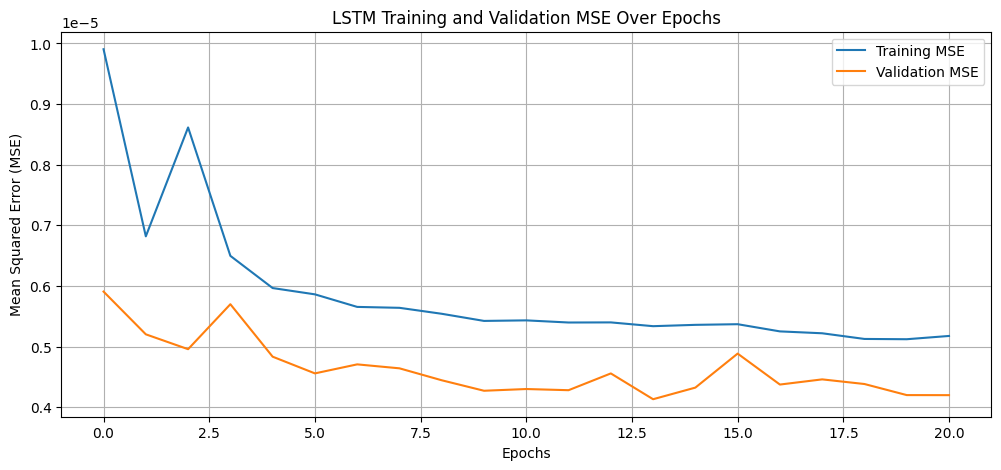

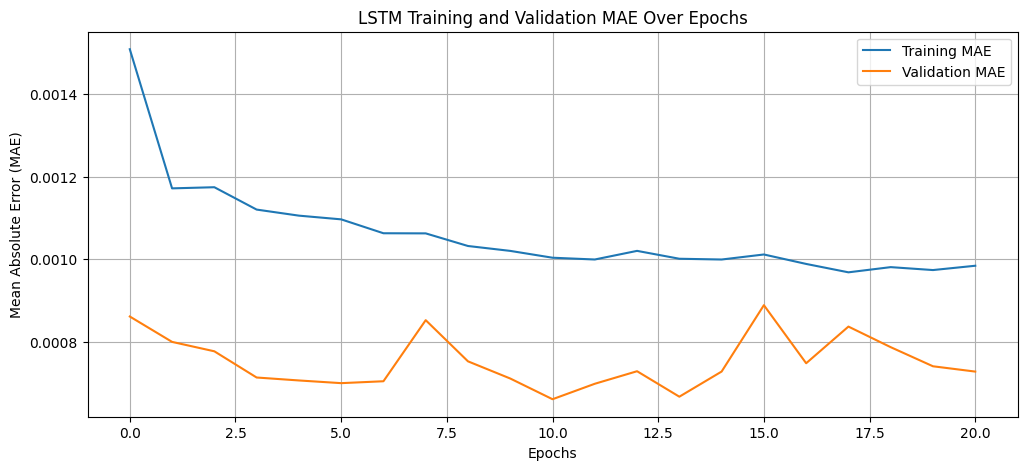

In [ ]:

# Import Necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import random


# Set random seeds for reproducibility
seed_value = 42  # Change this if needed
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


#**Step : Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step : Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable'  

X = df[features]
y = df[target]

# ✅ Step 3: Handle Missing Values
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)

# ✅ Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 5: Standardize Features
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# ✅ Step 6: Reshape Data for LSTM (Samples, Time Steps, Features)
X_train_lstm = np.reshape(X_train_prep, (X_train_prep.shape[0], 1, X_train_prep.shape[1]))
X_test_lstm = np.reshape(X_test_prep, (X_test_prep.shape[0], 1, X_test_prep.shape[1]))

print("LSTM Input Shape:", X_train_lstm.shape)  # Expected: (samples, 1, features)

# ✅ Step 7: Define LSTM Model
lstm_model = keras.Sequential([
    layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(1, X_train_prep.shape[1])),
    layers.LSTM(32, activation='relu', return_sequences=False),
    layers.Dropout(0.2),  # Added dropout for regularization
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Regression output
])

# ✅ Step 8: Compile the Model
lstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Reduced LR from 0.0037 to 0.001
    loss='mse',
    metrics=['mse', 'mae']
)

# ✅ Step 9: Train the Model
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history_lstm = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=50,
    validation_data=(X_test_lstm, y_test),
    batch_size=24,  # Changed batch size to 24 for better convergence
    callbacks=[early_stopping_cb],
    verbose=1
)

# ✅ Step 10: Evaluate Model
test_loss, test_mse, test_mae = lstm_model.evaluate(X_test_lstm, y_test, verbose=1)

# Compute R² Score
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()
test_r2 = r2_score(y_test, y_pred_lstm)

# ✅ Step 11: Print Model Performance
print(f"\n🔥 Optimized LSTM Model Results:")
print(f"📌 Test Loss (MSE): {test_loss:.6f}")
print(f"📌 Test MSE: {test_mse:.6f}")
print(f"📌 Test MAE: {test_mae:.6f}")
print(f"📌 Test R² Score: {test_r2:.6f}")

# ✅ Step 12: Plot Training Performance
history_df = pd.DataFrame(history_lstm.history)

# Plot Training & Validation MSE
plt.figure(figsize=(12, 5))
plt.plot(history_df['mse'], label='Training MSE')
plt.plot(history_df['val_mse'], label='Validation MSE')
plt.title('LSTM Training and Validation MSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training & Validation MAE
plt.figure(figsize=(12, 5))
plt.plot(history_df['mae'], label='Training MAE')
plt.plot(history_df['val_mae'], label='Validation MAE')
plt.title('LSTM Training and Validation MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()


LSTM batch size testing

LSTM Input Shape: (18121, 1, 7)

🔥 Training LSTM Model with Batch Size: 6
Epoch 1/50


C:\Users\thtuh\AppData\Local\Temp\ipykernel_29812\4019970633.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3021/3021 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.3306e-05 - mae: 0.0018 - mse: 1.3306e-05 - val_loss: 1.2574e-05 - val_mae: 0.0016 - val_mse: 1.2574e-05
Epoch 2/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.0585e-06 - mae: 0.0014 - mse: 9.0585e-06 - val_loss: 1.5296e-05 - val_mae: 0.0015 - val_mse: 1.5296e-05
Epoch 3/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.1480e-06 - mae: 0.0013 - mse: 8.1480e-06 - val_loss: 5.6017e-06 - val_mae: 8.9533e-04 - val_mse: 5.6017e-06
Epoch 4/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 7.0283e-06 - mae: 0.0013 - mse: 7.0283e-06 - val_loss: 1.1425e-05 - val_mae: 0.0012 - val_mse: 1.1425e-05
Epoch 5/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 7.1016e-06 - mae: 0.0013 - mse: 7.1016e-06 - val_loss: 5.8408e-06 - val_mae: 8.7375e-04 - val_mse: 5.8408e-06
Epoch 6/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 6.5156e-06 - mae: 0.0012 - mse: 6.5156e-06 - val_loss: 4.8597e-06 - val_mae: 0.0011 - val_mse: 4.8597

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2266/2266 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.4426e-05 - mae: 0.0017 - mse: 1.4426e-05 - val_loss: 1.7865e-05 - val_mae: 0.0012 - val_mse: 1.7865e-05
Epoch 2/50
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.2015e-05 - mae: 0.0014 - mse: 2.2015e-05 - val_loss: 4.5506e-06 - val_mae: 8.7702e-04 - val_mse: 4.5506e-06
Epoch 3/50
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.2942e-05 - mae: 0.0012 - mse: 1.2942e-05 - val_loss: 6.3290e-06 - val_mae: 0.0010 - val_mse: 6.3290e-06
Epoch 4/50
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.4681e-06 - mae: 0.0011 - mse: 6.4681e-06 - val_loss: 4.9327e-06 - val_mae: 8.2645e-04 - val_mse: 4.9327e-06
Epoch 5/50
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6.4339e-06 - mae: 0.0012 - mse: 6.4339e-06 - val_loss: 5.4616e-06 - val_mae: 9.3429e-04 - val_mse: 5.4616e-06
Epoch 6/50
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6.4263e-06 - mae: 0.0012 - mse: 6.4263e-06 - val_loss: 6.2078e-06 - val_mae: 0.0011 - val_mse: 6.

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1813/1813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.2930e-05 - mae: 0.0017 - mse: 1.2930e-05 - val_loss: 1.2235e-05 - val_mae: 0.0013 - val_mse: 1.2235e-05
Epoch 2/50
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7.5450e-06 - mae: 0.0012 - mse: 7.5450e-06 - val_loss: 5.0844e-06 - val_mae: 7.7300e-04 - val_mse: 5.0844e-06
Epoch 3/50
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7.6790e-06 - mae: 0.0012 - mse: 7.6790e-06 - val_loss: 6.4952e-06 - val_mae: 0.0010 - val_mse: 6.4952e-06
Epoch 4/50
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.5029e-06 - mae: 0.0011 - mse: 6.5029e-06 - val_loss: 4.6996e-06 - val_mae: 7.7919e-04 - val_mse: 4.6996e-06
Epoch 5/50
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 6.4170e-06 - mae: 0.0012 - mse: 6.4170e-06 - val_loss: 4.7488e-06 - val_mae: 7.4198e-04 - val_mse: 4.7488e-06
Epoch 6/50
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.2406e-06 - mae: 0.0011 - mse: 6.2406e-06 - val_loss: 4.9625e-06 - val_mae: 7.3317e-04 - val_mse

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1511/1511 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.3828e-05 - mae: 0.0017 - mse: 1.3828e-05 - val_loss: 5.6246e-06 - val_mae: 8.6750e-04 - val_mse: 5.6246e-06
Epoch 2/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1389e-05 - mae: 0.0012 - mse: 1.1389e-05 - val_loss: 5.3886e-06 - val_mae: 9.2241e-04 - val_mse: 5.3886e-06
Epoch 3/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.6967e-06 - mae: 0.0012 - mse: 6.6967e-06 - val_loss: 5.4979e-06 - val_mae: 8.8614e-04 - val_mse: 5.4979e-06
Epoch 4/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1740e-05 - mae: 0.0012 - mse: 1.1740e-05 - val_loss: 5.6513e-06 - val_mae: 0.0012 - val_mse: 5.6513e-06
Epoch 5/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.1835e-06 - mae: 0.0011 - mse: 6.1835e-06 - val_loss: 4.6107e-06 - val_mae: 8.7919e-04 - val_mse: 4.6107e-06
Epoch 6/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.2774e-06 - mae: 0.0011 - mse: 6.2774e-06 - val_loss: 4.9234e-06 - val_mae: 8.9962e-04 - val

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1133/1133 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4310e-05 - mae: 0.0018 - mse: 1.4310e-05 - val_loss: 7.2506e-06 - val_mae: 0.0010 - val_mse: 7.2506e-06
Epoch 2/50
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.2202e-05 - mae: 0.0013 - mse: 6.2202e-05 - val_loss: 5.3805e-06 - val_mae: 8.5253e-04 - val_mse: 5.3805e-06
Epoch 3/50
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.1181e-06 - mae: 0.0011 - mse: 7.1181e-06 - val_loss: 5.5184e-06 - val_mae: 9.4214e-04 - val_mse: 5.5184e-06
Epoch 4/50
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.7871e-06 - mae: 0.0012 - mse: 6.7871e-06 - val_loss: 4.9324e-06 - val_mae: 0.0011 - val_mse: 4.9324e-06
Epoch 5/50
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.7047e-06 - mae: 0.0011 - mse: 6.7047e-06 - val_loss: 4.8075e-06 - val_mae: 0.0010 - val_mse: 4.8075e-06
Epoch 6/50
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.1903e-06 - mae: 0.0011 - mse: 6.1903e-06 - val_loss: 4.4873e-06 - val_mae: 8.0062e-04 - val_mse: 4.

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


907/907 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7735e-05 - mae: 0.0019 - mse: 1.7735e-05 - val_loss: 6.2816e-06 - val_mae: 8.3023e-04 - val_mse: 6.2816e-06
Epoch 2/50
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.6993e-06 - mae: 0.0011 - mse: 6.6993e-06 - val_loss: 4.9380e-06 - val_mae: 7.7173e-04 - val_mse: 4.9380e-06
Epoch 3/50
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.6176e-06 - mae: 0.0011 - mse: 6.6176e-06 - val_loss: 4.7871e-06 - val_mae: 7.4570e-04 - val_mse: 4.7871e-06
Epoch 4/50
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.4241e-06 - mae: 0.0011 - mse: 6.4241e-06 - val_loss: 4.9248e-06 - val_mae: 7.4655e-04 - val_mse: 4.9248e-06
Epoch 5/50
907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.4128e-06 - mae: 0.0011 - mse: 6.4128e-06 - val_loss: 4.6182e-06 - val_mae: 6.9262e-04 - val_mse: 4.6182e-06
Epoch 6/50
907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.9477e-06 - mae: 0.0010 - mse: 5.9477e-06 - val_loss: 4.9365e-06 - val_mae: 7.2476e-04 - val_mse: 4.

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


756/756 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.2798e-05 - mae: 0.0017 - mse: 1.2798e-05 - val_loss: 6.0222e-06 - val_mae: 8.9917e-04 - val_mse: 6.0222e-06
Epoch 2/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.3650e-06 - mae: 0.0012 - mse: 7.3650e-06 - val_loss: 5.3334e-06 - val_mae: 7.9337e-04 - val_mse: 5.3334e-06
Epoch 3/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.5825e-06 - mae: 0.0011 - mse: 6.5825e-06 - val_loss: 4.5935e-06 - val_mae: 7.1149e-04 - val_mse: 4.5935e-06
Epoch 4/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.3755e-06 - mae: 0.0011 - mse: 6.3755e-06 - val_loss: 4.9475e-06 - val_mae: 7.1785e-04 - val_mse: 4.9475e-06
Epoch 5/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2994e-06 - mae: 0.0011 - mse: 6.2994e-06 - val_loss: 4.3976e-06 - val_mae: 7.2925e-04 - val_mse: 4.3976e-06
Epoch 6/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1836e-06 - mae: 0.0011 - mse: 6.1836e-06 - val_loss: 5.1197e-06 - val_mae: 7.5183e-04 - val_mse: 5.

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


567/567 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7744e-05 - mae: 0.0020 - mse: 1.7744e-05 - val_loss: 7.7887e-06 - val_mae: 0.0019 - val_mse: 7.7887e-06
Epoch 2/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4524e-05 - mae: 0.0012 - mse: 1.4524e-05 - val_loss: 5.9108e-06 - val_mae: 0.0014 - val_mse: 5.9108e-06
Epoch 3/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.1478e-06 - mae: 0.0011 - mse: 7.1478e-06 - val_loss: 5.2876e-06 - val_mae: 0.0015 - val_mse: 5.2876e-06
Epoch 4/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2437e-06 - mae: 0.0010 - mse: 6.2437e-06 - val_loss: 5.4761e-06 - val_mae: 0.0015 - val_mse: 5.4761e-06
Epoch 5/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.5676e-06 - mae: 0.0011 - mse: 6.5676e-06 - val_loss: 5.1113e-06 - val_mae: 0.0014 - val_mse: 5.1113e-06
Epoch 6/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1201e-06 - mae: 0.0011 - mse: 6.1201e-06 - val_loss: 5.2571e-06 - val_mae: 0.0012 - val_mse: 5.2571e-06
Epoch 7/50
567/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5411e-05 - mae: 0.0018 - mse: 1.5411e-05 - val_loss: 6.1957e-06 - val_mae: 0.0014 - val_mse: 6.1957e-06
Epoch 2/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2548e-06 - mae: 0.0011 - mse: 8.2548e-06 - val_loss: 5.9353e-06 - val_mae: 0.0014 - val_mse: 5.9353e-06
Epoch 3/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.8959e-06 - mae: 0.0011 - mse: 6.8959e-06 - val_loss: 5.3697e-06 - val_mae: 0.0014 - val_mse: 5.3697e-06
Epoch 4/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.3125e-06 - mae: 0.0011 - mse: 6.3125e-06 - val_loss: 5.6365e-06 - val_mae: 0.0015 - val_mse: 5.6365e-06
Epoch 5/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2623e-06 - mae: 0.0011 - mse: 6.2623e-06 - val_loss: 5.6751e-06 - val_mae: 0.0016 - val_mse: 5.6751e-06
Epoch 6/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.9577e-06 - mae: 0.0010 - mse: 5.9577e-06 - val_loss: 5.0771e-06 - val_mae: 0.0012 - val_mse: 5.0771e-06
Epoch 7/50
454/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


284/284 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.0247e-05 - mae: 0.0024 - mse: 2.0247e-05 - val_loss: 5.1679e-06 - val_mae: 0.0010 - val_mse: 5.1679e-06
Epoch 2/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.8717e-06 - mae: 0.0013 - mse: 8.8717e-06 - val_loss: 4.9620e-06 - val_mae: 8.5148e-04 - val_mse: 4.9620e-06
Epoch 3/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.9626e-06 - mae: 0.0011 - mse: 7.9626e-06 - val_loss: 4.5895e-06 - val_mae: 9.2975e-04 - val_mse: 4.5895e-06
Epoch 4/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.3164e-06 - mae: 0.0011 - mse: 6.3164e-06 - val_loss: 5.3235e-06 - val_mae: 0.0014 - val_mse: 5.3235e-06
Epoch 5/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1247e-06 - mae: 0.0010 - mse: 6.1247e-06 - val_loss: 5.2037e-06 - val_mae: 0.0012 - val_mse: 5.2037e-06
Epoch 6/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.3949e-06 - mae: 0.0011 - mse: 6.3949e-06 - val_loss: 5.4539e-06 - val_mae: 9.3473e-04 - val_mse: 5.4539e-06
Epo

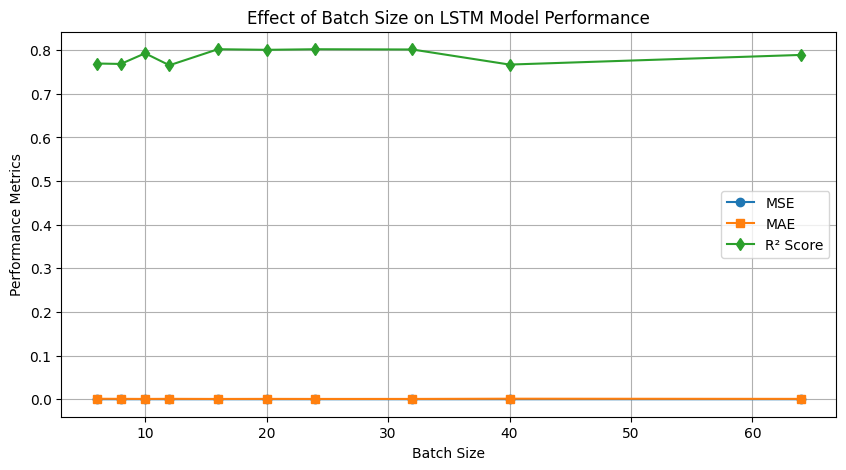

In [ ]:
# **Step 1: Import Necessary Libraries**
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import random

# **Set Random Seeds for Reproducibility**
seed_value = 42  
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

#**Step : Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step : Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable'  

X = df[features]
y = df[target]

# ✅ **Step 4: Handle Missing Values**
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)

# ✅ **Step 5: Train-Test Split**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ **Step 6: Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# ✅ **Step 7: Reshape Data for LSTM (Samples, Time Steps, Features)**
X_train_lstm = np.reshape(X_train_prep, (X_train_prep.shape[0], 1, X_train_prep.shape[1]))
X_test_lstm = np.reshape(X_test_prep, (X_test_prep.shape[0], 1, X_test_prep.shape[1]))

print("LSTM Input Shape:", X_train_lstm.shape)  # Expected: (samples, 1, features)

# ✅ **Step 8: Define Function to Create LSTM Model**
def create_lstm_model():
    model = keras.Sequential([
        layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(1, X_train_prep.shape[1])),
        layers.LSTM(32, activation='relu', return_sequences=False),
        layers.Dropout(0.2),  # Regularization
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Regression output
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mse', 'mae']
    )
    
    return model

# ✅ **Step 9: Test Different Batch Sizes**
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []

for batch_size in batch_size_options:
    print(f"\n🔥 Training LSTM Model with Batch Size: {batch_size}")

    # Create a fresh model for each batch size
    lstm_model = create_lstm_model()

    # Early stopping callback
    early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

    # Train the model
    history_lstm = lstm_model.fit(
        X_train_lstm, y_train,
        epochs=50,
        validation_data=(X_test_lstm, y_test),
        batch_size=batch_size,
        callbacks=[early_stopping_cb],
        verbose=1
    )

    # ✅ **Step 10: Evaluate Model**
    test_loss, test_mse, test_mae = lstm_model.evaluate(X_test_lstm, y_test, verbose=1)

    # Compute R² Score
    y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()
    test_r2 = r2_score(y_test, y_pred_lstm)

    # ✅ **Step 11: Store Results**
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2
    })
    
    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ **Step 12: Convert Results to DataFrame & Display**
results_df = pd.DataFrame(results)
print("\n🔥 **LSTM Batch Size Results:**")
print(results_df)

# ✅ **Step 13: Plot Results**
plt.figure(figsize=(10, 5))
plt.plot(results_df["Batch Size"], results_df["Test MSE"], label="MSE", marker='o')
plt.plot(results_df["Batch Size"], results_df["Test MAE"], label="MAE", marker='s')
plt.plot(results_df["Batch Size"], results_df["Test R² Score"], label="R² Score", marker='d')
plt.xlabel("Batch Size")
plt.ylabel("Performance Metrics")
plt.title("Effect of Batch Size on LSTM Model Performance")
plt.legend()
plt.grid(True)
plt.show()



final LSTM 

In [4]:
# **Step 1: Import Necessary Libraries**
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import random

# **Set Random Seeds for Reproducibility**
seed_value = 42  
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

#**Step : Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx'
df = pd.read_excel(file_path)

# **Step : Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'

X = df[features]
y = df[target]

# ✅ **Step 4: Handle Missing Values**
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)

# ✅ **Step 5: Train-Test Split**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ **Step 6: Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep  = scaler.transform(X_test)

# ✅ **Step 7: Reshape Data for LSTM (Samples, Time Steps, Features)**
X_train_lstm = np.reshape(X_train_prep, (X_train_prep.shape[0], 1, X_train_prep.shape[1]))
X_test_lstm  = np.reshape(X_test_prep,  (X_test_prep.shape[0],  1, X_test_prep.shape[1]))
print("LSTM Input Shape:", X_train_lstm.shape)  # Expected: (samples, 1, features)

# ✅ **Step 8: Define Function to Create LSTM Model**
def create_lstm_model():
    model = keras.Sequential([
        layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(1, X_train_prep.shape[1])),
        layers.LSTM(32, activation='relu', return_sequences=False),
        layers.Dropout(0.2),  # Regularization
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Regression output
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse', metrics=['mse', 'mae'])
    return model

# ✅ **Step 9: Batch-size sweep (train-only validation; no leakage)**
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []
best_bs, best_val = None, float("inf")

for batch_size in batch_size_options:
    print(f"\nTraining LSTM Model with Batch Size: {batch_size}")
    lstm_model = create_lstm_model()
    early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

    history_lstm = lstm_model.fit(
        X_train_lstm, y_train,
        epochs=50,
        validation_split=0.2,   # ← CHANGED: use train-only validation (no test-as-val)
        batch_size=batch_size,
        callbacks=[early_stopping_cb],
        verbose=0
    )

    this_best_val = min(history_lstm.history["val_loss"])
    results.append({"Batch Size": batch_size, "Best Val MSE": this_best_val})
    if this_best_val < best_val:
        best_val, best_bs = this_best_val, batch_size

print("\nSelected best batch size (by lowest val_loss):", best_bs)

# ✅ **Step 10: Final training with chosen batch size; single test evaluation**
final_lstm = create_lstm_model()
final_lstm.fit(
    X_train_lstm, y_train,
    epochs=50,
    validation_split=0.2,   # keep train-only val for early stopping
    batch_size=best_bs,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)],
    verbose=0
)

test_loss, test_mse, test_mae = final_lstm.evaluate(X_test_lstm, y_test, verbose=0)
y_pred_lstm = final_lstm.predict(X_test_lstm, verbose=0).ravel()  # flatten for r2_score
test_r2 = r2_score(y_test, y_pred_lstm)

print("\n**LSTM Final Result (with best batch size):**")
print({"Batch Size": best_bs, "Test MSE": test_mse, "Test MAE": test_mae, "Test R² Score": test_r2})

# ✅ **Step 12: (Optional) Show validation losses per batch size**
results_df = pd.DataFrame(results).sort_values("Batch Size")
print("\nLSTM Batch Size Sweep (train-only validation):")
print(results_df)


C:\Users\thtuh\AppData\Local\Temp\ipykernel_7284\2582138238.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Input Shape: (18121, 1, 7)

Training LSTM Model with Batch Size: 6

Training LSTM Model with Batch Size: 8


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM Model with Batch Size: 10


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM Model with Batch Size: 12


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM Model with Batch Size: 16


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM Model with Batch Size: 20


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM Model with Batch Size: 24


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM Model with Batch Size: 32


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM Model with Batch Size: 40


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM Model with Batch Size: 64


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Selected best batch size (by lowest val_loss): 32


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



**LSTM Final Result (with best batch size):**
{'Batch Size': 32, 'Test MSE': 4.419644938025158e-06, 'Test MAE': 0.0008531374623999, 'Test R² Score': 0.7752571563291404}

LSTM Batch Size Sweep (train-only validation):
   Batch Size  Best Val MSE
0           6      0.000005
1           8      0.000005
2          10      0.000004
3          12      0.000004
4          16      0.000005
5          20      0.000005
6          24      0.000005
7          32      0.000004
8          40      0.000004
9          64      0.000004


LSTM Bayesian 

In [15]:
# ✅ **Set Random Seed for Reproducibility**
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import keras_tuner as kt
import random
import os

seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

#**Step : Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step : Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable'  

# ✅ **Drop Missing Values**
df = df.dropna(subset=features + [target])

# ✅ **Convert to NumPy Arrays**
X = df[features].values
y = df[target].values

# ✅ **Split Dataset**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value, shuffle=True)

# ✅ **Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# ✅ **Reshape for LSTM (samples, time steps, features)**
X_train_prep = X_train_prep.reshape((X_train_prep.shape[0], 1, X_train_prep.shape[1]))
X_test_prep = X_test_prep.reshape((X_test_prep.shape[0], 1, X_test_prep.shape[1]))

# ✅ **Hyperparameter Tuning Function**
def build_lstm_model(hp):
    model = keras.Sequential()

    # Tune number of LSTM layers (1 to 3)
    for i in range(hp.Int('n_lstm_layers', 1, 3)):
        model.add(layers.LSTM(
            units=hp.Int(f'lstm_units_{i}', min_value=32, max_value=256, step=32),
            return_sequences=True if i < hp.Int('n_lstm_layers', 1, 3) - 1 else False,
            dropout=hp.Float(f'dropout_rate_{i}', min_value=0.1, max_value=0.4, step=0.1)
        ))
    
    # Fully connected layers
    for i in range(hp.Int('n_dense_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'dense_units_{i}', min_value=16, max_value=128, step=16),
            activation="relu"
        ))

    # Output layer
    model.add(layers.Dense(1))

    # Tune learning rate
    learning_rate = hp.Float('learning_rate', min_value=0.0001, max_value=0.01, sampling='log')

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="mse",
        metrics=["mse", "mae"]
    )
    return model

# ✅ **Hyperparameter Search with Bayesian Optimization**
tuner = kt.BayesianOptimization(
    build_lstm_model,
    objective='val_mse',
    max_trials=10,
    directory='lstm_tuning',
    project_name='Optimized_LSTM'
)

# ✅ **Run the Hyperparameter Search**
tuner.search(X_train_prep, y_train, epochs=20, validation_data=(X_test_prep, y_test), verbose=1)

# ✅ **Get Best Hyperparameters**
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best LSTM layers: {best_hps.get('n_lstm_layers')}")
print(f"Best LSTM units per layer: {[best_hps.get(f'lstm_units_{i}') for i in range(best_hps.get('n_lstm_layers'))]}")
print(f"Best Dropout rates: {[best_hps.get(f'dropout_rate_{i}') for i in range(best_hps.get('n_lstm_layers'))]}")
print(f"Best Dense layers: {best_hps.get('n_dense_layers')}")
print(f"Best Dense units per layer: {[best_hps.get(f'dense_units_{i}') for i in range(best_hps.get('n_dense_layers'))]}")
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")

# ✅ **Store Best Hyperparameters for Part 2**
best_hyperparameters = {
    'n_lstm_layers': best_hps.get('n_lstm_layers'),
    'lstm_units': [best_hps.get(f'lstm_units_{i}') for i in range(best_hps.get('n_lstm_layers'))],
    'dropout_rates': [best_hps.get(f'dropout_rate_{i}') for i in range(best_hps.get('n_lstm_layers'))],
    'n_dense_layers': best_hps.get('n_dense_layers'),
    'dense_units': [best_hps.get(f'dense_units_{i}') for i in range(best_hps.get('n_dense_layers'))],
    'learning_rate': best_hps.get('learning_rate')
}


Reloading Tuner from lstm_tuning\Optimized_LSTM\tuner0.json
Best LSTM layers: 1
Best LSTM units per layer: [160]
Best Dropout rates: [0.1]
Best Dense layers: 3
Best Dense units per layer: [64, 16, 48]
Best Learning Rate: 0.00016191837952092902


In [16]:
# ✅ **Set Random Seed for Consistency**
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# ✅ **Train the Final Optimized LSTM Model with Different Batch Sizes**
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]  # Try different batch sizes
results = []  # List to store results

for batch_size in batch_size_options:
    print(f"\n🔥 Training LSTM Model with Batch Size: {batch_size}")

    # **Rebuild LSTM Model with Best Hyperparameters**
    final_lstm_model = keras.Sequential()

    # Add LSTM layers
    for i in range(best_hyperparameters['n_lstm_layers']):
        final_lstm_model.add(layers.LSTM(
            units=best_hyperparameters['lstm_units'][i],
            return_sequences=True if i < best_hyperparameters['n_lstm_layers'] - 1 else False,
            dropout=best_hyperparameters['dropout_rates'][i]
        ))
    
    # Add Fully Connected Dense Layers
    for i in range(best_hyperparameters['n_dense_layers']):
        final_lstm_model.add(layers.Dense(
            units=best_hyperparameters['dense_units'][i],
            activation='relu'
        ))

    # Output layer
    final_lstm_model.add(layers.Dense(1))

    # Compile Model
    final_lstm_model.compile(
        optimizer=Adam(learning_rate=best_hyperparameters['learning_rate']),
        loss="mse",
        metrics=["mse", "mae"]
    )

    # **Train Model**
    history_final_lstm = final_lstm_model.fit(
        X_train_prep, y_train,
        epochs=50,
        validation_data=(X_test_prep, y_test),
        batch_size=batch_size,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        verbose=1
    )

    # ✅ **Evaluate the Model**
    test_loss, test_mse, test_mae = final_lstm_model.evaluate(X_test_prep, y_test, verbose=1)

    # ✅ **Compute R² Score**
    y_pred_final = final_lstm_model.predict(X_test_prep).flatten()
    test_r2_final = r2_score(y_test, y_pred_final)

    # ✅ **Store Results**
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2_final
    })

    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ **Convert Results to DataFrame & Display**
results_df = pd.DataFrame(results)
print("\n🔥 **LSTM Batch Size Results:**")
print(results_df)



🔥 Training LSTM Model with Batch Size: 6
Epoch 1/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 4.2746e-05 - mae: 0.0027 - mse: 4.2746e-05 - val_loss: 8.1598e-06 - val_mae: 0.0011 - val_mse: 8.1598e-06
Epoch 2/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.6166e-06 - mae: 0.0013 - mse: 8.6166e-06 - val_loss: 6.0842e-06 - val_mae: 9.5752e-04 - val_mse: 6.0842e-06
Epoch 3/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.0472e-06 - mae: 0.0013 - mse: 9.0472e-06 - val_loss: 6.1475e-06 - val_mae: 9.4763e-04 - val_mse: 6.1475e-06
Epoch 4/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.7585e-06 - mae: 0.0013 - mse: 8.7585e-06 - val_loss: 6.1509e-06 - val_mae: 0.0011 - val_mse: 6.1509e-06
Epoch 5/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.0507e-06 - mae: 0.0012 - mse: 9.0507e-06 - val_loss: 7.7014e-06 - val_mae: 0.0010 - val_mse: 7.7014e-06
Epoch 6/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.4970e-06 - mae: 0.0012 - mse: 8.4970e-06 - val

GRU

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_22 (GRU)                    │ (None, 1, 64)          │        14,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_23 (GRU)                    │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_274 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_275 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,969 (93.63 KB)

 Trainable params: 23,969 (93.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0607e-04 - mae: 0.0036 - mse: 1.0607e-04 - val_loss: 2.0771e-05 - val_mae: 0.0013 - val_mse: 2.0771e-05
Epoch 2/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2796e-05 - mae: 0.0017 - mse: 1.2796e-05 - val_loss: 1.5616e-05 - val_mae: 0.0015 - val_mse: 1.5616e-05
Epoch 3/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.5328e-06 - mae: 0.0014 - mse: 8.5328e-06 - val_loss: 1.5621e-05 - val_mae: 0.0016 - val_mse: 1.5621e-05
Epoch 4/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.3766e-06 - mae: 0.0014 - mse: 8.3766e-06 - val_loss: 1.6198e-05 - val_mae: 0.0015 - val_mse: 1.6198e-05
Epoch 5/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.3963e-06 - mae: 0.0014 - mse: 8.3963e-06 - val_loss: 1.5510e-05 - val_mae: 0.0014 - val_mse: 1.5510e-05
Epoch 6/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5382e-05 - mae: 0.0019 - mse: 1.5382e-05 - val_loss: 1.2942e-05 - val_mae: 0.0018 - val_mse: 1.2

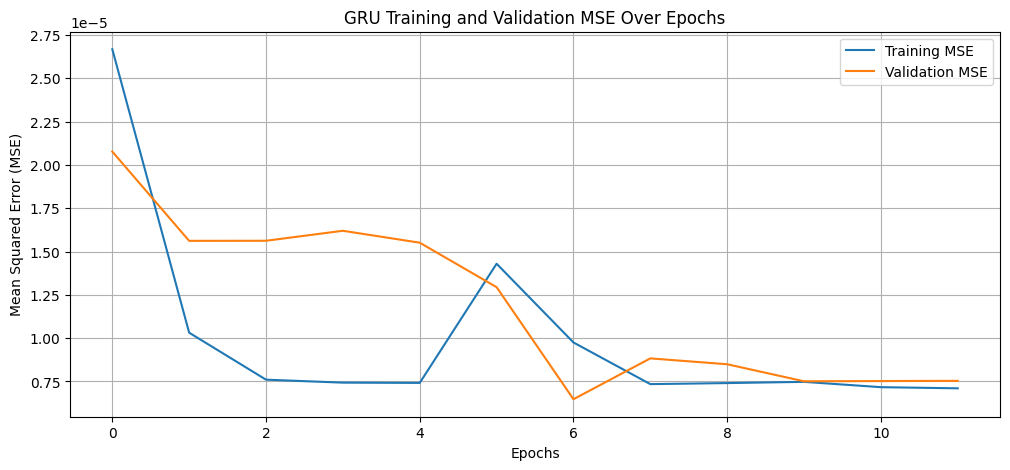

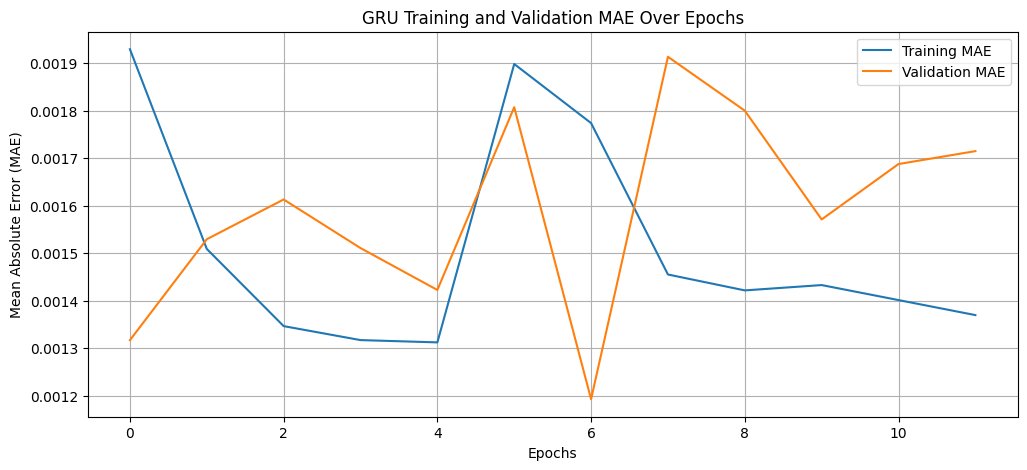

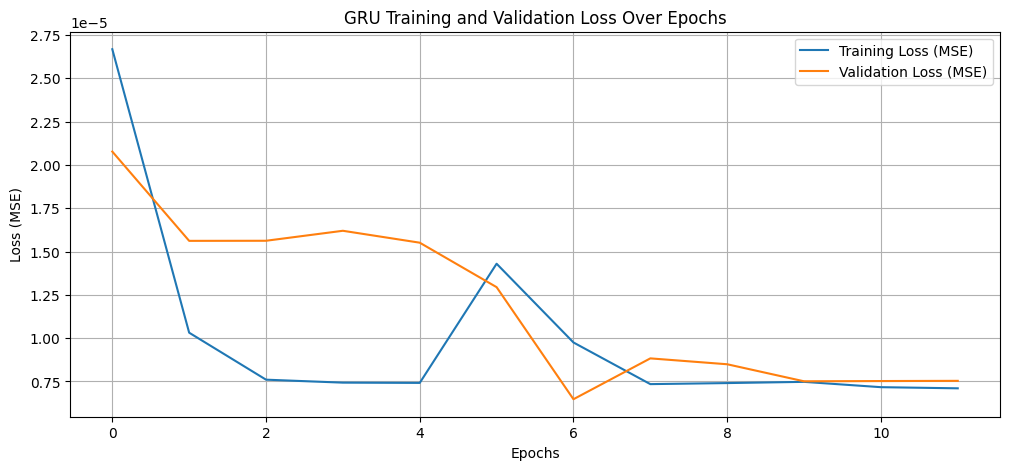

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

import random
import os

#  Set Random Seed for Reproducibility
seed_value = 42  
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"  # Ensures TensorFlow deterministic operations

#**Step : Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step : Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable'  

# Drop missing values
df = df.dropna(subset=features + [target])

# Convert to NumPy arrays
X = df[features].values
y = df[target].values.reshape(-1, 1)  # Reshape for compatibility

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Standardize features
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# Reshape for GRU (samples, time steps, features)
X_train_prep = X_train_prep.reshape((X_train_prep.shape[0], 1, X_train_prep.shape[1]))
X_test_prep = X_test_prep.reshape((X_test_prep.shape[0], 1, X_test_prep.shape[1]))
# Build the GRU model
gru_model = keras.Sequential([
    layers.GRU(64, return_sequences=True, input_shape=(X_train_prep.shape[1], X_train_prep.shape[2])),
    layers.GRU(32, return_sequences=False),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
gru_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0037),
    loss="mse",
    metrics=["mse", "mae"]
)

# Model summary
gru_model.summary()
# Train the GRU model
history_gru = gru_model.fit(
    X_train_prep, y_train,
    epochs=20,  # Adjust epochs based on validation performance
    validation_data=(X_test_prep, y_test),
    batch_size=16,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)
# Evaluate the model on the test set
test_loss, test_mse, test_mae = gru_model.evaluate(X_test_prep, y_test, verbose=1)

# Compute R² Score
y_pred = gru_model.predict(X_test_prep)
test_r2 = r2_score(y_test, y_pred)

# Print results
print(f"GRU Model - Test Loss (MSE): {test_loss:.6f}")
print(f"GRU Model - Test MSE: {test_mse:.6f}")
print(f"GRU Model - Test MAE: {test_mae:.6f}")
print(f"GRU Model - Test R² Score: {test_r2:.6f}")
# Convert history to DataFrame
history_df = pd.DataFrame(history_gru.history)

# Plot MSE
plt.figure(figsize=(12, 5))
plt.plot(history_df['mse'], label='Training MSE')
plt.plot(history_df['val_mse'], label='Validation MSE')
plt.title('GRU Training and Validation MSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot MAE
plt.figure(figsize=(12, 5))
plt.plot(history_df['mae'], label='Training MAE')
plt.plot(history_df['val_mae'], label='Validation MAE')
plt.title('GRU Training and Validation MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(12, 5))
plt.plot(history_df['loss'], label='Training Loss (MSE)')
plt.plot(history_df['val_loss'], label='Validation Loss (MSE)')
plt.title('GRU Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


GRU batch size testing


🔥 Training GRU Model with Batch Size: 6
Epoch 1/20


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3021/3021 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 8.4484e-05 - mae: 0.0036 - mse: 8.4484e-05 - val_loss: 2.1555e-05 - val_mae: 0.0012 - val_mse: 2.1555e-05
Epoch 2/20
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9647e-05 - mae: 0.0021 - mse: 1.9647e-05 - val_loss: 2.0054e-05 - val_mae: 0.0012 - val_mse: 2.0054e-05
Epoch 3/20
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9361e-05 - mae: 0.0020 - mse: 1.9361e-05 - val_loss: 2.0044e-05 - val_mae: 0.0012 - val_mse: 2.0044e-05
Epoch 4/20
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9355e-05 - mae: 0.0020 - mse: 1.9355e-05 - val_loss: 2.0043e-05 - val_mae: 0.0012 - val_mse: 2.0043e-05
Epoch 5/20
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9355e-05 - mae: 0.0020 - mse: 1.9355e-05 - val_loss: 2.0043e-05 - val_mae: 0.0012 - val_mse: 2.0043e-05
Epoch 6/20
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9355e-05 - mae: 0.0020 - mse: 1.9355e-05 - val_loss: 2.0043e-05 - val_mae: 0.0012 - val_mse: 2.0043e-05
Epo

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2266/2266 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 6.9167e-05 - mae: 0.0034 - mse: 6.9167e-05 - val_loss: 1.9668e-05 - val_mae: 0.0016 - val_mse: 1.9668e-05
Epoch 2/20
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6.1055e-05 - mae: 0.0022 - mse: 6.1055e-05 - val_loss: 1.9675e-05 - val_mae: 0.0016 - val_mse: 1.9675e-05
Epoch 3/20
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9912e-05 - mae: 0.0020 - mse: 1.9912e-05 - val_loss: 1.9671e-05 - val_mae: 0.0016 - val_mse: 1.9671e-05
Epoch 4/20
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9193e-05 - mae: 0.0020 - mse: 1.9193e-05 - val_loss: 1.9670e-05 - val_mae: 0.0016 - val_mse: 1.9670e-05
Epoch 5/20
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9197e-05 - mae: 0.0020 - mse: 1.9197e-05 - val_loss: 1.9670e-05 - val_mae: 0.0016 - val_mse: 1.9670e-05
Epoch 6/20
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9197e-05 - mae: 0.0020 - mse: 1.9197e-05 - val_loss: 1.9670e-05 - val_mae: 0.0016 - val_mse: 1.9670e-05
142

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1813/1813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0515e-04 - mae: 0.0041 - mse: 1.0515e-04 - val_loss: 1.6625e-05 - val_mae: 0.0015 - val_mse: 1.6625e-05
Epoch 2/20
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0451e-05 - mae: 0.0015 - mse: 1.0451e-05 - val_loss: 1.4813e-05 - val_mae: 0.0013 - val_mse: 1.4813e-05
Epoch 3/20
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5047e-05 - mae: 0.0017 - mse: 1.5047e-05 - val_loss: 1.7914e-05 - val_mae: 0.0017 - val_mse: 1.7914e-05
Epoch 4/20
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.3898e-05 - mae: 0.0017 - mse: 1.3898e-05 - val_loss: 1.9643e-05 - val_mae: 0.0018 - val_mse: 1.9643e-05
Epoch 5/20
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8793e-05 - mae: 0.0019 - mse: 1.8793e-05 - val_loss: 1.9637e-05 - val_mae: 0.0017 - val_mse: 1.9637e-05
Epoch 6/20
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.8778e-05 - mae: 0.0019 - mse: 1.8778e-05 - val_loss: 1.9637e-05 - val_mae: 0.0017 - val_mse: 1.9637e-05
Epo

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1511/1511 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9053e-04 - mae: 0.0060 - mse: 1.9053e-04 - val_loss: 1.5455e-05 - val_mae: 0.0023 - val_mse: 1.5455e-05
Epoch 2/20
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1678e-04 - mae: 0.0024 - mse: 1.1678e-04 - val_loss: 1.8506e-05 - val_mae: 0.0016 - val_mse: 1.8506e-05
Epoch 3/20
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7742e-05 - mae: 0.0019 - mse: 1.7742e-05 - val_loss: 1.8579e-05 - val_mae: 0.0017 - val_mse: 1.8579e-05
Epoch 4/20
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8250e-05 - mae: 0.0020 - mse: 1.8250e-05 - val_loss: 1.8482e-05 - val_mae: 0.0016 - val_mse: 1.8482e-05
Epoch 5/20
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7445e-05 - mae: 0.0019 - mse: 1.7445e-05 - val_loss: 1.8455e-05 - val_mae: 0.0015 - val_mse: 1.8455e-05
Epoch 6/20
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5865e-05 - mae: 0.0020 - mse: 1.5865e-05 - val_loss: 1.0152e-05 - val_mae: 0.0018 - val_mse: 1.0152e-05
Epo

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1133/1133 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.4141e-05 - mae: 0.0043 - mse: 9.4141e-05 - val_loss: 3.1396e-05 - val_mae: 0.0036 - val_mse: 3.1396e-05
Epoch 2/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6648e-05 - mae: 0.0020 - mse: 1.6648e-05 - val_loss: 2.0145e-05 - val_mae: 0.0018 - val_mse: 2.0145e-05
Epoch 3/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1626e-05 - mae: 0.0017 - mse: 1.1626e-05 - val_loss: 2.2778e-05 - val_mae: 0.0017 - val_mse: 2.2778e-05
Epoch 4/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.4216e-05 - mae: 0.0017 - mse: 1.4216e-05 - val_loss: 1.7698e-05 - val_mae: 0.0017 - val_mse: 1.7698e-05
Epoch 5/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.0924e-06 - mae: 0.0014 - mse: 9.0924e-06 - val_loss: 1.2405e-05 - val_mae: 0.0016 - val_mse: 1.2405e-05
Epoch 6/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.7639e-06 - mae: 0.0014 - mse: 7.7639e-06 - val_loss: 1.7418e-05 - val_mae: 0.0010 - val_mse: 1.7418e-05
Epo

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


907/907 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0841e-04 - mae: 0.0040 - mse: 1.0841e-04 - val_loss: 1.9329e-05 - val_mae: 0.0022 - val_mse: 1.9329e-05
Epoch 2/20
907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6461e-05 - mae: 0.0018 - mse: 1.6461e-05 - val_loss: 2.1537e-05 - val_mae: 0.0024 - val_mse: 2.1537e-05
Epoch 3/20
907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3478e-05 - mae: 0.0020 - mse: 1.3478e-05 - val_loss: 1.6467e-05 - val_mae: 0.0029 - val_mse: 1.6467e-05
Epoch 4/20
907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.0873e-06 - mae: 0.0015 - mse: 9.0873e-06 - val_loss: 1.2576e-05 - val_mae: 0.0015 - val_mse: 1.2576e-05
Epoch 5/20
907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.8978e-06 - mae: 0.0014 - mse: 7.8978e-06 - val_loss: 1.3377e-05 - val_mae: 0.0015 - val_mse: 1.3377e-05
Epoch 6/20
907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.3785e-06 - mae: 0.0014 - mse: 8.3785e-06 - val_loss: 6.9677e-06 - val_mae: 8.7041e-04 - val_mse: 6.9677e-06
Epoch 7/20


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


756/756 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.0955e-04 - mae: 0.0054 - mse: 2.0955e-04 - val_loss: 1.2088e-05 - val_mae: 0.0020 - val_mse: 1.2088e-05
Epoch 2/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.9366e-06 - mae: 0.0014 - mse: 8.9366e-06 - val_loss: 1.6103e-05 - val_mae: 0.0018 - val_mse: 1.6103e-05
Epoch 3/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0672e-05 - mae: 0.0016 - mse: 1.0672e-05 - val_loss: 5.4368e-06 - val_mae: 9.5972e-04 - val_mse: 5.4368e-06
Epoch 4/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.7561e-06 - mae: 0.0012 - mse: 6.7561e-06 - val_loss: 4.9598e-06 - val_mae: 9.1186e-04 - val_mse: 4.9598e-06
Epoch 5/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.6263e-06 - mae: 0.0012 - mse: 6.6263e-06 - val_loss: 5.2075e-06 - val_mae: 0.0010 - val_mse: 5.2075e-06
Epoch 6/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.7323e-06 - mae: 0.0012 - mse: 6.7323e-06 - val_loss: 5.4842e-06 - val_mae: 0.0011 - val_mse: 5.4842e-06
Epoch 7

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


567/567 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.4738e-04 - mae: 0.0074 - mse: 2.4738e-04 - val_loss: 3.8736e-05 - val_mae: 0.0046 - val_mse: 3.8736e-05
Epoch 2/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6845e-05 - mae: 0.0023 - mse: 1.6845e-05 - val_loss: 7.3533e-06 - val_mae: 0.0019 - val_mse: 7.3533e-06
Epoch 3/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0663e-05 - mae: 0.0017 - mse: 2.0663e-05 - val_loss: 5.4247e-06 - val_mae: 0.0011 - val_mse: 5.4247e-06
Epoch 4/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1058e-05 - mae: 0.0015 - mse: 1.1058e-05 - val_loss: 6.6969e-06 - val_mae: 0.0011 - val_mse: 6.6969e-06
Epoch 5/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.5062e-06 - mae: 0.0013 - mse: 7.5062e-06 - val_loss: 6.4571e-06 - val_mae: 0.0016 - val_mse: 6.4571e-06
Epoch 6/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.9503e-06 - mae: 0.0012 - mse: 6.9503e-06 - val_loss: 5.3249e-06 - val_mae: 0.0010 - val_mse: 5.3249e-06
Epoch 7/20
567/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1086e-04 - mae: 0.0052 - mse: 1.1086e-04 - val_loss: 1.1864e-05 - val_mae: 0.0020 - val_mse: 1.1864e-05
Epoch 2/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2955e-05 - mae: 0.0020 - mse: 1.2955e-05 - val_loss: 1.7345e-05 - val_mae: 0.0025 - val_mse: 1.7345e-05
Epoch 3/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3259e-05 - mae: 0.0025 - mse: 2.3259e-05 - val_loss: 8.3050e-06 - val_mae: 0.0016 - val_mse: 8.3050e-06
Epoch 4/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.3844e-06 - mae: 0.0018 - mse: 9.3844e-06 - val_loss: 6.7526e-06 - val_mae: 0.0012 - val_mse: 6.7526e-06
Epoch 5/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.8660e-06 - mae: 0.0017 - mse: 9.8660e-06 - val_loss: 7.6946e-06 - val_mae: 0.0019 - val_mse: 7.6946e-06
Epoch 6/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0552e-06 - mae: 0.0014 - mse: 7.0552e-06 - val_loss: 5.6266e-06 - val_mae: 0.0014 - val_mse: 5.6266e-06
Epoch 7/20
454/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


284/284 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2733e-04 - mae: 0.0054 - mse: 1.2733e-04 - val_loss: 9.8729e-06 - val_mae: 0.0017 - val_mse: 9.8729e-06
Epoch 2/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3876e-05 - mae: 0.0020 - mse: 1.3876e-05 - val_loss: 8.1190e-06 - val_mae: 0.0016 - val_mse: 8.1190e-06
Epoch 3/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1535e-05 - mae: 0.0019 - mse: 1.1535e-05 - val_loss: 9.7016e-06 - val_mae: 0.0021 - val_mse: 9.7016e-06
Epoch 4/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.4718e-06 - mae: 0.0016 - mse: 8.4718e-06 - val_loss: 1.1592e-05 - val_mae: 0.0024 - val_mse: 1.1592e-05
Epoch 5/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.8757e-06 - mae: 0.0015 - mse: 7.8757e-06 - val_loss: 8.9456e-06 - val_mae: 0.0019 - val_mse: 8.9456e-06
Epoch 6/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.3689e-06 - mae: 0.0014 - mse: 7.3689e-06 - val_loss: 7.1463e-06 - val_mae: 0.0019 - val_mse: 7.1463e-06
Epoch 7/20
284/

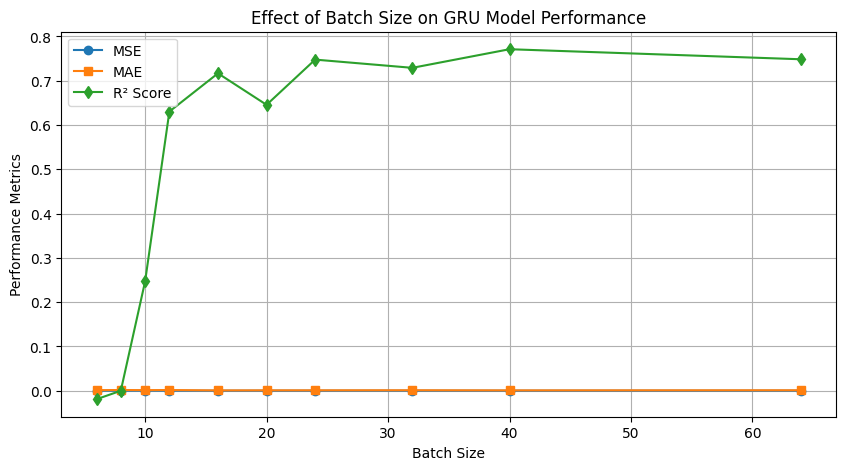

In [18]:
# ✅ Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import random
import os

# ✅ Step 2: Set Random Seed for Reproducibility
seed_value = 42  
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"  # Ensures TensorFlow deterministic operations


#**Step : Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step : Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable'  "

# ✅ Step 5: Drop Missing Values
df = df.dropna(subset=features + [target])

# ✅ Step 6: Convert to NumPy Arrays
X = df[features].values
y = df[target].values.reshape(-1, 1)  # Reshape for compatibility

# ✅ Step 7: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# ✅ Step 8: Standardize Features
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# ✅ Step 9: Reshape for GRU (samples, time steps, features)
X_train_prep = X_train_prep.reshape((X_train_prep.shape[0], 1, X_train_prep.shape[1]))
X_test_prep = X_test_prep.reshape((X_test_prep.shape[0], 1, X_test_prep.shape[1]))

# ✅ Step 10: Define Function to Create GRU Model
def create_gru_model():
    model = keras.Sequential([
        layers.GRU(64, return_sequences=True, input_shape=(X_train_prep.shape[1], X_train_prep.shape[2])),
        layers.GRU(32, return_sequences=False),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)  # Output layer for regression
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0037),
        loss="mse",
        metrics=["mse", "mae"]
    )

    return model

# ✅ Step 11: Test Different Batch Sizes
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []

for batch_size in batch_size_options:
    print(f"\n🔥 Training GRU Model with Batch Size: {batch_size}")

    # Create a fresh model for each batch size
    gru_model = create_gru_model()

    # Early stopping callback
    early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history_gru = gru_model.fit(
        X_train_prep, y_train,
        epochs=20,  # Adjust epochs based on validation performance
        validation_data=(X_test_prep, y_test),
        batch_size=batch_size,
        callbacks=[early_stopping_cb],
        verbose=1
    )

    # ✅ Step 12: Evaluate Model on Test Data
    test_loss, test_mse, test_mae = gru_model.evaluate(X_test_prep, y_test, verbose=1)

    # ✅ Step 13: Compute R² Score
    y_pred = gru_model.predict(X_test_prep)
    test_r2 = r2_score(y_test, y_pred)

    # ✅ Step 14: Store Results
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2
    })

    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ Step 15: Convert Results to DataFrame & Display
results_df = pd.DataFrame(results)
print("\n🔥 **GRU Batch Size Results:**")
print(results_df)

# ✅ Step 16: Plot Results
plt.figure(figsize=(10, 5))
plt.plot(results_df["Batch Size"], results_df["Test MSE"], label="MSE", marker='o')
plt.plot(results_df["Batch Size"], results_df["Test MAE"], label="MAE", marker='s')
plt.plot(results_df["Batch Size"], results_df["Test R² Score"], label="R² Score", marker='d')
plt.xlabel("Batch Size")
plt.ylabel("Performance Metrics")
plt.title("Effect of Batch Size on GRU Model Performance")
plt.legend()
plt.grid(True)
plt.show()


Final GRU 


Training GRU Model with Batch Size: 6


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training GRU Model with Batch Size: 8

Training GRU Model with Batch Size: 10

Training GRU Model with Batch Size: 12

Training GRU Model with Batch Size: 16

Training GRU Model with Batch Size: 20

Training GRU Model with Batch Size: 24

Training GRU Model with Batch Size: 32

Training GRU Model with Batch Size: 40

Training GRU Model with Batch Size: 64

Selected best batch size (by lowest val_loss): 20

**GRU Final Result (with best batch size):**
{'Batch Size': 20, 'Test MSE': 4.933950094709871e-06, 'Test MAE': 0.0007118700887076557, 'Test R² Score': 0.7491042366719194}

GRU Batch Size Sweep (train-only validation):
   Batch Size  Best Val MSE
0           6      0.000009
1           8      0.000016
2          10      0.000008
3          12      0.000006
4          16      0.000007
5          20      0.000004
6          24      0.000006
7          32      0.000005
8          40      0.000005
9          64      0.000006


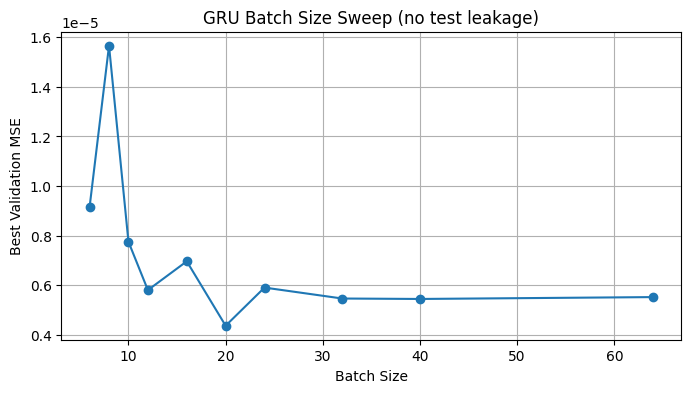

In [5]:
# ✅ Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import random
import os

# ✅ Step 2: Set Random Seed for Reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# **Step 1: Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx'
df = pd.read_excel(file_path)

# **Step 1.1: Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable

# ✅ Step 5: Drop Missing Values
df = df.dropna(subset=features + [target])

# ✅ Step 6: Convert to NumPy Arrays
X = df[features].values
y = df[target].values.reshape(-1, 1)  # column vector

# ✅ Step 7: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# ✅ Step 8: Standardize Features
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep  = scaler.transform(X_test)

# ✅ Step 9: Reshape for GRU (samples, time steps, features)
X_train_gru = X_train_prep.reshape((X_train_prep.shape[0], 1, X_train_prep.shape[1]))
X_test_gru  = X_test_prep.reshape((X_test_prep.shape[0],  1, X_test_prep.shape[1]))

# ✅ Step 10: Define Function to Create GRU Model
def create_gru_model():
    model = keras.Sequential([
        layers.GRU(64, return_sequences=True, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])),
        layers.GRU(32, return_sequences=False),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)  # Output layer for regression
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0037),
        loss="mse",
        metrics=["mse", "mae"]
    )
    return model

# ✅ Step 11: Batch-size sweep (train-only validation; no test leakage)
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []
best_bs, best_val = None, float("inf")

for batch_size in batch_size_options:
    print(f"\nTraining GRU Model with Batch Size: {batch_size}")
    gru_model = create_gru_model()

    early_stopping_cb = keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=5, restore_best_weights=True
    )

    history_gru = gru_model.fit(
        X_train_gru, y_train,
        epochs=20,
        validation_split=0.2,      # ← use train-only validation (no test-as-val)
        batch_size=batch_size,
        callbacks=[early_stopping_cb],
        verbose=0
    )

    this_best_val = min(history_gru.history["val_loss"])
    results.append({"Batch Size": batch_size, "Best Val MSE": this_best_val})
    if this_best_val < best_val:
        best_val, best_bs = this_best_val, batch_size

print("\nSelected best batch size (by lowest val_loss):", best_bs)

# ✅ Step 12: Final training with chosen batch size; single test evaluation
final_gru = create_gru_model()
final_gru.fit(
    X_train_gru, y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=best_bs,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=0
)

test_loss, test_mse, test_mae = final_gru.evaluate(X_test_gru, y_test, verbose=0)

# ✅ Step 13: Compute R² Score (flatten both)
y_pred = final_gru.predict(X_test_gru, verbose=0).ravel()
test_r2 = r2_score(y_test.ravel(), y_pred)

print("\n**GRU Final Result (with best batch size):**")
print({"Batch Size": best_bs, "Test MSE": test_mse, "Test MAE": test_mae, "Test R² Score": test_r2})

# ✅ Step 15: Show sweep table (optional)
results_df = pd.DataFrame(results).sort_values("Batch Size")
print("\nGRU Batch Size Sweep (train-only validation):")
print(results_df)

# ✅ Step 16: Plot (optional)
plt.figure(figsize=(8, 4))
plt.plot(results_df["Batch Size"], results_df["Best Val MSE"], marker='o')
plt.xlabel("Batch Size")
plt.ylabel("Best Validation MSE")
plt.title("GRU Batch Size Sweep (no test leakage)")
plt.grid(True)
plt.show()


In [ ]:
GRU Hyperparameter Optimization

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import keras_tuner as kt
import random
import os

# ✅ **Set Random Seed for Reproducibility**
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"


#**Step : Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step : Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable'  

# ✅ **Drop Missing Values**
df = df.dropna(subset=features + [target])

# ✅ **Convert to NumPy arrays**
X = df[features].values
y = df[target].values.reshape(-1, 1)

# ✅ **Split Dataset**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value, shuffle=True)

# ✅ **Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# ✅ **Reshape for GRU (samples, time steps, features)**
X_train_prep = X_train_prep.reshape((X_train_prep.shape[0], 1, X_train_prep.shape[1]))
X_test_prep = X_test_prep.reshape((X_test_prep.shape[0], 1, X_test_prep.shape[1]))

# ✅ **Hyperparameter Tuning Function**
def build_gru_model(hp):
    model = keras.Sequential()

    # Tune the number of GRU layers (1 to 3)
    for i in range(hp.Int('n_gru_layers', 1, 3)):
        model.add(layers.GRU(
            units=hp.Int(f'gru_units_{i}', min_value=32, max_value=256, step=32),
            return_sequences=True if i < hp.Int('n_gru_layers', 1, 3) - 1 else False,
            dropout=hp.Float(f'dropout_rate_{i}', min_value=0.1, max_value=0.4, step=0.1)
        ))

    # Fully connected layers
    for i in range(hp.Int('n_dense_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'dense_units_{i}', min_value=16, max_value=128, step=16),
            activation='relu'
        ))

    # Output layer for regression
    model.add(layers.Dense(1))

    # Tune learning rate
    learning_rate = hp.Float('learning_rate', min_value=0.0001, max_value=0.01, sampling='log')

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="mse",
        metrics=["mse", "mae"]
    )
    return model

# ✅ **Hyperparameter Search with Bayesian Optimization**
tuner = kt.BayesianOptimization(
    build_gru_model,
    objective='val_mse',
    max_trials=10,
    directory='gru_tuning',
    project_name='Optimized_GRU'
)

# ✅ **Run the Hyperparameter Search**
tuner.search(X_train_prep, y_train, epochs=20, validation_data=(X_test_prep, y_test), verbose=1)

# ✅ **Get Best Hyperparameters**
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best GRU layers: {best_hps.get('n_gru_layers')}")
print(f"Best GRU units per layer: {[best_hps.get(f'gru_units_{i}') for i in range(best_hps.get('n_gru_layers'))]}")
print(f"Best Dropout rates: {[best_hps.get(f'dropout_rate_{i}') for i in range(best_hps.get('n_gru_layers'))]}")
print(f"Best Dense layers: {best_hps.get('n_dense_layers')}")
print(f"Best Dense units per layer: {[best_hps.get(f'dense_units_{i}') for i in range(best_hps.get('n_dense_layers'))]}")
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")

# ✅ **Save the Best Hyperparameters for Reuse**
best_hyperparameters = {
    'n_gru_layers': best_hps.get('n_gru_layers'),
    'gru_units': [best_hps.get(f'gru_units_{i}') for i in range(best_hps.get('n_gru_layers'))],
    'dropout_rates': [best_hps.get(f'dropout_rate_{i}') for i in range(best_hps.get('n_gru_layers'))],
    'n_dense_layers': best_hps.get('n_dense_layers'),
    'dense_units': [best_hps.get(f'dense_units_{i}') for i in range(best_hps.get('n_dense_layers'))],
    'learning_rate': best_hps.get('learning_rate')
}




Reloading Tuner from gru_tuning\Optimized_GRU\tuner0.json
Best GRU layers: 1
Best GRU units per layer: [160]
Best Dropout rates: [0.1]
Best Dense layers: 3
Best Dense units per layer: [64, 16, 48]
Best Learning Rate: 0.00016191837952092902


In [21]:
# ✅ **Set Random Seed for Consistency**
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# ✅ **Train the Final Optimized GRU Model with Different Batch Sizes**
batch_size_options = [6, 8,  10, 12, 16, 20, 24, 32, 40, 64]  # Try different batch sizes
results = []  # List to store results

for batch_size in batch_size_options:
    print(f"\n🔥 Training GRU Model with Batch Size: {batch_size}")

    # **Rebuild GRU Model with Best Hyperparameters**
    final_gru_model = keras.Sequential()

    # Add GRU layers
    for i in range(best_hyperparameters['n_gru_layers']):
        final_gru_model.add(layers.GRU(
            units=best_hyperparameters['gru_units'][i],
            return_sequences=True if i < best_hyperparameters['n_gru_layers'] - 1 else False,
            dropout=best_hyperparameters['dropout_rates'][i]
        ))

    # Add Fully Connected Dense Layers
    for i in range(best_hyperparameters['n_dense_layers']):
        final_gru_model.add(layers.Dense(
            units=best_hyperparameters['dense_units'][i],
            activation='relu'
        ))

    # Output layer
    final_gru_model.add(layers.Dense(1))

    # Compile Model
    final_gru_model.compile(
        optimizer=Adam(learning_rate=best_hyperparameters['learning_rate']),
        loss="mse",
        metrics=["mse", "mae"]
    )

    # **Train Model**
    history_final_gru = final_gru_model.fit(
        X_train_prep, y_train,
        epochs=50,
        validation_data=(X_test_prep, y_test),
        batch_size=batch_size,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        verbose=1
    )

    # ✅ **Evaluate the Model**
    test_loss, test_mse, test_mae = final_gru_model.evaluate(X_test_prep, y_test, verbose=1)

    # ✅ **Compute R² Score**
    y_pred_final = final_gru_model.predict(X_test_prep).flatten()
    test_r2_final = r2_score(y_test, y_pred_final)

    # ✅ **Store Results**
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2_final
    })

    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ **Convert Results to DataFrame & Display**
if results:
    results_df = pd.DataFrame(results)
    print("\n🔥 **GRU Batch Size Results:**")
    print(results_df)
else:
    print("⚠️ No batch size results were recorded. Check if the results list was updated inside the loop.")




🔥 Training GRU Model with Batch Size: 6
Epoch 1/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 2.4626e-04 - mae: 0.0056 - mse: 2.4626e-04 - val_loss: 8.7159e-06 - val_mae: 0.0014 - val_mse: 8.7159e-06
Epoch 2/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0081e-05 - mae: 0.0015 - mse: 1.0081e-05 - val_loss: 6.0403e-06 - val_mae: 0.0011 - val_mse: 6.0403e-06
Epoch 3/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.6021e-06 - mae: 0.0014 - mse: 9.6021e-06 - val_loss: 7.4281e-06 - val_mae: 0.0012 - val_mse: 7.4281e-06
Epoch 4/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.5067e-06 - mae: 0.0013 - mse: 9.5067e-06 - val_loss: 6.0711e-06 - val_mae: 8.4338e-04 - val_mse: 6.0711e-06
Epoch 5/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 9.8309e-06 - mae: 0.0012 - mse: 9.8309e-06 - val_loss: 7.7409e-06 - val_mae: 0.0011 - val_mse: 7.7409e-06
Epoch 6/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.6850e-06 - mae: 0.0011 - mse: 8.6850e-06 - val_loss

RNN

Epoch 1/20


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0011 - mae: 0.0127 - mse: 0.0011 - val_loss: 2.1487e-05 - val_mae: 0.0026 - val_mse: 2.1487e-05
Epoch 2/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.9624e-05 - mae: 0.0026 - mse: 1.9624e-05 - val_loss: 7.8200e-06 - val_mae: 0.0013 - val_mse: 7.8200e-06
Epoch 3/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.9210e-06 - mae: 0.0015 - mse: 7.9210e-06 - val_loss: 6.9958e-06 - val_mae: 0.0016 - val_mse: 6.9958e-06
Epoch 4/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.1659e-06 - mae: 0.0014 - mse: 7.1659e-06 - val_loss: 7.2918e-06 - val_mae: 0.0018 - val_mse: 7.2918e-06
Epoch 5/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.8565e-06 - mae: 0.0014 - mse: 7.8565e-06 - val_loss: 6.4486e-06 - val_mae: 8.4845e-04 - val_mse: 6.4486e-06
Epoch 6/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.1192e-06 - mae: 0.0011 - mse: 6.1192e-06 - val_loss: 6.5426e-06 - val_mae: 8.1631e-04 - val_mse: 6.5426e-06
Epoch 7/20
567/

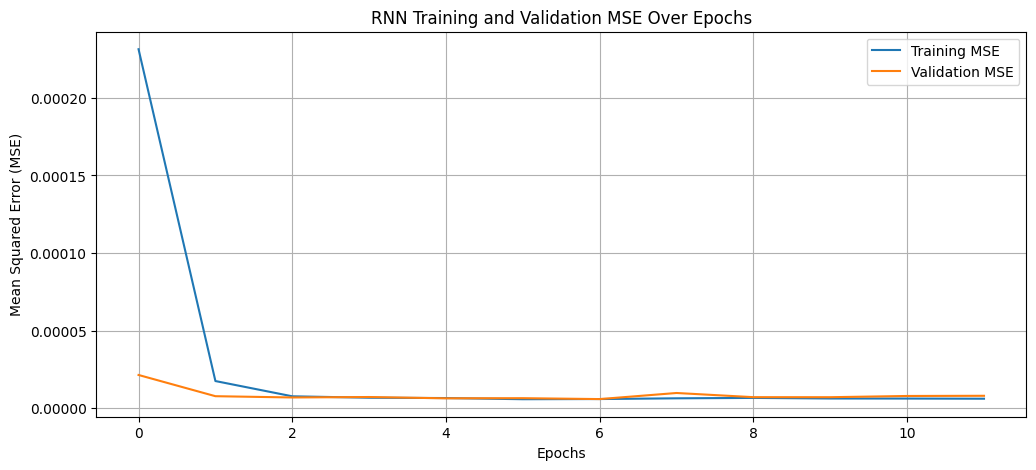

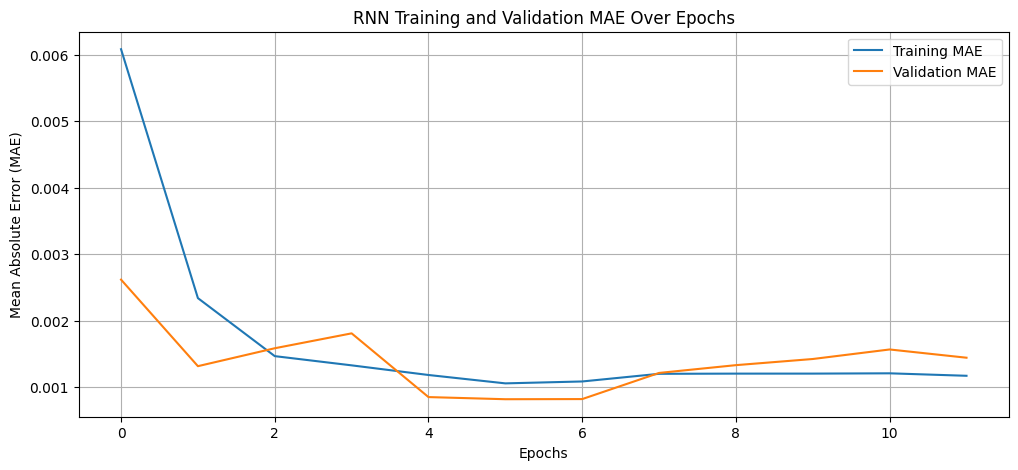

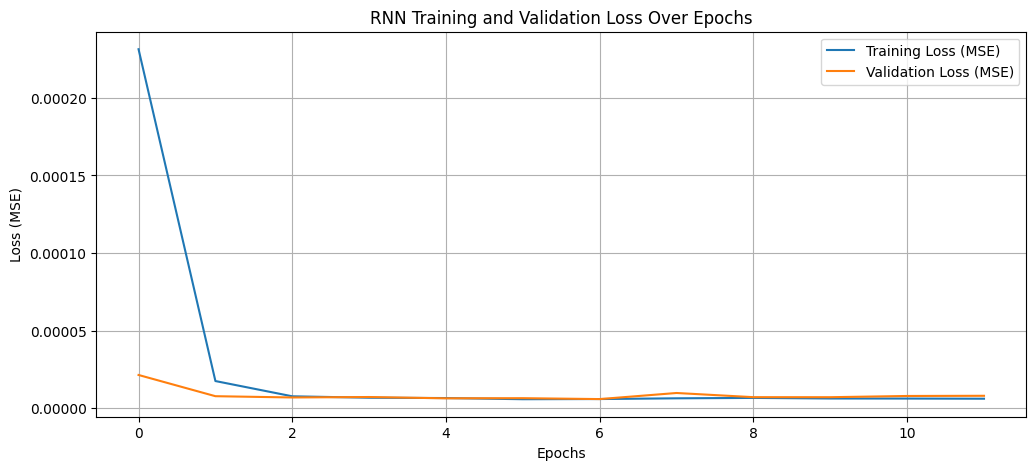

In [24]:
# Import required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import random
import os

#  Set Random Seed for Reproducibility
seed_value = 42  
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"  # Ensures TensorFlow deterministic operations
# -------------------------------
# Step 1: Load Dataset
# -------------------------------

#**Step : Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step : Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable'  

# Drop rows with NaN in target
df = df.dropna(subset=[target])

# Split into X (features) and y (target)
X = df[features].values
y = df[target].values

# -------------------------------
# Step 3: Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# -------------------------------
# Step 4: Standardize Features
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input for RNN (samples, timesteps, features)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# -------------------------------
# Step 5: Define RNN Model
# -------------------------------
model = keras.Sequential([
    layers.SimpleRNN(64, activation="relu", return_sequences=True, input_shape=(1, X_train_scaled.shape[1])),
    layers.SimpleRNN(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)  # Single output neuron for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0037), loss="mse", metrics=["mse", "mae"])

# -------------------------------
# Step 6: Train the RNN Model
# -------------------------------
history = model.fit(
    X_train_reshaped, y_train,
    epochs=20,  # Adjust epochs if needed
    validation_data=(X_test_reshaped, y_test),
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# -------------------------------
# Step 7: Evaluate the Model
# -------------------------------
test_loss, test_mse, test_mae = model.evaluate(X_test_reshaped, y_test, verbose=1)

# -------------------------------
# Step 8: Compute R² Score
# -------------------------------
y_pred = model.predict(X_test_reshaped)
y_pred = y_pred.flatten()  # Ensure correct shape

# Fix NaN values in y_test (if any)
y_test = np.nan_to_num(y_test, nan=np.nanmean(y_test))

test_r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"RNN Model - Test Loss (MSE): {test_loss:.6f}")
print(f"RNN Model - Test MSE: {test_mse:.6f}")
print(f"RNN Model - Test MAE: {test_mae:.6f}")
print(f"RNN Model - Test R² Score: {test_r2:.6f}")

# -------------------------------
# Step 9: Plot Training Performance
# -------------------------------
history_df = pd.DataFrame(history.history)

# Plot MSE
plt.figure(figsize=(12, 5))
plt.plot(history_df['mse'], label='Training MSE')
plt.plot(history_df['val_mse'], label='Validation MSE')
plt.title('RNN Training and Validation MSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot MAE
plt.figure(figsize=(12, 5))
plt.plot(history_df['mae'], label='Training MAE')
plt.plot(history_df['val_mae'], label='Validation MAE')
plt.title('RNN Training and Validation MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(12, 5))
plt.plot(history_df['loss'], label='Training Loss (MSE)')
plt.plot(history_df['val_loss'], label='Validation Loss (MSE)')
plt.title('RNN Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()



RNN batch size testing 


🔥 Training RNN Model with Batch Size: 6
Epoch 1/20


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3021/3021 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 4.0493e-04 - mae: 0.0054 - mse: 4.0493e-04 - val_loss: 1.9802e-05 - val_mae: 0.0016 - val_mse: 1.9802e-05
Epoch 2/20
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.9151e-05 - mae: 0.0020 - mse: 1.9151e-05 - val_loss: 2.0019e-05 - val_mae: 0.0012 - val_mse: 2.0019e-05
Epoch 3/20
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.9342e-05 - mae: 0.0020 - mse: 1.9342e-05 - val_loss: 2.0048e-05 - val_mae: 0.0012 - val_mse: 2.0048e-05
Epoch 4/20
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.9355e-05 - mae: 0.0020 - mse: 1.9355e-05 - val_loss: 2.0050e-05 - val_mae: 0.0012 - val_mse: 2.0050e-05
Epoch 5/20
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.9355e-05 - mae: 0.0020 - mse: 1.9355e-05 - val_loss: 2.0050e-05 - val_mae: 0.0012 - val_mse: 2.0050e-05
Epoch 6/20
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.9355e-05 - mae: 0.0020 - mse: 1.9355e-05 - val_loss: 2.0050e-05 - val_mae: 0.0012 - val_mse: 2.0050e-05
142

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2266/2266 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 2.9540e-04 - mae: 0.0058 - mse: 2.9540e-04 - val_loss: 2.0045e-05 - val_mae: 0.0012 - val_mse: 2.0045e-05
Epoch 2/20
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2.2006e-05 - mae: 0.0018 - mse: 2.2006e-05 - val_loss: 1.9666e-05 - val_mae: 0.0016 - val_mse: 1.9666e-05
Epoch 3/20
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.8991e-05 - mae: 0.0019 - mse: 1.8991e-05 - val_loss: 1.9671e-05 - val_mae: 0.0016 - val_mse: 1.9671e-05
Epoch 4/20
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.9189e-05 - mae: 0.0020 - mse: 1.9189e-05 - val_loss: 1.9670e-05 - val_mae: 0.0016 - val_mse: 1.9670e-05
Epoch 5/20
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.9197e-05 - mae: 0.0020 - mse: 1.9197e-05 - val_loss: 1.9670e-05 - val_mae: 0.0016 - val_mse: 1.9670e-05
Epoch 6/20
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.9197e-05 - mae: 0.0020 - mse: 1.9197e-05 - val_loss: 1.9670e-05 - val_mae: 0.0016 - val_mse: 1.9670e-05
Epo

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1813/1813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 5.4893e-04 - mae: 0.0080 - mse: 5.4893e-04 - val_loss: 8.5439e-06 - val_mae: 0.0013 - val_mse: 8.5439e-06
Epoch 2/20
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 8.8133e-06 - mae: 0.0014 - mse: 8.8133e-06 - val_loss: 5.6396e-06 - val_mae: 0.0011 - val_mse: 5.6396e-06
Epoch 3/20
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 7.1421e-06 - mae: 0.0014 - mse: 7.1421e-06 - val_loss: 1.7377e-05 - val_mae: 0.0017 - val_mse: 1.7377e-05
Epoch 4/20
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.2579e-05 - mae: 0.0018 - mse: 1.2579e-05 - val_loss: 1.8721e-05 - val_mae: 0.0018 - val_mse: 1.8721e-05
Epoch 5/20
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.4753e-05 - mae: 0.0020 - mse: 1.4753e-05 - val_loss: 9.4367e-06 - val_mae: 0.0019 - val_mse: 9.4367e-06
Epoch 6/20
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 9.5442e-06 - mae: 0.0017 - mse: 9.5442e-06 - val_loss: 8.1102e-06 - val_mae: 0.0013 - val_mse: 8.1102e-06
Epo

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1511/1511 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.1242e-04 - mae: 0.0075 - mse: 4.1242e-04 - val_loss: 1.3728e-05 - val_mae: 0.0024 - val_mse: 1.3728e-05
Epoch 2/20
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.2066e-05 - mae: 0.0019 - mse: 1.2066e-05 - val_loss: 7.7396e-06 - val_mae: 0.0012 - val_mse: 7.7396e-06
Epoch 3/20
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.4010e-05 - mae: 0.0016 - mse: 1.4010e-05 - val_loss: 1.9690e-05 - val_mae: 0.0015 - val_mse: 1.9690e-05
Epoch 4/20
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8904e-05 - mae: 0.0019 - mse: 1.8904e-05 - val_loss: 1.9738e-05 - val_mae: 0.0014 - val_mse: 1.9738e-05
Epoch 5/20
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8652e-05 - mae: 0.0019 - mse: 1.8652e-05 - val_loss: 1.9755e-05 - val_mae: 0.0014 - val_mse: 1.9755e-05
Epoch 6/20
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8659e-05 - mae: 0.0019 - mse: 1.8659e-05 - val_loss: 1.9759e-05 - val_mae: 0.0014 - val_mse: 1.9759e-05
Epo

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0011 - mae: 0.0124 - mse: 0.0011 - val_loss: 2.5383e-05 - val_mae: 0.0027 - val_mse: 2.5383e-05
Epoch 2/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.5372e-05 - mae: 0.0026 - mse: 2.5372e-05 - val_loss: 1.8764e-05 - val_mae: 0.0018 - val_mse: 1.8764e-05
Epoch 3/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.0724e-04 - mae: 0.0023 - mse: 2.0724e-04 - val_loss: 1.5008e-05 - val_mae: 0.0014 - val_mse: 1.5008e-05
Epoch 4/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.3371e-05 - mae: 0.0015 - mse: 1.3371e-05 - val_loss: 1.5268e-05 - val_mae: 0.0018 - val_mse: 1.5268e-05
Epoch 5/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.4154e-05 - mae: 0.0017 - mse: 1.4154e-05 - val_loss: 1.3799e-05 - val_mae: 0.0014 - val_mse: 1.3799e-05
Epoch 6/20
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.3584e-05 - mae: 0.0016 - mse: 1.3584e-05 - val_loss: 1.9670e-05 - val_mae: 0.0017 - val_mse: 1.9670e-05
Epoch 7/20


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


907/907 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0018 - mae: 0.0120 - mse: 0.0018 - val_loss: 4.3560e-05 - val_mae: 0.0044 - val_mse: 4.3560e-05
Epoch 2/20
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4119e-05 - mae: 0.0028 - mse: 2.4119e-05 - val_loss: 1.8156e-05 - val_mae: 0.0017 - val_mse: 1.8156e-05
Epoch 3/20
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5983e-05 - mae: 0.0019 - mse: 1.5983e-05 - val_loss: 1.8151e-05 - val_mae: 0.0024 - val_mse: 1.8151e-05
Epoch 4/20
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5209e-05 - mae: 0.0020 - mse: 1.5209e-05 - val_loss: 1.2864e-05 - val_mae: 0.0015 - val_mse: 1.2864e-05
Epoch 5/20
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3428e-05 - mae: 0.0020 - mse: 1.3428e-05 - val_loss: 2.0361e-05 - val_mae: 0.0023 - val_mse: 2.0361e-05
Epoch 6/20
907/907 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6923e-05 - mae: 0.0020 - mse: 1.6923e-05 - val_loss: 1.3740e-05 - val_mae: 0.0018 - val_mse: 1.3740e-05
Epoch 7/20
907/907 ━━━━

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


756/756 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0039 - mae: 0.0193 - mse: 0.0039 - val_loss: 1.8511e-05 - val_mae: 0.0025 - val_mse: 1.8511e-05
Epoch 2/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.2389e-05 - mae: 0.0036 - mse: 5.2389e-05 - val_loss: 2.1473e-05 - val_mae: 0.0030 - val_mse: 2.1473e-05
Epoch 3/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4944e-05 - mae: 0.0029 - mse: 2.4944e-05 - val_loss: 1.8870e-05 - val_mae: 0.0026 - val_mse: 1.8870e-05
Epoch 4/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0672e-04 - mae: 0.0027 - mse: 1.0672e-04 - val_loss: 1.0148e-05 - val_mae: 0.0016 - val_mse: 1.0148e-05
Epoch 5/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.4856e-05 - mae: 0.0021 - mse: 4.4856e-05 - val_loss: 8.8328e-06 - val_mae: 0.0020 - val_mse: 8.8328e-06
Epoch 6/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4405e-05 - mae: 0.0013 - mse: 2.4405e-05 - val_loss: 5.3670e-06 - val_mae: 8.9630e-04 - val_mse: 5.3670e-06
Epoch 7/20
756/756 

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0037 - mae: 0.0274 - mse: 0.0037 - val_loss: 2.0434e-04 - val_mae: 0.0096 - val_mse: 2.0434e-04
Epoch 2/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.1928e-04 - mae: 0.0087 - mse: 4.1928e-04 - val_loss: 3.4814e-05 - val_mae: 0.0041 - val_mse: 3.4814e-05
Epoch 3/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9857e-04 - mae: 0.0052 - mse: 2.9857e-04 - val_loss: 5.0199e-05 - val_mae: 0.0053 - val_mse: 5.0199e-05
Epoch 4/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.7557e-04 - mae: 0.0063 - mse: 2.7557e-04 - val_loss: 3.5467e-05 - val_mae: 0.0039 - val_mse: 3.5467e-05
Epoch 5/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.5607e-05 - mae: 0.0034 - mse: 6.5607e-05 - val_loss: 1.7559e-05 - val_mae: 0.0029 - val_mse: 1.7559e-05
Epoch 6/20
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.1507e-05 - mae: 0.0028 - mse: 3.1507e-05 - val_loss: 9.7321e-06 - val_mae: 0.0017 - val_mse: 9.7321e-06
Epoch 7/20
567/567 ━━━━

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0012 - mae: 0.0150 - mse: 0.0012 - val_loss: 3.3463e-05 - val_mae: 0.0039 - val_mse: 3.3463e-05
Epoch 2/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.2970e-05 - mae: 0.0034 - mse: 9.2970e-05 - val_loss: 8.4278e-05 - val_mae: 0.0068 - val_mse: 8.4278e-05
Epoch 3/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9973e-05 - mae: 0.0033 - mse: 2.9973e-05 - val_loss: 1.0128e-05 - val_mae: 0.0019 - val_mse: 1.0128e-05
Epoch 4/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0260e-05 - mae: 0.0019 - mse: 1.0260e-05 - val_loss: 7.3785e-06 - val_mae: 0.0016 - val_mse: 7.3785e-06
Epoch 5/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.4335e-06 - mae: 0.0017 - mse: 8.4335e-06 - val_loss: 8.6221e-06 - val_mae: 0.0021 - val_mse: 8.6221e-06
Epoch 6/20
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.6317e-06 - mae: 0.0017 - mse: 8.6317e-06 - val_loss: 8.2000e-06 - val_mae: 0.0020 - val_mse: 8.2000e-06
Epoch 7/20
454/454 ━━━━

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


284/284 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0013 - mae: 0.0163 - mse: 0.0013 - val_loss: 9.4618e-05 - val_mae: 0.0065 - val_mse: 9.4618e-05
Epoch 2/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6228e-05 - mae: 0.0052 - mse: 9.6228e-05 - val_loss: 3.6617e-05 - val_mae: 0.0039 - val_mse: 3.6617e-05
Epoch 3/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9196e-05 - mae: 0.0030 - mse: 3.9196e-05 - val_loss: 2.6317e-05 - val_mae: 0.0034 - val_mse: 2.6317e-05
Epoch 4/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3569e-05 - mae: 0.0018 - mse: 1.3569e-05 - val_loss: 8.4548e-06 - val_mae: 0.0013 - val_mse: 8.4548e-06
Epoch 5/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1766e-06 - mae: 0.0013 - mse: 9.1766e-06 - val_loss: 6.8448e-06 - val_mae: 0.0012 - val_mse: 6.8448e-06
Epoch 6/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3400e-06 - mae: 0.0012 - mse: 7.3400e-06 - val_loss: 5.6867e-06 - val_mae: 9.6756e-04 - val_mse: 5.6867e-06
Epoch 7/20
284/284 

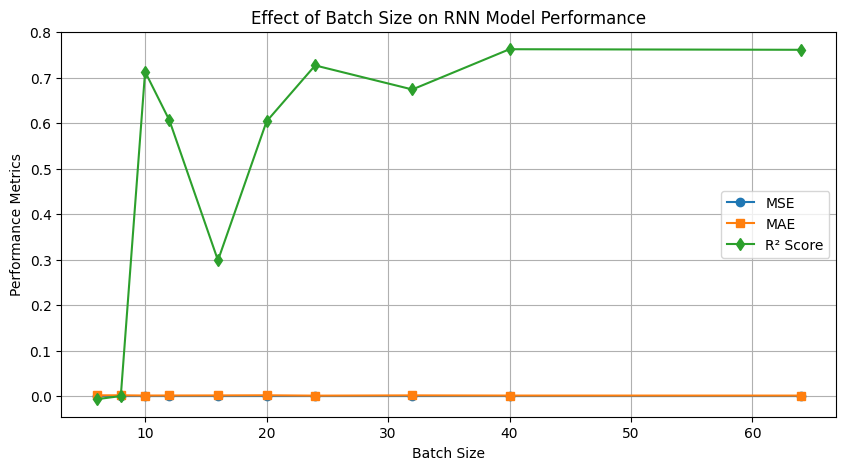

In [25]:
# ✅ Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import random
import os

# ✅ Step 2: Set Random Seed for Reproducibility
seed_value = 42  
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"  # Ensures TensorFlow deterministic operations


#**Step : Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step : Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable'  

# Drop rows with NaN in target
df = df.dropna(subset=[target])

# Convert to NumPy arrays
X = df[features].values
y = df[target].values

# ✅ Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# ✅ Step 6: Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Step 7: Reshape for RNN (samples, timesteps, features)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# ✅ Step 8: Define Function to Create RNN Model
def create_rnn_model():
    model = keras.Sequential([
        layers.SimpleRNN(64, activation="relu", return_sequences=True, input_shape=(1, X_train_scaled.shape[1])),
        layers.SimpleRNN(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)  # Single output neuron for regression
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0037),
        loss="mse",
        metrics=["mse", "mae"]
    )

    return model

# ✅ Step 9: Test Different Batch Sizes
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []

for batch_size in batch_size_options:
    print(f"\n🔥 Training RNN Model with Batch Size: {batch_size}")

    # Create a fresh model for each batch size
    rnn_model = create_rnn_model()

    # Early stopping callback
    early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = rnn_model.fit(
        X_train_reshaped, y_train,
        epochs=20,  # Adjust epochs if needed
        validation_data=(X_test_reshaped, y_test),
        batch_size=batch_size,
        callbacks=[early_stopping_cb],
        verbose=1
    )

    # ✅ Step 10: Evaluate Model on Test Data
    test_loss, test_mse, test_mae = rnn_model.evaluate(X_test_reshaped, y_test, verbose=1)

    # ✅ Step 11: Compute R² Score
    y_pred = rnn_model.predict(X_test_reshaped).flatten()
    
    # Fix NaN values in y_test (if any)
    y_test = np.nan_to_num(y_test, nan=np.nanmean(y_test))

    test_r2 = r2_score(y_test, y_pred)

    # ✅ Step 12: Store Results
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2
    })

    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ Step 13: Convert Results to DataFrame & Display
results_df = pd.DataFrame(results)
print("\n🔥 **RNN Batch Size Results:**")
print(results_df)

# ✅ Step 14: Plot Results
plt.figure(figsize=(10, 5))
plt.plot(results_df["Batch Size"], results_df["Test MSE"], label="MSE", marker='o')
plt.plot(results_df["Batch Size"], results_df["Test MAE"], label="MAE", marker='s')
plt.plot(results_df["Batch Size"], results_df["Test R² Score"], label="R² Score", marker='d')
plt.xlabel("Batch Size")
plt.ylabel("Performance Metrics")
plt.title("Effect of Batch Size on RNN Model Performance")
plt.legend()
plt.grid(True)
plt.show()




Training RNN with batch size 6


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training RNN with batch size 8

Training RNN with batch size 10

Training RNN with batch size 12

Training RNN with batch size 16

Training RNN with batch size 20

Training RNN with batch size 24

Training RNN with batch size 32

Training RNN with batch size 40

Training RNN with batch size 64

Selected best batch size: 24

**RNN Final Result (with best batch size):**
{'Batch Size': 24, 'Test MSE': 5.118131412018556e-06, 'Test MAE': 0.000817909138277173, 'Test R² Score': 0.7397386070890875}

RNN Batch Size Sweep (train-only validation):
   Batch Size  Best Val MSE
0           6      0.000008
1           8      0.000005
2          10      0.000007
3          12      0.000007
4          16      0.000006
5          20      0.000005
6          24      0.000004
7          32      0.000006
8          40      0.000006
9          64      0.000005


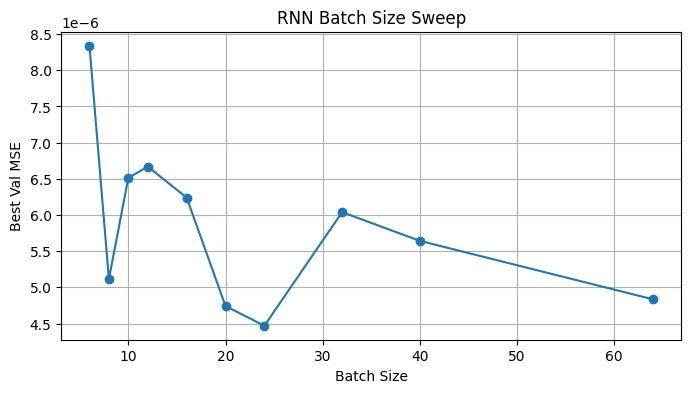

In [ ]:
# ✅ Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import random
import os

# ✅ Step 2: Set Random Seed for Reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# **Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx'
df = pd.read_excel(file_path)

# **Select Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'

# ✅ Drop rows with NaNs in features/target
df = df.dropna(subset=features + [target])

# ✅ Arrays
X = df[features].values
y = df[target].values  # 1D

# ✅ Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# ✅ Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ✅ Reshape for RNN (samples, timesteps, features)
time_steps = 1
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], time_steps, X_train_scaled.shape[1]))
X_test_rnn  = X_test_scaled.reshape((X_test_scaled.shape[0],  time_steps, X_test_scaled.shape[1]))

# ✅ Model factory (unchanged architecture)
def create_rnn_model():
    model = keras.Sequential([
        layers.SimpleRNN(64, activation="relu", return_sequences=True,
                         input_shape=(time_steps, X_train_scaled.shape[1])),
        layers.SimpleRNN(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.0037), loss="mse", metrics=["mse", "mae"])
    return model

# ✅ Batch-size sweep with train-only validation (no leakage)
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []
best_bs, best_val = None, float("inf")

for batch_size in batch_size_options:
    print(f"\nTraining RNN with batch size {batch_size}")
    rnn_model = create_rnn_model()
    history = rnn_model.fit(
        X_train_rnn, y_train,
        epochs=20,
        validation_split=0.2,   # ← no test-as-validation
        batch_size=batch_size,
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        verbose=0
    )
    this_best = min(history.history["val_loss"])
    results.append({"Batch Size": batch_size, "Best Val MSE": this_best})
    if this_best < best_val:
        best_val, best_bs = this_best, batch_size

print("\nSelected best batch size:", best_bs)

# ✅ Final train + single test evaluation
final_rnn = create_rnn_model()
final_rnn.fit(
    X_train_rnn, y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=best_bs,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=0
)

test_loss, test_mse, test_mae = final_rnn.evaluate(X_test_rnn, y_test, verbose=0)
y_pred = final_rnn.predict(X_test_rnn, verbose=0).ravel()
test_r2 = r2_score(y_test, y_pred)

print("\n**RNN Final Result (with best batch size):**")
print({"Batch Size": best_bs, "Test MSE": test_mse, "Test MAE": test_mae, "Test R² Score": test_r2})

# ✅ Show sweep table
results_df = pd.DataFrame(results).sort_values("Batch Size")
print("\nRNN Batch Size Sweep (train-only validation):")
print(results_df)

# (Optional) quick plot
plt.figure(figsize=(8,4))
plt.plot(results_df["Batch Size"], results_df["Best Val MSE"], marker='o')
plt.xlabel("Batch Size"); plt.ylabel("Best Val MSE"); plt.title("RNN Batch Size Sweep")
plt.grid(True); plt.show()


RNN Optimization : Bayesation

In [26]:
# ✅ Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import keras_tuner as kt
import random
import os

# ✅ **Set Random Seed for Reproducibility**
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"


#**Step : Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step : Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable'  

# ✅ **Drop Missing Values**
df = df.dropna(subset=features + [target])

# ✅ **Convert to NumPy arrays**
X = df[features].values
y = df[target].values.reshape(-1, 1)

# ✅ **Split Dataset**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value, shuffle=True)

# ✅ **Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# ✅ **Reshape for RNN (samples, time steps, features)**
X_train_prep = X_train_prep.reshape((X_train_prep.shape[0], 1, X_train_prep.shape[1]))
X_test_prep = X_test_prep.reshape((X_test_prep.shape[0], 1, X_test_prep.shape[1]))

# ✅ **Hyperparameter Tuning Function**
def build_rnn_model(hp):
    model = keras.Sequential()

    # Tune the number of RNN layers (1 to 3)
    for i in range(hp.Int('n_rnn_layers', 1, 3)):
        model.add(layers.SimpleRNN(
            units=hp.Int(f'rnn_units_{i}', min_value=32, max_value=256, step=32),
            return_sequences=True if i < hp.Int('n_rnn_layers', 1, 3) - 1 else False,
            dropout=hp.Float(f'dropout_rate_{i}', min_value=0.1, max_value=0.4, step=0.1)
        ))

    # Fully connected layers
    for i in range(hp.Int('n_dense_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'dense_units_{i}', min_value=16, max_value=128, step=16),
            activation='relu'
        ))

    # Output layer for regression
    model.add(layers.Dense(1))

    # Tune learning rate
    learning_rate = hp.Float('learning_rate', min_value=0.0001, max_value=0.01, sampling='log')

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="mse",
        metrics=["mse", "mae"]
    )
    return model

# ✅ **Hyperparameter Search with Bayesian Optimization**
tuner = kt.BayesianOptimization(
    build_rnn_model,
    objective='val_mse',
    max_trials=10,
    directory='rnn_tuning',
    project_name='Optimized_RNN'
)

# ✅ **Run the Hyperparameter Search**
tuner.search(X_train_prep, y_train, epochs=20, validation_data=(X_test_prep, y_test), verbose=1)

# ✅ **Get Best Hyperparameters**
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best RNN layers: {best_hps.get('n_rnn_layers')}")
print(f"Best RNN units per layer: {[best_hps.get(f'rnn_units_{i}') for i in range(best_hps.get('n_rnn_layers'))]}")
print(f"Best Dropout rates: {[best_hps.get(f'dropout_rate_{i}') for i in range(best_hps.get('n_rnn_layers'))]}")
print(f"Best Dense layers: {best_hps.get('n_dense_layers')}")
print(f"Best Dense units per layer: {[best_hps.get(f'dense_units_{i}') for i in range(best_hps.get('n_dense_layers'))]}")
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")

# ✅ **Save the Best Hyperparameters for Reuse**
best_hyperparameters = {
    'n_rnn_layers': best_hps.get('n_rnn_layers'),
    'rnn_units': [best_hps.get(f'rnn_units_{i}') for i in range(best_hps.get('n_rnn_layers'))],
    'dropout_rates': [best_hps.get(f'dropout_rate_{i}') for i in range(best_hps.get('n_rnn_layers'))],
    'n_dense_layers': best_hps.get('n_dense_layers'),
    'dense_units': [best_hps.get(f'dense_units_{i}') for i in range(best_hps.get('n_dense_layers'))],
    'learning_rate': best_hps.get('learning_rate')
}


Reloading Tuner from rnn_tuning\Optimized_RNN\tuner0.json
Best RNN layers: 1
Best RNN units per layer: [160]
Best Dropout rates: [0.1]
Best Dense layers: 3
Best Dense units per layer: [64, 16, 48]
Best Learning Rate: 0.00016191837952092902


In [27]:
# ✅ **Set Random Seed for Consistency**
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# ✅ **Train the Final Optimized RNN Model with Different Batch Sizes**
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]  # Try different batch sizes
results = []  # List to store results

for batch_size in batch_size_options:
    print(f"\n🔥 Training RNN Model with Batch Size: {batch_size}")

    # **Rebuild RNN Model with Best Hyperparameters**
    final_rnn_model = keras.Sequential()

    # Add RNN layers
    for i in range(best_hyperparameters['n_rnn_layers']):
        final_rnn_model.add(layers.SimpleRNN(
            units=best_hyperparameters['rnn_units'][i],
            return_sequences=True if i < best_hyperparameters['n_rnn_layers'] - 1 else False,
            dropout=best_hyperparameters['dropout_rates'][i]
        ))

    # Add Fully Connected Dense Layers
    for i in range(best_hyperparameters['n_dense_layers']):
        final_rnn_model.add(layers.Dense(
            units=best_hyperparameters['dense_units'][i],
            activation='relu'
        ))

    # Output layer
    final_rnn_model.add(layers.Dense(1))

    # Compile Model
    final_rnn_model.compile(
        optimizer=Adam(learning_rate=best_hyperparameters['learning_rate']),
        loss="mse",
        metrics=["mse", "mae"]
    )

    # **Train Model**
    history_final_rnn = final_rnn_model.fit(
        X_train_prep, y_train,
        epochs=50,
        validation_data=(X_test_prep, y_test),
        batch_size=batch_size,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        verbose=1
    )

    # ✅ **Evaluate the Model**
    test_loss, test_mse, test_mae = final_rnn_model.evaluate(X_test_prep, y_test, verbose=1)

    # ✅ **Compute R² Score**
    y_pred_final = final_rnn_model.predict(X_test_prep).flatten()
    test_r2_final = r2_score(y_test, y_pred_final)

    # ✅ **Store Results**
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2_final
    })

    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ **Convert Results to DataFrame & Display**
if results:
    results_df = pd.DataFrame(results)
    print("\n🔥 **RNN Batch Size Results:**")
    print(results_df)
else:
    print("⚠️ No batch size results were recorded. Check if the results list was updated inside the loop.")



🔥 Training RNN Model with Batch Size: 6
Epoch 1/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0029 - mae: 0.0188 - mse: 0.0029 - val_loss: 1.4153e-05 - val_mae: 0.0022 - val_mse: 1.4153e-05
Epoch 2/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.7054e-05 - mae: 0.0021 - mse: 1.7054e-05 - val_loss: 1.0971e-05 - val_mae: 0.0014 - val_mse: 1.0971e-05
Epoch 3/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.2097e-05 - mae: 0.0017 - mse: 1.2097e-05 - val_loss: 7.5360e-06 - val_mae: 0.0011 - val_mse: 7.5360e-06
Epoch 4/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.5439e-05 - mae: 0.0016 - mse: 1.5439e-05 - val_loss: 7.9410e-06 - val_mae: 0.0011 - val_mse: 7.9410e-06
Epoch 5/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 9.9439e-06 - mae: 0.0014 - mse: 9.9439e-06 - val_loss: 6.2671e-06 - val_mae: 8.7361e-04 - val_mse: 6.2671e-06
Epoch 6/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 8.8901e-06 - mae: 0.0013 - mse: 8.8901e-06 - val_loss: 1.2014

Combining LSTM and CNN

✅ CNN+LSTM Input Shape: (18121, 1, 7)
Epoch 1/50


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


284/284 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.4551e-05 - mae: 0.0017 - mse: 1.4551e-05 - val_loss: 5.2382e-06 - val_mae: 8.9962e-04 - val_mse: 5.2382e-06
Epoch 2/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.4141e-06 - mae: 0.0011 - mse: 7.4141e-06 - val_loss: 4.7889e-06 - val_mae: 9.1557e-04 - val_mse: 4.7889e-06
Epoch 3/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.4463e-06 - mae: 0.0011 - mse: 6.4463e-06 - val_loss: 4.9550e-06 - val_mae: 0.0012 - val_mse: 4.9550e-06
Epoch 4/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.3645e-06 - mae: 0.0011 - mse: 6.3645e-06 - val_loss: 4.9884e-06 - val_mae: 8.3421e-04 - val_mse: 4.9884e-06
Epoch 5/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.0190e-06 - mae: 0.0010 - mse: 6.0190e-06 - val_loss: 4.6738e-06 - val_mae: 0.0012 - val_mse: 4.6738e-06
Epoch 6/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.8383e-06 - mae: 0.0010 - mse: 5.8383e-06 - val_loss: 4.6467e-06 - val_mae: 0.0012 - val_mse: 4.6467e-06
Epo

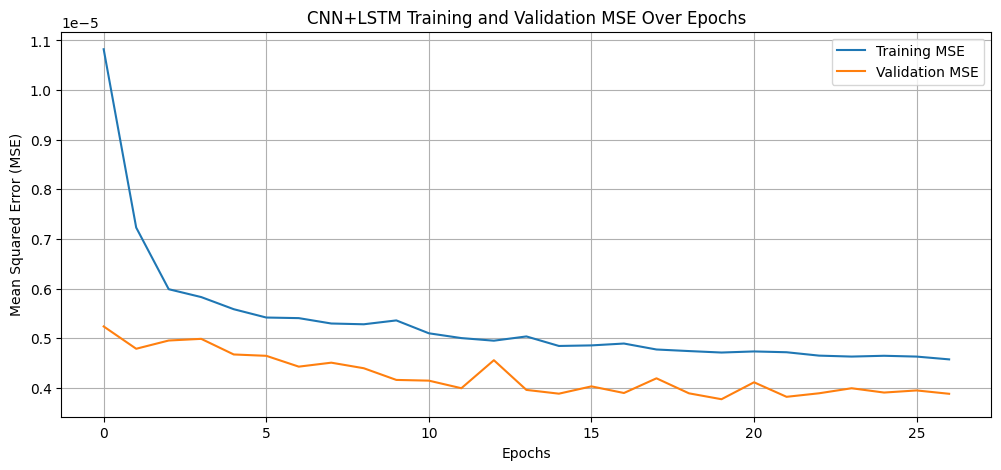

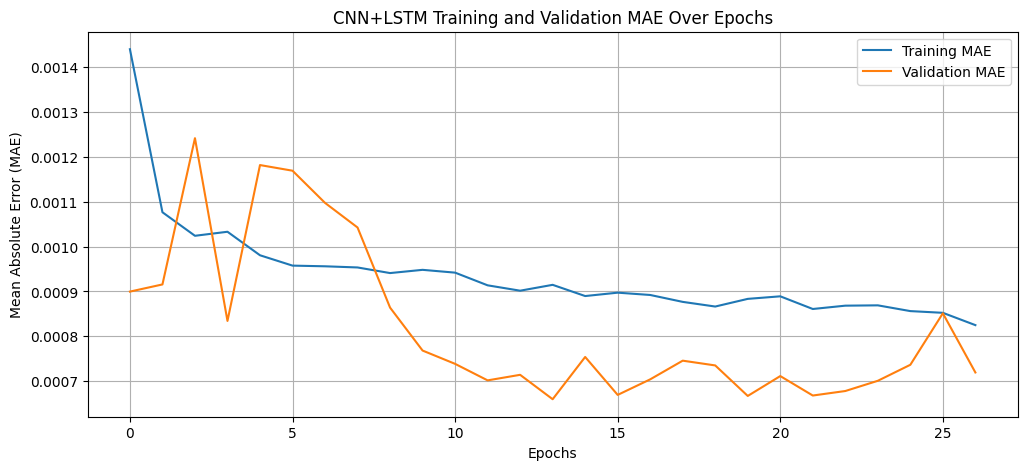

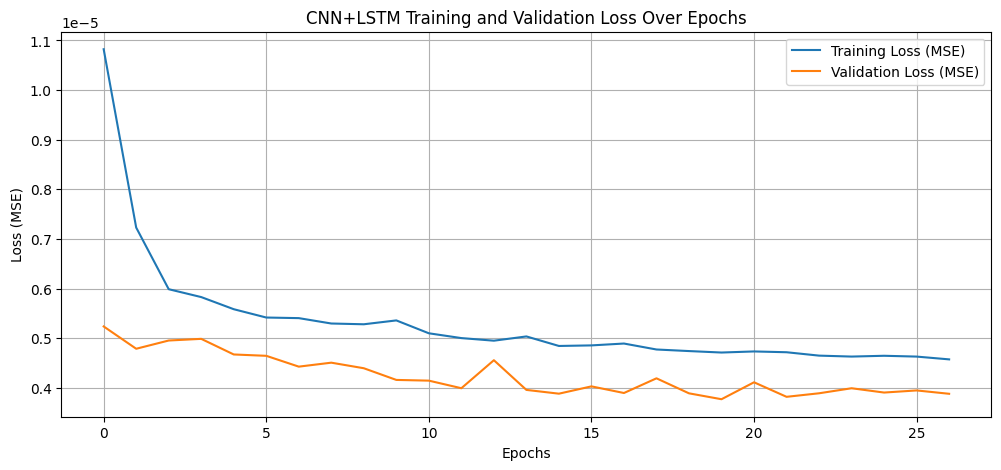

In [29]:
# ✅ Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random
import matplotlib.pyplot as plt

# ✅ Set Random Seed for Reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


#**Step : Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step : Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable'  



# ✅ Handle Missing Values
df.dropna(subset=features + [target], inplace=True)

# ✅ Split Data into Features (X) and Target (y)
X = df[features].values
y = df[target].values

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value, shuffle=True)

# ✅ Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Determine `time_steps` and Ensure Compatibility
time_steps = 2  # Initial assumption
num_features = X_train_scaled.shape[1]

# ✅ Adjust `time_steps` if needed
if num_features % time_steps != 0:
    time_steps = 1  # Fallback if features cannot be evenly divided

num_features_per_step = num_features // time_steps

# ✅ Reshape Data for CNN+LSTM
X_train_cnn_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], time_steps, num_features_per_step))
X_test_cnn_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], time_steps, num_features_per_step))

print("✅ CNN+LSTM Input Shape:", X_train_cnn_lstm.shape)  # Expected: (samples, time_steps, features_per_step)

# ✅ Define CNN+LSTM Model
model = keras.Sequential([
    # CNN Block
    layers.Conv1D(filters=64, kernel_size=1, activation="relu", input_shape=(time_steps, num_features_per_step)),
    layers.Conv1D(filters=32, kernel_size=1, activation="relu"),
    layers.Flatten(),

    # LSTM Block
    layers.Reshape((1, -1)),  # Reshape for LSTM compatibility
    layers.LSTM(64, activation='relu', return_sequences=True),
    layers.LSTM(32, activation='relu', return_sequences=False),
    layers.Dropout(0.2),  # Regularization

    # Fully Connected Layers
    layers.Dense(32, activation="relu"),
    layers.Dense(1)  # Regression output
])

# ✅ Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mse", "mae"]
)

# ✅ Train Model
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = model.fit(
    X_train_cnn_lstm, y_train,
    epochs=50,
    validation_data=(X_test_cnn_lstm, y_test),
    batch_size=64,  # Best batch size found in LSTM tuning
    callbacks=[early_stopping_cb],
    verbose=1
)

# ✅ Evaluate Model
test_loss, test_mse, test_mae = model.evaluate(X_test_cnn_lstm, y_test, verbose=1)

# ✅ Compute R² Score
y_pred = model.predict(X_test_cnn_lstm).flatten()
test_r2 = r2_score(y_test, y_pred)

# ✅ Print Model Performance
print(f"\n🔥 Optimized CNN+LSTM Model Results:")
print(f"📌 Test Loss (MSE): {test_loss:.6f}")
print(f"📌 Test MSE: {test_mse:.6f}")
print(f"📌 Test MAE: {test_mae:.6f}")
print(f"📌 Test R² Score: {test_r2:.6f}")

# ✅ Plot Training Performance
history_df = pd.DataFrame(history.history)

# **Plot MSE**
plt.figure(figsize=(12, 5))
plt.plot(history_df['mse'], label='Training MSE')
plt.plot(history_df['val_mse'], label='Validation MSE')
plt.title('CNN+LSTM Training and Validation MSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# **Plot MAE**
plt.figure(figsize=(12, 5))
plt.plot(history_df['mae'], label='Training MAE')
plt.plot(history_df['val_mae'], label='Validation MAE')
plt.title('CNN+LSTM Training and Validation MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

# **Plot Loss**
plt.figure(figsize=(12, 5))
plt.plot(history_df['loss'], label='Training Loss (MSE)')
plt.plot(history_df['val_loss'], label='Validation Loss (MSE)')
plt.title('CNN+LSTM Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()



CNN *LSTM batch size testing 

✅ CNN+LSTM Input Shape: (18121, 1, 7)

🔥 Training CNN+LSTM Model with Batch Size: 6
Epoch 1/50


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3021/3021 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 1.2590e-05 - mae: 0.0017 - mse: 1.2590e-05 - val_loss: 1.0075e-05 - val_mae: 0.0013 - val_mse: 1.0075e-05
Epoch 2/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 7.6937e-06 - mae: 0.0013 - mse: 7.6937e-06 - val_loss: 1.5141e-05 - val_mae: 0.0012 - val_mse: 1.5141e-05
Epoch 3/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 8.3992e-06 - mae: 0.0013 - mse: 8.3992e-06 - val_loss: 5.0594e-06 - val_mae: 7.8729e-04 - val_mse: 5.0594e-06
Epoch 4/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6.6317e-06 - mae: 0.0012 - mse: 6.6317e-06 - val_loss: 7.7433e-06 - val_mae: 9.9638e-04 - val_mse: 7.7433e-06
Epoch 5/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 6.7434e-06 - mae: 0.0012 - mse: 6.7434e-06 - val_loss: 1.0346e-05 - val_mae: 0.0010 - val_mse: 1.0346e-05
Epoch 6/50
3021/3021 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 6.8503e-06 - mae: 0.0012 - mse: 6.8503e-06 - val_loss: 7.9268e-06 - val_mae: 9.4918e-04 - val_m

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2266/2266 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 1.5373e-05 - mae: 0.0017 - mse: 1.5373e-05 - val_loss: 1.6145e-05 - val_mae: 0.0012 - val_mse: 1.6145e-05
Epoch 2/50
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 8.6029e-06 - mae: 0.0013 - mse: 8.6029e-06 - val_loss: 7.8541e-06 - val_mae: 0.0011 - val_mse: 7.8541e-06
Epoch 3/50
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 7.0682e-06 - mae: 0.0013 - mse: 7.0682e-06 - val_loss: 5.3344e-06 - val_mae: 8.6621e-04 - val_mse: 5.3344e-06
Epoch 4/50
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 6.8126e-06 - mae: 0.0013 - mse: 6.8126e-06 - val_loss: 1.5268e-05 - val_mae: 0.0013 - val_mse: 1.5268e-05
Epoch 5/50
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 7.8518e-06 - mae: 0.0013 - mse: 7.8518e-06 - val_loss: 8.7876e-06 - val_mae: 0.0014 - val_mse: 8.7876e-06
Epoch 6/50
2266/2266 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 6.4876e-06 - mae: 0.0012 - mse: 6.4876e-06 - val_loss: 1.3726e-05 - val_mae: 0.0011 - val_mse: 1.3726e-

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1813/1813 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1.2065e-05 - mae: 0.0015 - mse: 1.2065e-05 - val_loss: 5.3827e-06 - val_mae: 8.9319e-04 - val_mse: 5.3827e-06
Epoch 2/50
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 7.7653e-06 - mae: 0.0012 - mse: 7.7653e-06 - val_loss: 4.7760e-06 - val_mae: 9.7686e-04 - val_mse: 4.7760e-06
Epoch 3/50
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 6.7080e-06 - mae: 0.0012 - mse: 6.7080e-06 - val_loss: 1.0842e-05 - val_mae: 0.0012 - val_mse: 1.0842e-05
Epoch 4/50
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 6.9984e-06 - mae: 0.0012 - mse: 6.9984e-06 - val_loss: 5.4328e-06 - val_mae: 0.0011 - val_mse: 5.4328e-06
Epoch 5/50
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 6.3196e-06 - mae: 0.0012 - mse: 6.3196e-06 - val_loss: 5.1423e-06 - val_mae: 8.2561e-04 - val_mse: 5.1423e-06
Epoch 6/50
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 6.2170e-06 - mae: 0.0011 - mse: 6.2170e-06 - val_loss: 5.2471e-06 - val_mae: 9.8884e-04 - val_ms

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1511/1511 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 1.2370e-05 - mae: 0.0016 - mse: 1.2370e-05 - val_loss: 1.2213e-05 - val_mae: 0.0014 - val_mse: 1.2213e-05
Epoch 2/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7.5621e-06 - mae: 0.0013 - mse: 7.5621e-06 - val_loss: 5.8588e-06 - val_mae: 9.7674e-04 - val_mse: 5.8588e-06
Epoch 3/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.6240e-06 - mae: 0.0012 - mse: 6.6240e-06 - val_loss: 5.2443e-06 - val_mae: 9.0838e-04 - val_mse: 5.2443e-06
Epoch 4/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.6333e-06 - mae: 0.0012 - mse: 6.6333e-06 - val_loss: 6.9204e-06 - val_mae: 0.0011 - val_mse: 6.9204e-06
Epoch 5/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6.4674e-06 - mae: 0.0012 - mse: 6.4674e-06 - val_loss: 5.3656e-06 - val_mae: 9.6512e-04 - val_mse: 5.3656e-06
Epoch 6/50
1511/1511 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.9895e-06 - mae: 0.0011 - mse: 5.9895e-06 - val_loss: 5.4927e-06 - val_mae: 8.7949e-04 - val_mse

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1133/1133 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.3325e-05 - mae: 0.0016 - mse: 1.3325e-05 - val_loss: 8.9953e-06 - val_mae: 0.0012 - val_mse: 8.9953e-06
Epoch 2/50
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7.0649e-06 - mae: 0.0011 - mse: 7.0649e-06 - val_loss: 5.6679e-06 - val_mae: 9.3096e-04 - val_mse: 5.6679e-06
Epoch 3/50
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.6123e-06 - mae: 0.0011 - mse: 6.6123e-06 - val_loss: 6.6992e-06 - val_mae: 9.8496e-04 - val_mse: 6.6992e-06
Epoch 4/50
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.1805e-06 - mae: 0.0011 - mse: 6.1805e-06 - val_loss: 6.6063e-06 - val_mae: 9.5295e-04 - val_mse: 6.6063e-06
Epoch 5/50
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.1362e-06 - mae: 0.0011 - mse: 6.1362e-06 - val_loss: 7.2053e-06 - val_mae: 9.8110e-04 - val_mse: 7.2053e-06
Epoch 6/50
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.0360e-06 - mae: 0.0011 - mse: 6.0360e-06 - val_loss: 7.7400e-06 - val_mae: 0.0011 - val_mse

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


907/907 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.4114e-05 - mae: 0.0017 - mse: 1.4114e-05 - val_loss: 6.3029e-06 - val_mae: 0.0010 - val_mse: 6.3029e-06
Epoch 2/50
907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.4277e-06 - mae: 0.0012 - mse: 7.4277e-06 - val_loss: 5.9688e-06 - val_mae: 8.9671e-04 - val_mse: 5.9688e-06
Epoch 3/50
907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.4723e-06 - mae: 0.0011 - mse: 6.4723e-06 - val_loss: 6.7953e-06 - val_mae: 0.0011 - val_mse: 6.7953e-06
Epoch 4/50
907/907 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.5422e-06 - mae: 0.0011 - mse: 6.5422e-06 - val_loss: 6.6486e-06 - val_mae: 0.0010 - val_mse: 6.6486e-06
Epoch 5/50
907/907 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.1055e-06 - mae: 0.0011 - mse: 6.1055e-06 - val_loss: 5.5050e-06 - val_mae: 9.2039e-04 - val_mse: 5.5050e-06
Epoch 6/50
907/907 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.8862e-06 - mae: 0.0011 - mse: 5.8862e-06 - val_loss: 6.1126e-06 - val_mae: 0.0011 - val_mse: 6.1126e-06
Epoch 7

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


756/756 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.2370e-05 - mae: 0.0016 - mse: 1.2370e-05 - val_loss: 6.0786e-06 - val_mae: 9.2136e-04 - val_mse: 6.0786e-06
Epoch 2/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.1070e-06 - mae: 0.0012 - mse: 7.1070e-06 - val_loss: 6.1173e-06 - val_mae: 8.9392e-04 - val_mse: 6.1173e-06
Epoch 3/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.3055e-06 - mae: 0.0011 - mse: 6.3055e-06 - val_loss: 4.7115e-06 - val_mae: 7.1700e-04 - val_mse: 4.7115e-06
Epoch 4/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.9591e-06 - mae: 0.0010 - mse: 5.9591e-06 - val_loss: 4.6155e-06 - val_mae: 7.3414e-04 - val_mse: 4.6155e-06
Epoch 5/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.8324e-06 - mae: 0.0010 - mse: 5.8324e-06 - val_loss: 5.8845e-06 - val_mae: 7.8607e-04 - val_mse: 5.8845e-06
Epoch 6/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.0682e-06 - mae: 0.0011 - mse: 6.0682e-06 - val_loss: 4.9008e-06 - val_mae: 7.3194e-04 - val_mse: 4.

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


567/567 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.3257e-05 - mae: 0.0015 - mse: 1.3257e-05 - val_loss: 5.3372e-06 - val_mae: 0.0012 - val_mse: 5.3372e-06
Epoch 2/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.8441e-06 - mae: 0.0012 - mse: 6.8441e-06 - val_loss: 6.6755e-06 - val_mae: 7.4908e-04 - val_mse: 6.6755e-06
Epoch 3/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.8179e-06 - mae: 0.0012 - mse: 6.8179e-06 - val_loss: 5.1709e-06 - val_mae: 8.9607e-04 - val_mse: 5.1709e-06
Epoch 4/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.6468e-06 - mae: 0.0012 - mse: 6.6468e-06 - val_loss: 4.2845e-06 - val_mae: 7.1076e-04 - val_mse: 4.2845e-06
Epoch 5/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.0484e-06 - mae: 0.0011 - mse: 6.0484e-06 - val_loss: 4.9537e-06 - val_mae: 9.4656e-04 - val_mse: 4.9537e-06
Epoch 6/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.1251e-06 - mae: 0.0011 - mse: 6.1251e-06 - val_loss: 5.0784e-06 - val_mae: 9.5619e-04 - val_mse: 5.0784

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3208e-05 - mae: 0.0016 - mse: 1.3208e-05 - val_loss: 6.2166e-06 - val_mae: 0.0017 - val_mse: 6.2166e-06
Epoch 2/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.9338e-06 - mae: 0.0011 - mse: 6.9338e-06 - val_loss: 5.4719e-06 - val_mae: 0.0015 - val_mse: 5.4719e-06
Epoch 3/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.4724e-06 - mae: 0.0011 - mse: 6.4724e-06 - val_loss: 6.1823e-06 - val_mae: 0.0018 - val_mse: 6.1823e-06
Epoch 4/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.3208e-06 - mae: 0.0011 - mse: 6.3208e-06 - val_loss: 5.4385e-06 - val_mae: 0.0016 - val_mse: 5.4385e-06
Epoch 5/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.7893e-06 - mae: 0.0010 - mse: 5.7893e-06 - val_loss: 5.3007e-06 - val_mae: 0.0015 - val_mse: 5.3007e-06
Epoch 6/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.7669e-06 - mae: 0.0010 - mse: 5.7669e-06 - val_loss: 5.3807e-06 - val_mae: 0.0015 - val_mse: 5.3807e-06
Epoch 7/50
454/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


284/284 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.4368e-05 - mae: 0.0016 - mse: 1.4368e-05 - val_loss: 4.7079e-06 - val_mae: 7.6825e-04 - val_mse: 4.7079e-06
Epoch 2/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.1001e-06 - mae: 0.0010 - mse: 6.1001e-06 - val_loss: 4.4890e-06 - val_mae: 6.6807e-04 - val_mse: 4.4890e-06
Epoch 3/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.8600e-06 - mae: 9.8687e-04 - mse: 5.8600e-06 - val_loss: 4.4103e-06 - val_mae: 6.9422e-04 - val_mse: 4.4103e-06
Epoch 4/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.8301e-06 - mae: 9.6821e-04 - mse: 5.8301e-06 - val_loss: 4.6138e-06 - val_mae: 8.0128e-04 - val_mse: 4.6138e-06
Epoch 5/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.5744e-06 - mae: 9.5171e-04 - mse: 5.5744e-06 - val_loss: 4.7323e-06 - val_mae: 8.9897e-04 - val_mse: 4.7323e-06
Epoch 6/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.4408e-06 - mae: 9.4315e-04 - mse: 5.4408e-06 - val_loss: 5.0566e-06 - val_mae: 7.7921e-

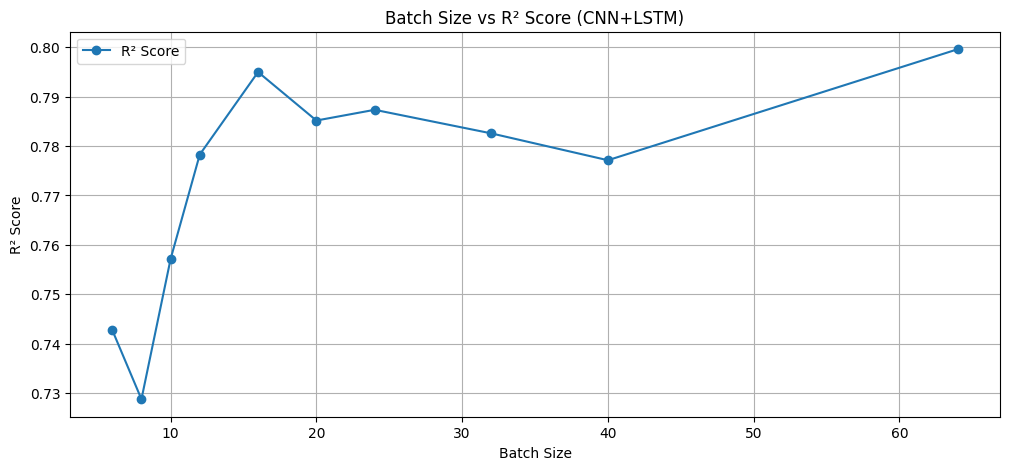

In [30]:
# ✅ Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random
import matplotlib.pyplot as plt

# ✅ Set Random Seed for Reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


#**Step : Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step : Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable'  

# ✅ Handle Missing Values
df.dropna(subset=features + [target], inplace=True)

# ✅ Split Data into Features (X) and Target (y)
X = df[features].values
y = df[target].values

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value, shuffle=True)

# ✅ Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Determine `time_steps` and Ensure Compatibility
time_steps = 2  # Initial assumption
num_features = X_train_scaled.shape[1]

# ✅ Adjust `time_steps` if needed
if num_features % time_steps != 0:
    time_steps = 1  # Fallback if features cannot be evenly divided

num_features_per_step = num_features // time_steps

# ✅ Reshape Data for CNN+LSTM
X_train_cnn_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], time_steps, num_features_per_step))
X_test_cnn_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], time_steps, num_features_per_step))

print("✅ CNN+LSTM Input Shape:", X_train_cnn_lstm.shape)  # Expected: (samples, time_steps, features_per_step)

# ✅ Test Different Batch Sizes
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []

for batch_size in batch_size_options:
    print(f"\n🔥 Training CNN+LSTM Model with Batch Size: {batch_size}")

    # ✅ Define CNN+LSTM Model
    model = keras.Sequential([
        # CNN Block
        layers.Conv1D(filters=64, kernel_size=1, activation="relu", input_shape=(time_steps, num_features_per_step)),
        layers.Conv1D(filters=32, kernel_size=1, activation="relu"),
        layers.Flatten(),

        # LSTM Block
        layers.Reshape((1, -1)),  # Reshape for LSTM compatibility
        layers.LSTM(64, activation='relu', return_sequences=True),
        layers.LSTM(32, activation='relu', return_sequences=False),
        layers.Dropout(0.2),  # Regularization

        # Fully Connected Layers
        layers.Dense(32, activation="relu"),
        layers.Dense(1)  # Regression output
    ])

    # ✅ Compile Model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="mse",
        metrics=["mse", "mae"]
    )

    # ✅ Train Model
    early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

    history = model.fit(
        X_train_cnn_lstm, y_train,
        epochs=50,
        validation_data=(X_test_cnn_lstm, y_test),
        batch_size=batch_size,
        callbacks=[early_stopping_cb],
        verbose=1
    )

    # ✅ Evaluate Model
    test_loss, test_mse, test_mae = model.evaluate(X_test_cnn_lstm, y_test, verbose=1)

    # ✅ Compute R² Score
    y_pred = model.predict(X_test_cnn_lstm).flatten()
    test_r2 = r2_score(y_test, y_pred)

    # ✅ Store Results
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2
    })

    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ Convert Results to DataFrame & Display
if results:
    results_df = pd.DataFrame(results)
    print("\n🔥 **CNN+LSTM Batch Size Results:**")
    print(results_df)
else:
    print("⚠️ No batch size results were recorded. Check if the results list was updated inside the loop.")

# ✅ Plot Batch Size Performance
plt.figure(figsize=(12, 5))
plt.plot(results_df["Batch Size"], results_df["Test R² Score"], marker='o', linestyle='-', label="R² Score")
plt.title("Batch Size vs R² Score (CNN+LSTM)")
plt.xlabel("Batch Size")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()


LSTM+CNN Final one 

✅ CNN+LSTM Input Shape: (18121, 1, 7)

🔥 Sweeping batch size: 6


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🔥 Sweeping batch size: 8

🔥 Sweeping batch size: 10

🔥 Sweeping batch size: 12

🔥 Sweeping batch size: 16

🔥 Sweeping batch size: 20

🔥 Sweeping batch size: 24

🔥 Sweeping batch size: 32

🔥 Sweeping batch size: 40

🔥 Sweeping batch size: 64

✅ Selected best batch size (by lowest val_loss): 8

**CNN+LSTM Final Result (with best batch size):**
{'Batch Size': 8, 'Test MSE': 4.524923951976234e-06, 'Test MAE': 0.0008401307859458029, 'Test R² Score': 0.769903636838616}

🔥 **CNN+LSTM Batch Size Sweep (train-only validation):**
   Batch Size  Best Val MSE
0           6      0.000004
1           8      0.000004
2          10      0.000004
3          12      0.000004
4          16      0.000004
5          20      0.000004
6          24      0.000005
7          32      0.000005
8          40      0.000004
9          64      0.000005


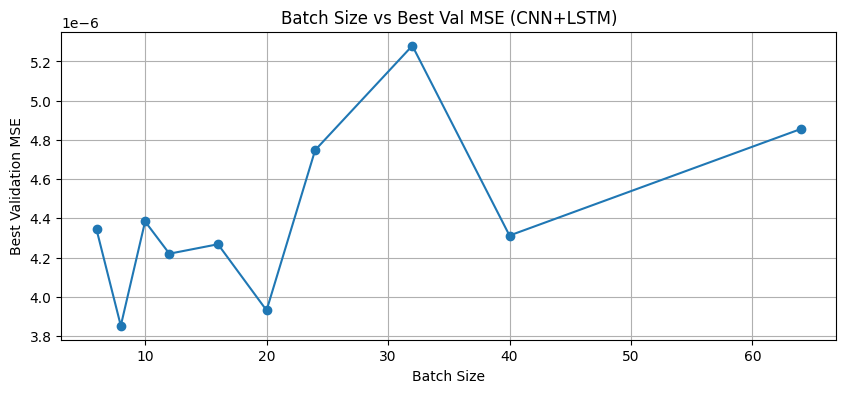

In [1]:
# ✅ Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random
import matplotlib.pyplot as plt

# ✅ Set Random Seed for Reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# ✅ Load Dataset
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx'
df = pd.read_excel(file_path)

# ✅ Select Numeric Features & Target
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'

# ✅ Handle Missing Values
df.dropna(subset=features + [target], inplace=True)

# ✅ Split Data into Features (X) and Target (y)
X = df[features].values
y = df[target].values

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=seed_value, shuffle=True
)

# ✅ Standardize Features (fit on train only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ✅ Determine time_steps and features_per_step
time_steps = 2
num_features = X_train_scaled.shape[1]
if num_features % time_steps != 0:
    time_steps = 1
num_features_per_step = num_features // time_steps

# ✅ Reshape Data for CNN+LSTM
X_train_cnn_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], time_steps, num_features_per_step))
X_test_cnn_lstm  = X_test_scaled.reshape((X_test_scaled.shape[0],  time_steps, num_features_per_step))
print("✅ CNN+LSTM Input Shape:", X_train_cnn_lstm.shape)

# ✅ Model factory (your architecture unchanged; kernel_size=1 is safe for T=1 or 2)
def create_cnn_lstm():
    model = keras.Sequential([
        # CNN Block
        layers.Conv1D(filters=64, kernel_size=1, activation="relu",
                      input_shape=(time_steps, num_features_per_step)),
        layers.Conv1D(filters=32, kernel_size=1, activation="relu"),
        layers.Flatten(),

        # LSTM Block
        layers.Reshape((1, -1)),
        layers.LSTM(64, activation='relu', return_sequences=True),
        layers.LSTM(32, activation='relu', return_sequences=False),
        layers.Dropout(0.2),

        # Fully Connected Layers
        layers.Dense(32, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mse", "mae"])
    return model

# ✅ Batch-size sweep using TRAIN-ONLY validation (no test leakage)
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
sweep = []
best_bs, best_val = None, float("inf")

for bs in batch_size_options:
    print(f"\n🔥 Sweeping batch size: {bs}")
    model = create_cnn_lstm()
    history = model.fit(
        X_train_cnn_lstm, y_train,
        epochs=50,
        validation_split=0.2,   # ← train-only validation
        batch_size=bs,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)],
        verbose=0
    )
    this_best = min(history.history["val_loss"])
    sweep.append({"Batch Size": bs, "Best Val MSE": this_best})
    if this_best < best_val:
        best_val, best_bs = this_best, bs

print("\n✅ Selected best batch size (by lowest val_loss):", best_bs)

# ✅ Final training with chosen batch size; single TEST evaluation
final_model = create_cnn_lstm()
final_model.fit(
    X_train_cnn_lstm, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=best_bs,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)],
    verbose=0
)

test_loss, test_mse, test_mae = final_model.evaluate(X_test_cnn_lstm, y_test, verbose=0)
y_pred = final_model.predict(X_test_cnn_lstm, verbose=0).ravel()
test_r2 = r2_score(y_test, y_pred)

print("\n**CNN+LSTM Final Result (with best batch size):**")
print({"Batch Size": best_bs, "Test MSE": test_mse, "Test MAE": test_mae, "Test R² Score": test_r2})

# ✅ Show sweep table
results_df = pd.DataFrame(sweep).sort_values("Batch Size")
print("\n🔥 **CNN+LSTM Batch Size Sweep (train-only validation):**")
print(results_df)

# ✅ Plot (optional)
plt.figure(figsize=(10, 4))
plt.plot(results_df["Batch Size"], results_df["Best Val MSE"], marker='o')
plt.xlabel("Batch Size"); plt.ylabel("Best Validation MSE")
plt.title("Batch Size vs Best Val MSE (CNN+LSTM)")
plt.grid(True); plt.show()


Cross validation all model 

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow import keras
from keras import layers
from keras.optimizers import Adam, RMSprop

# Load your dataset
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx'
df = pd.read_excel(file_path)

# ✅ Feature and target columns
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed',
            'SNR', 'Vel_Expected_StdDev', 'Bin_Distance']
target = 'BT_Vel'

# ✅ Drop NaNs
df.dropna(subset=features + [target], inplace=True)
X = df[features].values
y = df[target].values

# ✅ Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Bin target for StratifiedKFold
binner = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
y_binned = binner.fit_transform(y.reshape(-1, 1)).ravel()

# ✅ Reshape functions
reshape_cnn = lambda x: x.reshape((x.shape[0], x.shape[1], 1))                # (samples, features, 1)
reshape_rnn = lambda x: x.reshape((x.shape[0], 1, x.shape[1]))                # (samples, 1, features)
reshape_lstm_cnn = lambda x: x.reshape((x.shape[0], x.shape[1], 1))          # same as CNN (7,1)

# ✅ DL model creation functions
def create_ann(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(256, activation="relu"),
        layers.Dense(176, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=RMSprop(learning_rate=0.00226), loss='mse', metrics=['mse'])
    return model

def create_cnn(input_shape):
    model = keras.Sequential([
        layers.Conv1D(64, 3, activation="relu", input_shape=input_shape),
        layers.Conv1D(32, 3, activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mse"])
    return model

def create_lstm(input_shape):
    model = keras.Sequential([
        layers.LSTM(64, activation='relu', return_sequences=True, input_shape=input_shape),
        layers.LSTM(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])
    return model

def create_gru(input_shape):
    model = keras.Sequential([
        layers.GRU(64, return_sequences=True, input_shape=input_shape),
        layers.GRU(32),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.0037), loss='mse', metrics=['mse'])
    return model

def create_rnn(input_shape):
    model = keras.Sequential([
        layers.SimpleRNN(64, activation="relu", return_sequences=True, input_shape=input_shape),
        layers.SimpleRNN(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.0037), loss="mse", metrics=["mse"])
    return model

def create_lstm_cnn(input_shape):
    model = keras.Sequential([
        layers.Conv1D(64, kernel_size=2, activation="relu", input_shape=input_shape),
        layers.Conv1D(32, kernel_size=2, activation="relu"),
        layers.Flatten(),
        layers.Reshape((1, -1)),  # (samples, 1, flattened features)
        layers.LSTM(64, activation='relu', return_sequences=True),
        layers.LSTM(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mse"])
    return model

# ✅ Model config list
model_configs = [
    ("ANN", create_ann, X_scaled.shape[1:], X_scaled),
    ("CNN", create_cnn, (X_scaled.shape[1], 1), reshape_cnn(X_scaled)),
    ("LSTM", create_lstm, (1, X_scaled.shape[1]), reshape_rnn(X_scaled)),
    ("GRU", create_gru, (1, X_scaled.shape[1]), reshape_rnn(X_scaled)),
    ("RNN", create_rnn, (1, X_scaled.shape[1]), reshape_rnn(X_scaled)),
    ("LSTM+CNN", create_lstm_cnn, (X_scaled.shape[1], 1), reshape_lstm_cnn(X_scaled))
]

# ✅ Run Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dl_cv_results = []

for name, model_fn, input_shape, X_model in model_configs:
    print(f"🔁 Cross-validating: {name}")
    r2_scores = []
    mse_scores = []

    for train_idx, val_idx in cv.split(X_scaled, y_binned):
        X_train, X_val = X_model[train_idx], X_model[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = model_fn(input_shape)
        model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=30,
            batch_size=32,
            verbose=0,
            callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
        )

        y_pred = model.predict(X_val).flatten()
        r2_scores.append(r2_score(y_val, y_pred))
        mse_scores.append(mean_squared_error(y_val, y_pred))

    dl_cv_results.append({
        "Model": name,
        "Mean R²": np.mean(r2_scores),
        "Std R²": np.std(r2_scores),
        "Mean MSE": np.mean(mse_scores),
        "Std MSE": np.std(mse_scores)
    })

# ✅ Display results
dl_results_df = pd.DataFrame(dl_cv_results).sort_values(by="Mean R²", ascending=False)
print("\n✅ Cross-Validation Results (DL Models):")
print(dl_results_df.to_string(index=False))




C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


🔁 Cross-validating: ANN
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
🔁 Cross-validating: CNN


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
🔁 Cross-validating: LSTM


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
🔁 Cross-validating: GRU


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
🔁 Cross-validating: RNN


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
🔁 Cross-validating: LSTM+CNN


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

✅ Cross-Validation Results (DL Models):
   Model  Mean R²   Std R²  Mean MSE      Std MSE
LSTM+CNN 0.728422 0.027320  0.000005 4.006796e-07
    LSTM 0.720854 0.023318  0.000005 2.526960e-07
     CNN 0.677136 0.054369  0.000006 4.805802e-07
     GRU 0.640993 0.060869  0.000006 9.251481e-07
     ANN 0.634753 0.065259  0.000006 1.464067e-06
     RNN 0.597273 0.236750  0.000007 3.545601e-06


Final Updated one (CV)

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, RMSprop  # RMSprop kept in case you need it later

# Load your dataset
file_path = r'C:\Users\thtuh\Documents\Processed_Flow_Rate_NEW_BIG_Data_with_ABS.xlsx'
df = pd.read_excel(file_path)

# ✅ Feature and target columns
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed',
            'SNR', 'Vel_Expected_StdDev', 'Bin_Distance']
target = 'BT_Vel'

# ✅ Drop NaNs
df.dropna(subset=features + [target], inplace=True)
X = df[features].values
y = df[target].values

# ✅ Bin target for StratifiedKFold (for regression stratification)
binner = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
y_binned = binner.fit_transform(y.reshape(-1, 1)).ravel()

F = X.shape[1]  # number of features

# ===================== Model factories (match Split/base) =====================

def create_ann(input_shape):
    # Match Split/base ANN: 64 -> 32 -> 16 -> 1, Adam(0.001), no Normalization layer
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])
    return model

def create_cnn(input_shape):
    # Matches your Split CNN (k=3)
    model = keras.Sequential([
        layers.Conv1D(64, 3, activation="relu", input_shape=input_shape),
        layers.Conv1D(32, 3, activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mse"])
    return model

def create_lstm(input_shape):
    # Matches Split LSTM (64, 32, Dropout 0.2, Dense 32)
    model = keras.Sequential([
        layers.LSTM(64, activation='relu', return_sequences=True, input_shape=input_shape),
        layers.LSTM(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])
    return model

def create_gru(input_shape):
    model = keras.Sequential([
        layers.GRU(64, return_sequences=True, input_shape=input_shape),
        layers.GRU(32),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.0037), loss='mse', metrics=['mse'])
    return model

def create_rnn(input_shape):
    model = keras.Sequential([
        layers.SimpleRNN(64, activation="relu", return_sequences=True, input_shape=input_shape),
        layers.SimpleRNN(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.0037), loss="mse", metrics=["mse"])
    return model

def create_cnn_lstm(input_shape_cnn):
    # Match Split hybrid protocol:
    # - time_steps decided outside (T=2 if divisible else 1)
    # - Conv1D kernel_size=1 so it works for T=1 or 2
    model = keras.Sequential([
        layers.Conv1D(64, kernel_size=1, activation="relu", input_shape=input_shape_cnn),
        layers.Conv1D(32, kernel_size=1, activation="relu"),
        layers.Flatten(),
        layers.Reshape((1, -1)),
        layers.LSTM(64, activation='relu', return_sequences=True),
        layers.LSTM(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mse"])
    return model

# We’ll store the "kind" so we can reshape properly per model
model_configs = [
    ("ANN",       "ann"),
    ("CNN",       "cnn"),
    ("LSTM",      "rnn"),
    ("GRU",       "rnn"),
    ("RNN",       "rnn"),
    ("LSTM+CNN",  "hybrid")
]

# ===================== CV loop (in-fold scaling + reshaping) =====================

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #5 fold validation
dl_cv_results = []

for name, kind in model_configs:
    print(f"🔁 Cross-validating: {name}")
    r2_scores, mse_scores = [], []

    for train_idx, val_idx in cv.split(X, y_binned):
        # In-fold scaling (no leakage)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X[train_idx])
        X_val   = scaler.transform(X[val_idx])
        y_train, y_val = y[train_idx], y[val_idx]

        # Reshape & build model to match Split/base
        if kind == "ann":
            input_shape = (F,)
            X_train_model, X_val_model = X_train, X_val
            model = create_ann(input_shape)

        elif kind == "cnn":
            input_shape = (F, 1)
            X_train_model = X_train.reshape((X_train.shape[0], F, 1))
            X_val_model   = X_val.reshape((X_val.shape[0],   F, 1))
            model = create_cnn(input_shape)

        elif kind == "rnn":
            input_shape = (1, F)
            X_train_model = X_train.reshape((X_train.shape[0], 1, F))
            X_val_model   = X_val.reshape((X_val.shape[0],   1, F))
            if name == "LSTM":
                model = create_lstm(input_shape)
            elif name == "GRU":
                model = create_gru(input_shape)
            else:  # RNN
                model = create_rnn(input_shape)

        elif kind == "hybrid":  # LSTM+CNN with Split logic for time steps
            time_steps = 2 if (F % 2 == 0) else 1
            features_per_step = F // time_steps
            input_shape = (time_steps, features_per_step)
            X_train_model = X_train.reshape((X_train.shape[0], time_steps, features_per_step))
            X_val_model   = X_val.reshape((X_val.shape[0],   time_steps, features_per_step))
            model = create_cnn_lstm(input_shape)

        else:
            raise ValueError(f"Unknown kind {kind}")

        # Train
        es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        model.fit(
            X_train_model, y_train,
            validation_data=(X_val_model, y_val),
            epochs=30,
            batch_size=32,
            verbose=0,
            callbacks=[es]
        )

        # Evaluate
        y_pred = model.predict(X_val_model, verbose=0).ravel()
        r2_scores.append(r2_score(y_val, y_pred))
        mse_scores.append(mean_squared_error(y_val, y_pred))

    dl_cv_results.append({
        "Model": name,
        "Mean R²": np.mean(r2_scores),
        "Std R²":  np.std(r2_scores),
        "Mean MSE": np.mean(mse_scores),
        "Std MSE":  np.std(mse_scores)
    })

# ✅ Display results
dl_results_df = pd.DataFrame(dl_cv_results).sort_values(by="Mean R²", ascending=False)
print("\n✅ Cross-Validation Results (DL Models; leak-free; Split/base parity):")
print(dl_results_df.to_string(index=False))



C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


🔁 Cross-validating: ANN
🔁 Cross-validating: CNN


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packag

🔁 Cross-validating: LSTM


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argu

🔁 Cross-validating: GRU


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argu

🔁 Cross-validating: RNN


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argu

🔁 Cross-validating: LSTM+CNN


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packag


✅ Cross-Validation Results (DL Models; leak-free; Split/base parity):
   Model  Mean R²   Std R²  Mean MSE      Std MSE
LSTM+CNN 0.730356 0.037977  0.000005 3.902930e-07
     ANN 0.720250 0.023055  0.000005 2.674388e-07
    LSTM 0.718022 0.049116  0.000005 3.966161e-07
     CNN 0.689553 0.063012  0.000005 7.221231e-07
     RNN 0.675235 0.027904  0.000006 4.571477e-07
     GRU 0.656393 0.105850  0.000006 1.687407e-06
